In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import scipy.stats as stats


from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, RobustScaler

from sklearn.model_selection import train_test_split


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV, KFold



#**Loan Prediction: Classification Problem**
##**Life Cycle of Machine Learning Project**


*   Understanding the
*   List item


In [ ]:
import sys
print(sys.version)


3.10.12 (main, Sep 11 2024, 15:47:36) [GCC 11.4.0]


In [ ]:
from google.colab  import drive
drive.mount("/content/drive")


Mounted at /content/drive


In [ ]:
# read csv file at drive
import pandas as pd

data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/loan_prediction.csv")
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,State,Zip
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,IN,47711
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,IN,46526
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,IN,47401
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,OK,74012
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,FL,32801


## **Understanding Raw Data**
**STEP1: EDA:**

*    Numerical Features

*   categorical features and how many in each
*   Visualise Missing Values

*   Outliers












In [ ]:
data.shape

(614, 15)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
 13  State              614 non-null    object 
 14  Zip                614 non-null    int64  
dtypes: float64(4), int64(2), object(9)
memory usage: 72.1+ KB


In [ ]:
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'State', 'Zip'],
      dtype='object')

####**Categorical and numerical features**

In [ ]:
categorical_columns = data.select_dtypes(include=['object']).columns
list(categorical_columns)

['Loan_ID',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status',
 'State']

In [ ]:
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns
list(numerical_columns)

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History',
 'Zip']

**Check discreet and continous numerical data columns**

* Number of discreate numerical data and continous with thresold = 16.**




*  If numerical columns has unique data < 16, then its discrete numerical data








In [ ]:
discrete_numerical_data = [i for i in numerical_columns if len(data[i].unique())<16]
discrete_numerical_data

['Loan_Amount_Term', 'Credit_History']

In [ ]:
continuous_numerical_data = [i for i in numerical_columns if len(data[i].unique())>=16]
continuous_numerical_data

['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Zip']

###**Key Observations**




*   **Summary of DataFrame Structure**
DataFrame Class:The object is a Pandas DataFrame, indicating that you are working with structured tabular data.
Entries:The DataFrame contains 614 entries (rows), indexed from 0 to 613.
Columns:There are 15 columns in the DataFrame, each representing a different feature or attribute of the data.


*  **Missing Values:**
Several columns have missing values:
Gender: 13 missing values
Married: 3 missing values
Dependents: 15 missing values
Self_Employed: 32 missing values
LoanAmount: 22 missing values
Loan_Amount_Term: 14 missing values
Credit_History: 50 missing values
Summary of Data Types

*   **Summary of Data Types**
*   Integer (int64):ApplicantIncome, Zip
Floating-Point (float64): CoapplicantIncome, LoanAmount, Loan_Amount_Term, Credit_History


*   Categorical (object): Gender, Married, Dependents, Education, Self_Employed, Property_Area, Loan_Status, State, Loan_ID (may need encoding for ML models)













#### **Visualizing Numerical and Categorical Data**

#### **Feature Engineering**

##### **Step1:** **Missing Value**

###### a) **checking and removing null**

In [ ]:
data.isnull().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


### **check missing rows**

In [ ]:
row_with_missing = np.where(data.isnull().any(axis=1))[0]
row_with_missing

## distribution of indices suggest that rows with missing are present all over .

array([  0,  11,  16,  19,  23,  24,  29,  30,  35,  36,  42,  44,  45,
        63,  73,  79,  81,  83,  86,  95, 102, 103, 104, 107, 111, 112,
       113, 114, 117, 120, 125, 126, 127, 129, 130, 156, 158, 165, 170,
       171, 181, 187, 188, 197, 198, 202, 218, 219, 223, 226, 228, 231,
       232, 236, 237, 259, 260, 268, 279, 284, 293, 295, 301, 305, 309,
       313, 314, 317, 318, 322, 323, 332, 333, 334, 335, 336, 338, 344,
       346, 348, 355, 363, 367, 374, 377, 380, 385, 387, 392, 395, 411,
       421, 423, 432, 435, 437, 444, 447, 449, 451, 460, 463, 467, 468,
       473, 477, 479, 490, 491, 497, 503, 506, 507, 517, 524, 530, 533,
       535, 542, 544, 550, 551, 556, 565, 571, 576, 579, 583, 588, 592,
       597, 600, 601, 605])

In [ ]:
row_with_missing = np.where(data.isnull().any(axis=1))[0]
row_with_missing


array([  0,  35,  63,  81,  95, 102, 103, 113, 127, 202, 284, 305, 322,
       338, 387, 435, 437, 479, 524, 550, 551, 605])

####**Removing Missing values**

In [ ]:
# replace missing values with the mode
data['Gender'].fillna(data['Gender'].mode()[0], inplace=True)
data['Married'].fillna(data['Married'].mode()[0], inplace=True)
data['Dependents'].fillna(data['Dependents'].mode()[0], inplace=True)
data['Self_Employed'].fillna(data['Self_Employed'].mode()[0], inplace=True)
data['Credit_History'].fillna(data['Credit_History'].mode()[0], inplace=True)

<ipython-input-9-ccc3fef2b97a>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Gender'].fillna(data['Gender'].mode()[0], inplace=True)
<ipython-input-9-ccc3fef2b97a>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)

In [ ]:
# replace missing value with the mode
data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mode()[0], inplace=True)

<ipython-input-10-d4a7381ea9f9>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mode()[0], inplace=True)


In [ ]:
# replace missing values with the median value due to outliers
data['LoanAmount'].fillna(data['LoanAmount'].mean(), inplace=True)
# check whether all the missing values are filled in the Train dataset

<ipython-input-11-6d639f265c86>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['LoanAmount'].fillna(data['LoanAmount'].mean(), inplace=True)


In [ ]:
# Drop rows with any missing values
#data.dropna(subset=['Gender', "Credit_History", "Loan_Amount_Term", "LoanAmount", "Self_Employed", "Dependents"], inplace=True)



### **Checking NULL Values again**

In [ ]:
# check whether all the missing values are filled in the Train dataset
data.isnull().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


###### **Descriptive Statistics**

In [ ]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Zip
count,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000
mean,5364.231250,1581.093583,144.735417,342.050000,0.854167,35240.995833
std,5668.251251,2617.692267,80.508164,65.212401,0.353307,34560.802007
min,150.000000,0.000000,9.000000,36.000000,0.000000,0.000000
25%,2898.750000,0.000000,100.000000,360.000000,1.000000,4279.000000
50%,3859.000000,1084.500000,128.000000,360.000000,1.000000,18061.000000
75%,5852.500000,2253.250000,170.000000,360.000000,1.000000,66270.000000
max,81000.000000,33837.000000,600.000000,480.000000,1.000000,99654.000000


#### **Conclusion**:



*  ** Applicant income**: In case of this, we see mean > median(5403> 3812) so right skewed saying that there could be some high values outliers on right side. Also, This high standard deviation indicates that applicant incomes vary widely from the mean.

* In Applicant income column, Large standard deviation suggests the presence of outliers or a diverse range of income levels. Outliers: The maximum value (81000) and the high standard deviation indicate that there may be several outliers influencing the average income.

*  Similar is for Co-Apllicant income and loan amount.
*  In Loan amount sd is high as compared to mean value, meaning wide range of variability.


*   Not considering Credit History as numerical  as although its value int type but its value is either 0 and 1. So will consider value count to know classes.


*   The whole statistics shows that distribution is skewed and there is presence of outlier.





##### **Conclusion on Distribution**:


* Distribution is skewed and box plot ansd scatter shows outlier which could effect the accuracy and also cause overfitting.
*   Before thinking of removing outliers since count of outliers in few columns are high, Lets see the correlation with target variable and whether imputation can work to impute outliers with mean.





###**Train test split**

In [ ]:
dat = data.copy()
### independent and dependent
features_new = dat.drop(["Loan_Status"], axis = 1)

target_new = dat[["Loan_Status"]]



# target = dat[["Loan_Status"]]
# target_change = target.values.flatten()
# target_change

X_train, X_test, y_train, y_test = train_test_split(features_new, target_new, train_size=0.7, random_state= 0)

In [ ]:
y_train.head()

,Loan_Status
351,N
593,Y
320,Y
186,N
557,Y


In [ ]:
X_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,State,Zip
351,LP002140,Male,No,0,Graduate,No,8750,4167.0,308.0,360.0,1.0,Rural,RI,2806
593,LP002936,Male,Yes,0,Graduate,No,3859,3300.0,142.0,180.0,1.0,Rural,WI,54140
320,LP002051,Male,Yes,0,Graduate,No,2400,2167.0,115.0,360.0,1.0,Semiurban,VT,5361
186,LP001641,Male,Yes,1,Graduate,Yes,2178,0.0,66.0,300.0,0.0,Rural,MA,1950
557,LP002795,Male,Yes,3+,Graduate,Yes,10139,0.0,260.0,360.0,1.0,Semiurban,NY,12966


In [ ]:
X_test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,State,Zip
454,LP002453,Male,No,0,Graduate,Yes,7085,0.0,84.0,360.0,1.0,Semiurban,NY,12203
52,LP001164,Female,No,0,Graduate,No,4230,0.0,112.0,360.0,1.0,Semiurban,OH,44303
536,LP002734,Male,Yes,0,Graduate,No,6133,3906.0,324.0,360.0,1.0,Urban,KY,40291
469,LP002505,Male,Yes,0,Graduate,No,4333,2451.0,110.0,360.0,1.0,Urban,ME,4102
55,LP001194,Male,Yes,2,Graduate,No,2708,1167.0,97.0,360.0,1.0,Semiurban,CA,94546


In [ ]:
X_train

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,State,Zip
351,LP002140,Male,No,0,Graduate,No,8750,4167.0,308.0,360.0,1.0,Rural,RI,2806
593,LP002936,Male,Yes,0,Graduate,No,3859,3300.0,142.0,180.0,1.0,Rural,WI,54140
320,LP002051,Male,Yes,0,Graduate,No,2400,2167.0,115.0,360.0,1.0,Semiurban,VT,5361
186,LP001641,Male,Yes,1,Graduate,Yes,2178,0.0,66.0,300.0,0.0,Rural,MA,1950
557,LP002795,Male,Yes,3+,Graduate,Yes,10139,0.0,260.0,360.0,1.0,Semiurban,NY,12966
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
277,LP001904,Male,Yes,0,Graduate,No,3103,1300.0,80.0,360.0,1.0,Urban,MA,2171
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,CT,6073
359,LP002160,Male,Yes,3+,Graduate,No,5167,3167.0,200.0,360.0,1.0,Semiurban,MA,2188
192,LP001657,Male,Yes,0,Not Graduate,No,6033,0.0,160.0,360.0,1.0,Urban,MA,2141


### method2: sqrt transformation

### **now removing outliers from train data**
1. applicantIncome
2. Coapplicantincome
**Solution: Using both combined Log(used for right skewed) and Robust Scaling**

#### Method1: **log + robust scaling method **

In [ ]:





# Step 1: Log Transformation on Training Data
X_train['ApplicantIncome_Log'] = np.log1p(X_train['ApplicantIncome'])  # Apply log transformation to training data

# Step 2: Fit RobustScaler on the Log-Transformed Training Data
robust_scaler = RobustScaler()
X_train['ApplicantIncome_Log_RobustScaled'] = robust_scaler.fit_transform(X_train[['ApplicantIncome_Log']])

# Step 3: Apply the Same Log Transformation and Scaling to Test Data
X_test['ApplicantIncome_Log'] = np.log1p(X_test['ApplicantIncome'])  # Apply log transformation to test data
X_test['ApplicantIncome_Log_RobustScaled'] = robust_scaler.transform(X_test[['ApplicantIncome_Log']])  # Apply same scaling as training data





In [ ]:
X_train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'State', 'Zip',
       'ApplicantIncome_Log', 'ApplicantIncome_Log_RobustScaled'],
      dtype='object')

In [ ]:
X_train = X_train.drop(['Loan_ID', "ApplicantIncome", 'State', 'Zip','ApplicantIncome_Log', 'LoanAmount' ], axis=1)


In [ ]:
X_train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'State', 'Zip',
       'ApplicantIncome_Log', 'ApplicantIncome_Log_RobustScaled'],
      dtype='object')

In [ ]:
X_test = X_test.drop(['Loan_ID', "ApplicantIncome", 'State', 'Zip','ApplicantIncome_Log', 'LoanAmount' ], axis=1)


In [ ]:
X_test.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'CoapplicantIncome', 'Loan_Amount_Term', 'Credit_History',
       'Property_Area', 'ApplicantIncome_Log_RobustScaled'],
      dtype='object')

Text(0.5, 1.0, 'Test Data logged&robustscaled ApplicantIncome')

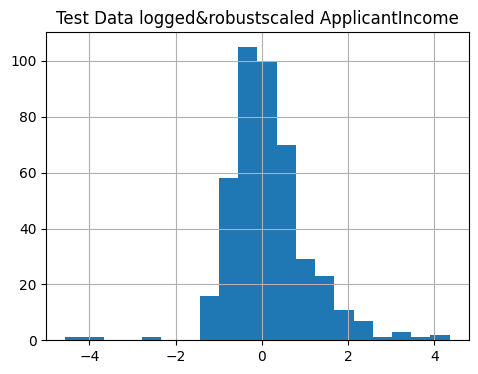

In [ ]:
ax1 = plt.subplot(121)
X_train['ApplicantIncome_Log_RobustScaled'].hist(bins=20, figsize=(12,4))
ax1.set_title("Test Data logged&robustscaled ApplicantIncome")

Text(0.5, 1.0, 'Test Data logged&robustscaled ApplicantIncome')

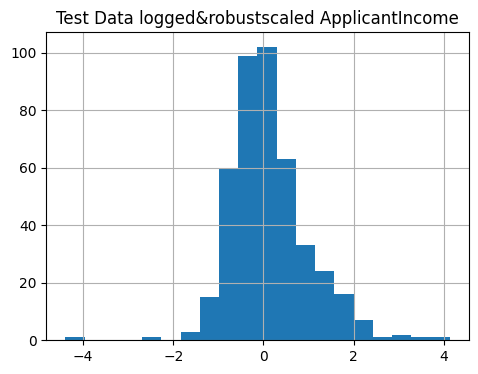

In [ ]:
ax1 = plt.subplot(121)
X_train['ApplicantIncome_Log_RobustScaled'].hist(bins=20, figsize=(12,4))
ax1.set_title("Test Data logged&robustscaled ApplicantIncome")

In [ ]:
X_train['ApplicantIncome_Log_RobustScaled']

,ApplicantIncome_Log_RobustScaled
351,1.206654
593,0.003432
320,-0.694513
186,-0.837135
557,1.423219
...,...
277,-0.317000
9,1.770490
359,0.432414
192,0.660158


In [ ]:
X_train.head()

,Gender,Married,Dependents,Education,Self_Employed,CoapplicantIncome,Loan_Amount_Term,Credit_History,Property_Area,ApplicantIncome_Log_RobustScaled
351,Male,No,0,Graduate,No,4167.0,360.0,1.0,Rural,1.206654
593,Male,Yes,0,Graduate,No,3300.0,180.0,1.0,Rural,0.003432
320,Male,Yes,0,Graduate,No,2167.0,360.0,1.0,Semiurban,-0.694513
186,Male,Yes,1,Graduate,Yes,0.0,300.0,0.0,Rural,-0.837135
557,Male,Yes,3+,Graduate,Yes,0.0,360.0,1.0,Semiurban,1.423219


In [ ]:
X_test

,Gender,Married,Dependents,Education,Self_Employed,Loan_Amount_Term,Credit_History,Property_Area,ApplicantIncome_Log_RobustScaled
350,Male,Yes,0,Graduate,No,360.0,1.0,Semiurban,1.161101
377,Male,Yes,0,Graduate,No,360.0,1.0,Semiurban,0.150222
163,Male,Yes,2,Graduate,No,360.0,1.0,Rural,0.104470
609,Female,No,0,Graduate,No,360.0,1.0,Rural,-0.387012
132,Male,No,0,Graduate,No,360.0,1.0,Semiurban,-0.474886
...,...,...,...,...,...,...,...,...,...
380,Male,Yes,0,Graduate,No,360.0,1.0,Semiurban,-0.198333
446,Male,Yes,2,Not Graduate,No,360.0,1.0,Rural,0.253761
144,Male,Yes,2,Graduate,No,180.0,1.0,Urban,1.511042
290,Male,Yes,0,Graduate,No,360.0,1.0,Rural,-0.307570


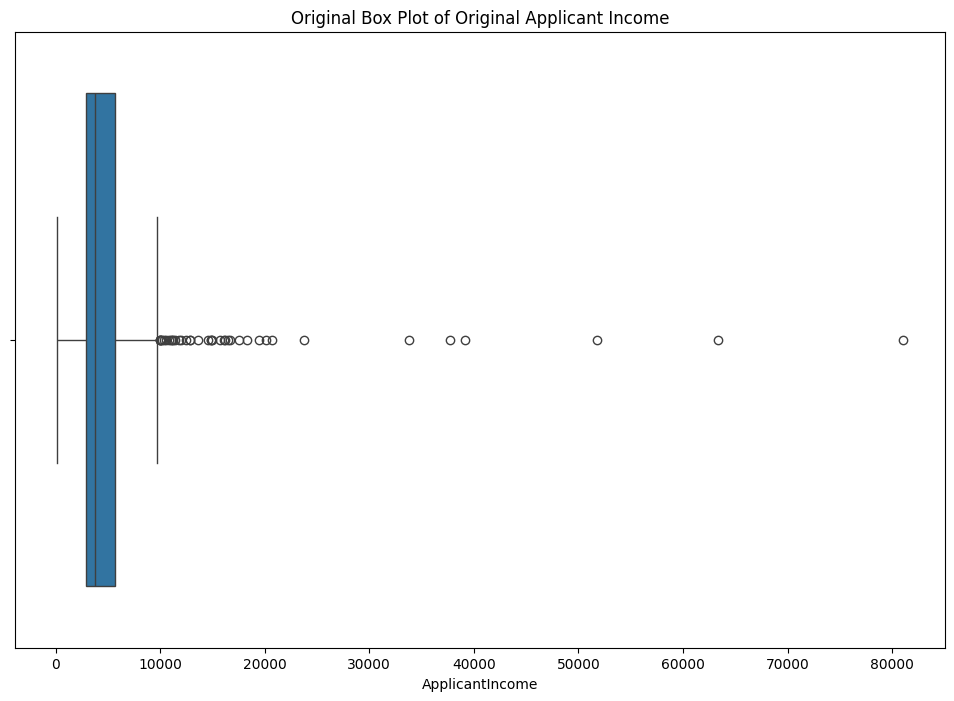

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Box Plot of Applicant Income by Income Category
plt.figure(figsize=(12, 8))
sns.boxplot( x='ApplicantIncome', data=X_train)
plt.title('Original Box Plot of Original Applicant Income')
plt.show()

In [ ]:
X_train["ApplicantIncome"].describe()

,ApplicantIncome
count,429.000000
mean,5398.745921
std,6676.190425
min,150.000000
25%,2873.000000
50%,3727.000000
75%,5677.000000
max,81000.000000


In [ ]:
X_train['ApplicantIncome_Log_RobustScaled'].describe()

,ApplicantIncome_Log_RobustScaled
count,429.000000
mean,0.164220
std,0.924372
min,-4.559691
25%,-0.381168
50%,0.000000
75%,0.618832
max,4.352036


#### **Skewed due to outlier**

#### **solution: Applied log and robust scaling both on Aplicant Income**

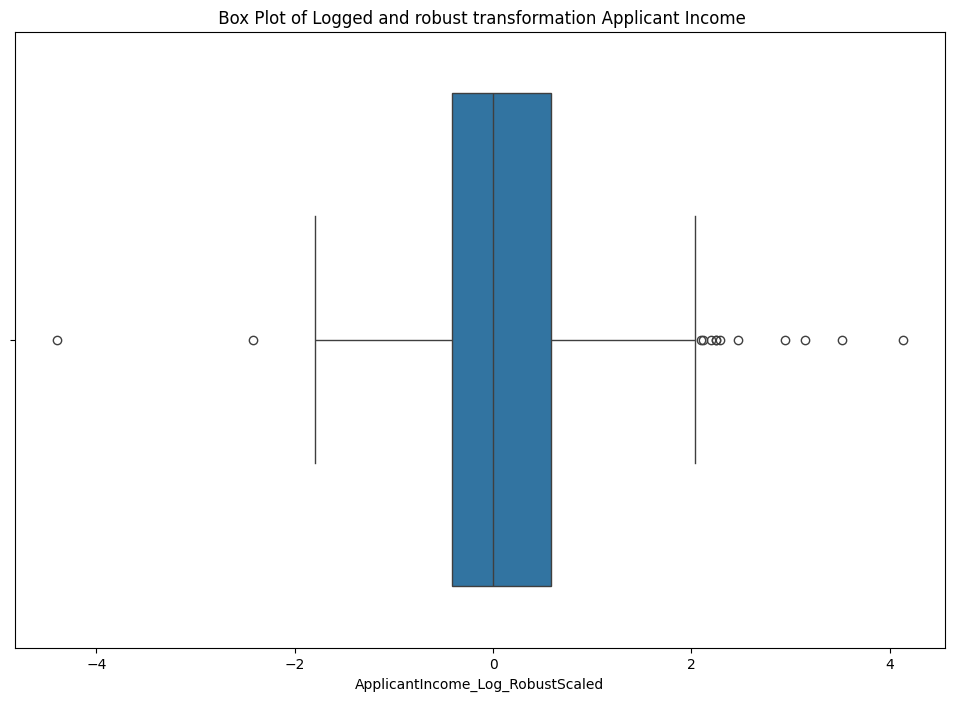

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


# Box Plot of Applicant Income by Income Category
plt.figure(figsize=(12, 8))
sns.boxplot( x='ApplicantIncome_Log_RobustScaled', data=X_train)
plt.title(' Box Plot of Logged and robust transformation Applicant Income')
plt.show()

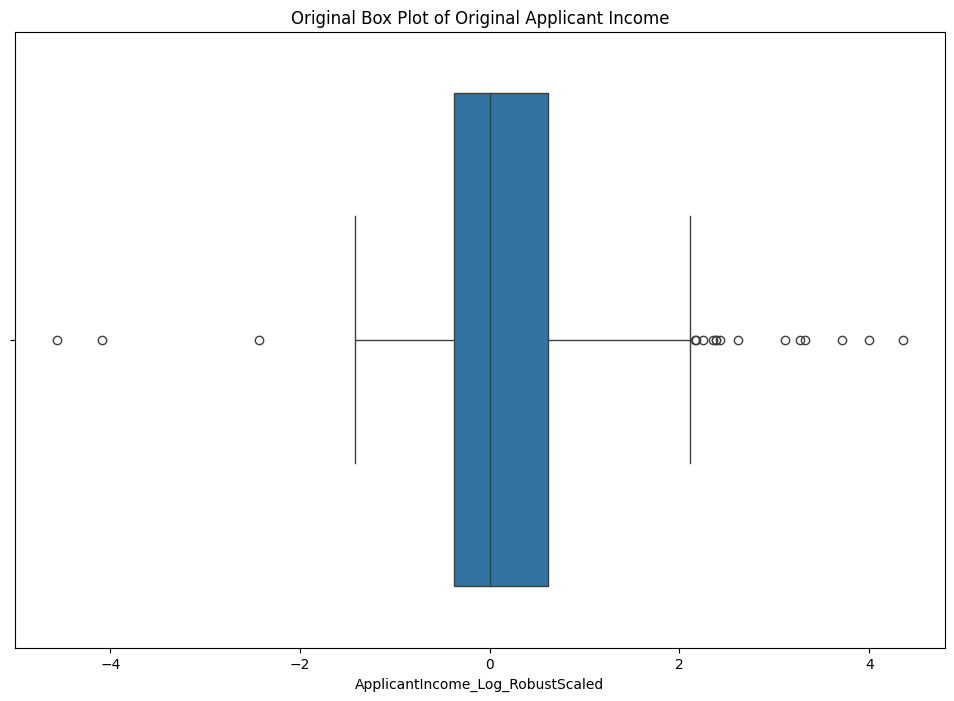

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


# Box Plot of Applicant Income by Income Category
plt.figure(figsize=(12, 8))
sns.boxplot( x='ApplicantIncome_Log_RobustScaled', data=X_train)
plt.title('Original Box Plot of Original Applicant Income')
plt.show()

<ipython-input-78-ee9e748cc477>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['ApplicantIncome_Log_RobustScaled']);


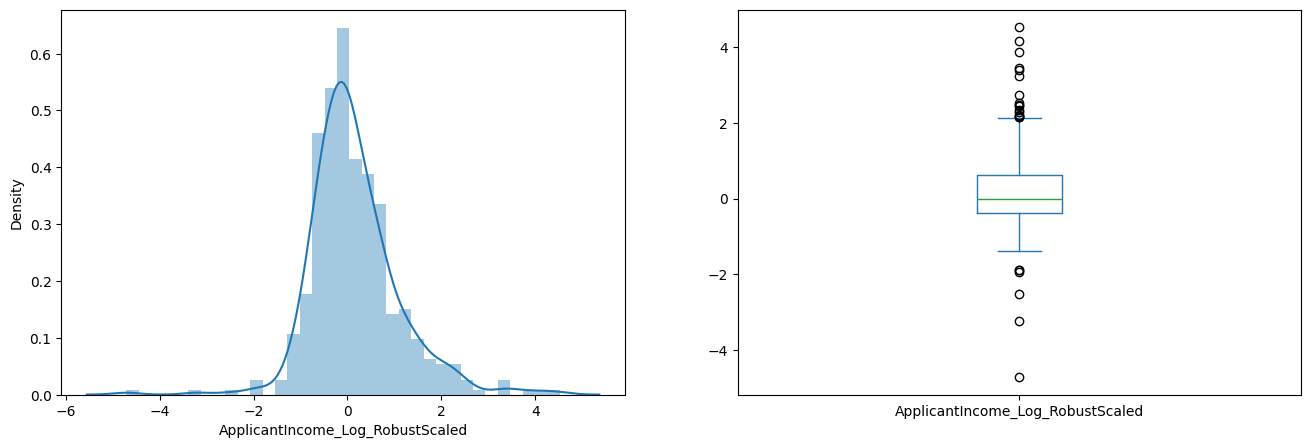

In [ ]:
# plt.figure(1)
plt.subplot(121)

sns.distplot(X_train['ApplicantIncome_Log_RobustScaled']);

plt.subplot(122)
X_train['ApplicantIncome_Log_RobustScaled'].plot.box(figsize=(16,5))

plt.show()

In [ ]:
X_train['ApplicantIncome_Log_RobustScaled'].describe()

,ApplicantIncome_Log_RobustScaled
count,429.000000
mean,0.135421
std,0.866526
min,-4.395475
25%,-0.418703
50%,0.000000
75%,0.581297
max,4.128522


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Box Plot of Applicant Income by Income Category
plt.figure(figsize=(12, 8))
sns.boxplot( x='', data=X_train)
plt.title('Original Box Plot of Original Applicant Income')
plt.show()

#### **Impute3: Robust scaling for outliers**:
Details:
Both standard and robust scalers transform inputs to comparable scales. The difference lies in how they scale raw input values.

Standard scaling uses mean and standard deviation. Robust scaling uses median and interquartile range (IQR) instead.

Robust scaling answers a simple question. How far is each data point from the input’s median? More precisely, it measures this distance in terms of the IQR

when outliers are present, the standard scaler produces a distorted view of the original distribution.

Robust scaler doesn’t suffer from this defect. It resists the pull of outliers. Its scaled values have enough range so that the distance between outliers and other values remains largely intact.


**Conclusion**

Outliers can significantly affect statistics such as mean and standard deviation. Therefore, you may want to avoid using the standard scaling when the input has outliers.

We should use robust scaling instead. It uses median and interquartile range (IQR) to scale input values. Both of these statistics are resistant to outliers. That’s why robust scaling is immune to the adverse influence of outliers.

In [ ]:
data3 = data.copy()

In [ ]:
data3["ApplicantIncome"]


,ApplicantIncome
0,5849
1,4583
2,3000
3,2583
4,6000
...,...
609,2900
610,4106
611,8072
612,7583


In [ ]:
from sklearn.preprocessing import RobustScaler

robust_scaler = RobustScaler()
data3[["ApplicantIncome"]] = robust_scaler.fit_transform(data3[["ApplicantIncome"]])
data3[["LoanAmount"]] = robust_scaler.fit_transform(data3[["LoanAmount"]])

Text(0.5, 1.0, 'RobustScaledApplicantIncome')

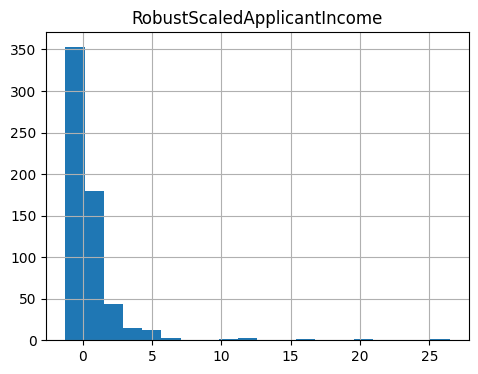

In [ ]:


ax1 = plt.subplot(121)
data3["ApplicantIncome"].hist(bins=20, figsize=(12,4))
ax1.set_title("RobustScaledApplicantIncome")

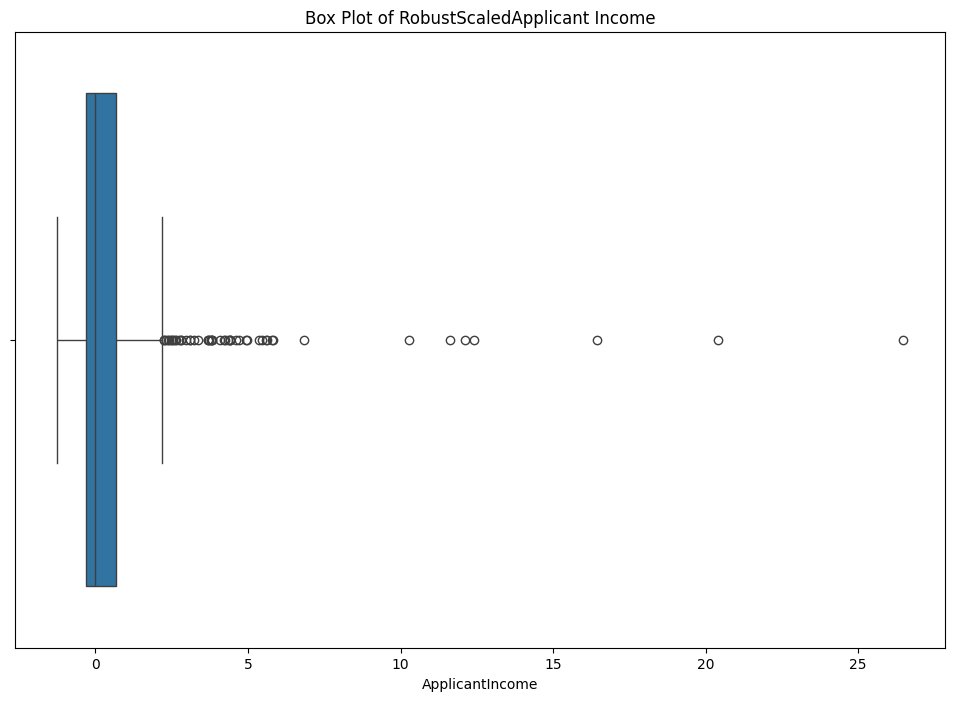

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Box Plot of Applicant Income by Income Category
plt.figure(figsize=(12, 8))
sns.boxplot( x='ApplicantIncome', data=data3)
plt.title('Box Plot of RobustScaledApplicant Income')
plt.show()

Text(0.5, 1.0, 'LoanAmount')

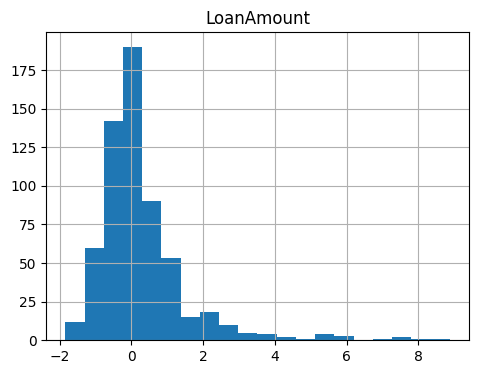

In [ ]:

ax1 = plt.subplot(121)
data3["LoanAmount"].hist(bins=20, figsize=(12,4))
ax1.set_title("LoanAmount")

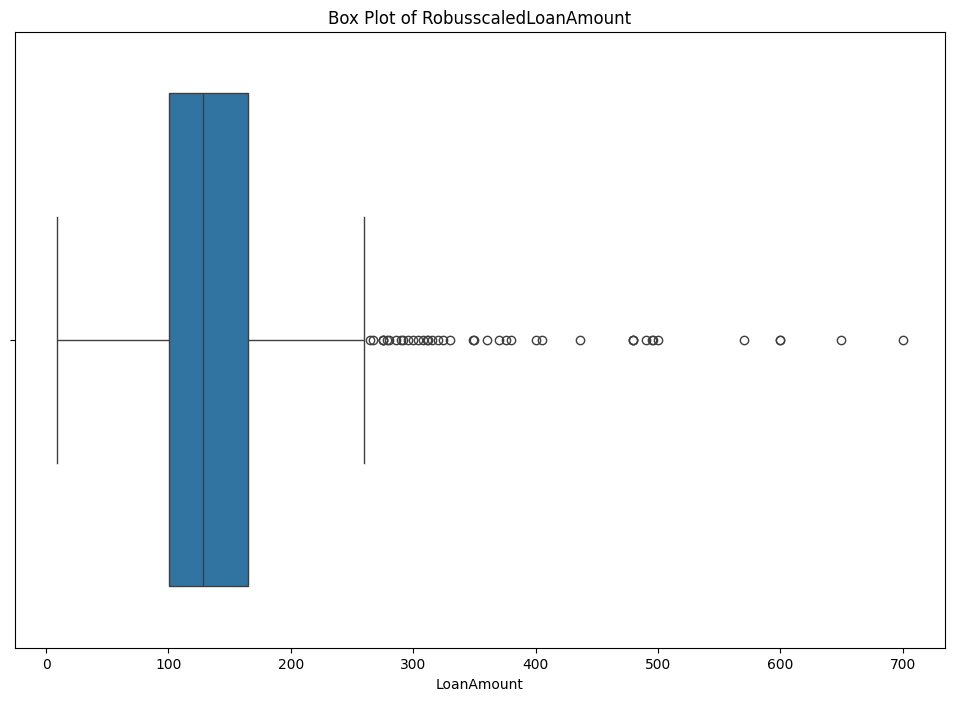

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Box Plot of Applicant Income by Income Category
plt.figure(figsize=(12, 8))
sns.boxplot( x='LoanAmount', data=data_fact)
plt.title('Box Plot of RobusscaledLoanAmount')
plt.show()

####**Before splitting data into train and test,check  "Data imbalance"**:


*  Since data imbalance can  effect model accuracy.

*  Sometimes even the accuracy is high, but confusion matrix shows high number of type1 and type2 error(FP, FN) which means  model predicted it wrong and so we say variance increases.

*  You get biased results.




#### **Conclusion on Imbalance**:




*   In imbalanced datasets, models tend to perform well for the majority class because there is more data available for that class. However, they might struggle with the minority class due to the lack of sufficient data. This can result in a model that is good at predicting loans that will be approved but performs poorly in identifying loans that should be rejected.

*   Here, approved loan(1) has majority then not approved loan(0), model might get biased and predict mostly non approved as appproved, which somtines gives good accuracy but in confusion  matrix, false posiive and negative effected.
*   Approved loans (1) are the majority, the model is more likely to predict 1 (approved) even when the actual label is 0 (not approved). This leads to an increase in false positives (Type 1 error) because
A false positive happens when the model predicts 1 (approved), but the actual class is 0 (not approved).


*  False positive( predicted positive(1) but actual 0)







#### **Techniques to overcome Imbalance**
** consider techniques like:**

1. **Cross-Validation:**
In cross-validation, the dataset is split into multiple subsets (folds), and the model is trained on different combinations of the data.
Stratified K-Fold Cross-Validation ensures that the proportion of each class is maintained in every fold, which helps provide a more balanced evaluation.This technique prevents overfitting to the majority class by ensuring the model performs well on unseen data.
2. **Oversampling** the minority class.
2. **Undersampling** the majority class.
3. Using algorithms that are robust to imbalance (like Random Forest or XGBoost).
4. **Hypertuning Methods**: Adjusting class weights, nestimators, during model training.




#### **Steps Before Transformation:**
*   Check that  important features selected which are  considered important by analysis on  raw data.

*   Seperate independent(features)  and dependent(test data).

*  **CAUTION:** Apply train test split first then transform (esp wen you are using pipeline and fit_transform, trnsform.


*  You can proceed  without train test split, wen you are using hot encoding using dummy not pipeline. you can apply on whole dataset encoding method.


Without Pipeline (Whole Dataset Encoding)

*   Without Pipeline (Whole Dataset Encoding)
1. Feature Selection: Select important features.
Separate Variables: Split into independent (features) and dependent (target).
2. Encoding: Apply one-hot encoding to the entire dataset.
Pros:
3. Simplicity: Easier to implement for small datasets.

* Cons:
1. Risk of Data Leakage: Using the entire dataset for encoding can lead to leakage into the test set.
2. Less flexible for scaling or other preprocessing steps.



* With Pipeline (Training/Test Split)
1. Feature Selection: Select important features.
2. Separate Variables: Split into independent (features) and dependent (target).
3. Train-Test Split: Divide data into training and test sets.
4. Encoding: Use ColumnTransformer and Pipeline for one-hot encoding and other preprocessing.

* Pros:
1. Avoids Data Leakage: Encodes only training data and applies the same transformation to the test set.
2. Modular and Flexible: Easily integrate additional preprocessing steps (e.g., scaling, imputation).

* Cons:

1. Slightly More Complex: Requires understanding of pipelines and transformers.


Summary
Whole Dataset Encoding is simpler but risks data leakage.
Pipeline Method is more robust and flexible, ensuring proper handling of transformations without leakage.















####**Transformation:**

####**Feature Transformation :**

Process:

1. Tranformation is done seperately on categorical and numerical columns.

2. Different algorithms like one category as linear regression algo requires gradient descent which means it searches for that point / weight that converges toards global minima to minimize loss. Similarly, other algo as decision tree, random forestDecision tree, Clustering requires Euclean Distance.

3. In algorithms that use gradient descent, converging at a point gets easier if data is transormed to same units, otherwise it takes time to converge towards fglobal minima.

4. In decision tree and all where we require eucleadean concepts , there also we require transformation

4. Deep Learning Techniques(Standarization, Scaling) 1. ANN -->Global Minima, gradient descent


Type of Transformation:

*   Normalisation and Standarization
*   scaling to min and max values



*   Scaling to Median and Quantiles




*  Square Rooot Trabsformation
*  Exponential Transformation


*   Guassian Transformation

*   Logarthmic Transformation
*   Reciprocal Transformation
*  Box Cox Transformation

NOTE: For train x : use fit_transform(when using pipeline)
      For test/ target col : transform(when using pipeline)









#### **One Hot Encoding: Converting catagorical to numerical**

###**Tansformation**:



*    Catagorical columns converted to numerical using hot encoding.


*   Applying dummy var to whole data set


####**Case1: Contains 14 variable for model training**















### **Xtrain , Xtest catagorical column conversion to numerical**

```
# This is formatted as code
```



In [ ]:
Xtrain_catag_col =  X_train.select_dtypes(include=['object']).columns
Xtest_catag_col =  X_test.select_dtypes(include=['object']).columns

In [ ]:
Xtrain_catag_col

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Property_Area'],
      dtype='object')

In [ ]:
# for X_train data
dat_new = pd.get_dummies(X_train,list(Xtrain_catag_col),drop_first=True)


 #Convert boolean columns to integer
bool_cols = dat_new.select_dtypes(include=['bool']).columns
dat_new[bool_cols] = dat_new[bool_cols].astype(int)
dat_new

,CoapplicantIncome,Loan_Amount_Term,Credit_History,ApplicantIncome_Log_RobustScaled,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
351,4167.0,360.0,1.0,1.206654,1,0,0,0,0,0,0,0,0
593,3300.0,180.0,1.0,0.003432,1,1,0,0,0,0,0,0,0
320,2167.0,360.0,1.0,-0.694513,1,1,0,0,0,0,0,1,0
186,0.0,300.0,0.0,-0.837135,1,1,1,0,0,0,1,0,0
557,0.0,360.0,1.0,1.423219,1,1,0,0,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
277,1300.0,360.0,1.0,-0.317000,1,1,0,0,0,0,0,0,1
9,10968.0,360.0,1.0,1.770490,1,1,1,0,0,0,0,1,0
359,3167.0,360.0,1.0,0.432414,1,1,0,0,1,0,0,1,0
192,0.0,360.0,1.0,0.660158,1,1,0,0,0,1,0,0,1


In [ ]:
X_train_new = dat_new.copy()

In [ ]:
## For X_test data

dat_new1 = pd.get_dummies(X_test,list(Xtest_catag_col),drop_first=True)


 #Convert boolean columns to integer
bool_cols = dat_new1.select_dtypes(include=['bool']).columns
dat_new1[bool_cols] = dat_new1[bool_cols].astype(int)
dat_new1

,CoapplicantIncome,Loan_Amount_Term,Credit_History,ApplicantIncome_Log_RobustScaled,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
454,0.0,360.0,1.0,0.896408,1,0,0,0,0,0,1,1,0
52,0.0,360.0,1.0,0.138338,0,0,0,0,0,0,0,1,0
536,3906.0,360.0,1.0,0.684321,1,1,0,0,0,0,0,0,1
469,2451.0,360.0,1.0,0.173696,1,1,0,0,0,0,0,0,1
55,1167.0,360.0,1.0,-0.517089,1,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
242,5701.0,60.0,1.0,-0.383853,1,0,0,0,0,0,0,0,1
515,3428.0,360.0,1.0,-0.154417,1,1,0,0,1,0,0,0,0
582,0.0,360.0,1.0,-0.287462,0,1,0,0,0,0,0,1,0
225,0.0,360.0,1.0,-0.248980,1,1,0,0,0,0,0,0,0


In [ ]:
dat_new1.head()

,CoapplicantIncome,Loan_Amount_Term,Credit_History,ApplicantIncome_Log_RobustScaled,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
454,0.0,360.0,1.0,0.896408,1,0,0,0,0,0,1,1,0
52,0.0,360.0,1.0,0.138338,0,0,0,0,0,0,0,1,0
536,3906.0,360.0,1.0,0.684321,1,1,0,0,0,0,0,0,1
469,2451.0,360.0,1.0,0.173696,1,1,0,0,0,0,0,0,1
55,1167.0,360.0,1.0,-0.517089,1,1,0,1,0,0,0,1,0


In [ ]:
dat_new1.columns

Index(['CoapplicantIncome', 'Loan_Amount_Term', 'Credit_History',
       'ApplicantIncome_Log_RobustScaled', 'Gender_Male', 'Married_Yes',
       'Dependents_1', 'Dependents_2', 'Dependents_3+',
       'Education_Not Graduate', 'Self_Employed_Yes',
       'Property_Area_Semiurban', 'Property_Area_Urban'],
      dtype='object')

In [ ]:
X_test_new = dat_new1.copy()

#### **Applying Label Encoder() to target variable in y)train , ytest as they are binary variables.**

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

# Apply label encoding to the target variable
y_train_new = label_encoder.fit_transform(y_train)
y_test_new = label_encoder.transform(y_test)

print(y_train_new)  # Check the encoded target values


[0 1 1 0 1 1 1 1 1 0 0 1 1 0 1 0 0 1 0 0 1 1 1 1 1 1 1 1 0 1 0 1 0 1 1 1 1
 0 0 1 1 1 0 1 1 0 0 0 1 1 1 0 1 0 0 1 0 0 0 1 1 1 1 1 0 0 0 0 1 1 0 1 1 1
 1 1 1 0 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1
 1 1 0 0 1 0 1 0 0 0 1 0 1 1 1 1 1 0 0 1 0 1 1 1 1 0 0 1 1 1 1 1 0 0 1 1 1
 1 0 1 1 1 1 0 0 1 1 0 1 1 1 0 1 1 1 0 1 0 1 0 1 1 0 0 0 1 0 1 1 1 1 1 0 1
 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 0 0 1 0 1 1 1 0 1 1 0 1 0 1 0 1 1 1
 1 1 1 1 1 1 0 1 1 0 1 1 1 0 0 1 1 1 1 0 1 0 1 1 1 1 1 0 1 0 1 0 0 1 1 0 1
 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 0 1 0 0 0 0 1 1 1 1 0 0 1 1 1 1 0 1 0 1 1
 1 1 1 0 1 1 1 1 1 1 1 0 1 0 0 0 1 1 0 1 1 1 1 0 1 1 0 1 0 0 0 1 1 1 1 1 1
 1 1 0 1 0 1 1 1 0 1 1 1 0 0 1 1 1 1 0 1 1 1 1 1 1 0 1 0 1 0 1 1 0 0 1 1 0
 1 1 1 1 1 1 1 0 1 1 0 0 1 0 1 1 1 1 1 1 1 0 0 1 0 0 0 0 0 1 1 1 1 1 1 0 1
 0 1 0 0 1 1 1 0 1 1 0 0 0 0 1 1 1 1 0 1 0 1]


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


#### **Feature transformation**

In [ ]:
# Rename 'dependents_3+' to 'Dependents_3' in X_train
X_train_new = X_train_new.rename(columns={'Dependents_3+': 'Dependents_3'})

# Rename 'dependents_3+' to 'Dependents_3' in X_test
X_test_new = X_test_new.rename(columns={'Dependents_3+': 'Dependents_3'})


In [ ]:
X_train_new.columns

Index(['CoapplicantIncome', 'Loan_Amount_Term', 'Credit_History',
       'ApplicantIncome_Log_RobustScaled', 'Gender_Male', 'Married_Yes',
       'Dependents_1', 'Dependents_2', 'Dependents_3',
       'Education_Not Graduate', 'Self_Employed_Yes',
       'Property_Area_Semiurban', 'Property_Area_Urban'],
      dtype='object')

In [ ]:
X_test_new.columns

Index(['CoapplicantIncome', 'Loan_Amount_Term', 'Credit_History',
       'ApplicantIncome_Log_RobustScaled', 'Gender_Male', 'Married_Yes',
       'Dependents_1', 'Dependents_2', 'Dependents_3',
       'Education_Not Graduate', 'Self_Employed_Yes',
       'Property_Area_Semiurban', 'Property_Area_Urban'],
      dtype='object')

####**More Steps to Feature engineering:**


* Feature Transforming
* Feature encoding categorical

* Feature selection





#### **Conclusion**



*   X_train and y_train is used in training and predicting train model output.


* X_test and y_test for predicting the testing model accuracyand work.




#### **Methods to remove Imbalance**:

**1. Method1: Using Cross validation**

In [ ]:
X

####**Model training, Evaluation, optimisation**

In [ ]:
from sklearn.linear_model import LogisticRegression
model_lr =  LogisticRegression(max_iter=200)
model_lr.fit(X_train_new, y_train_new)  # Fit the model
y_pred = model_lr.predict(X_test_new)  # Make predictions

        # Calculate accuracy score
acc = accuracy_score(y_test_new, y_pred)

        # Generate classification report as a dictionary
report_dict = classification_report(y_test_new, y_pred, output_dict=True)
print(report_dict)
# Compute confusion matrix
conf_matrix_lr = confusion_matrix(y_test_new, y_pred)
print("Confusion Matrix for Random Forest:")
print(conf_matrix_lr)
conf_matrix_lr
# # Display confusion matrix
# disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_lr, display_labels= rfc_100.classes_)

# disp.plot(cmap=plt.cm.Blues)
# plt.title("Confusion Matrix for Random Forest")
# plt.show()

{'0': {'precision': 0.9166666666666666, 'recall': 0.43137254901960786, 'f1-score': 0.5866666666666667, 'support': 51.0}, '1': {'precision': 0.8198757763975155, 'recall': 0.9850746268656716, 'f1-score': 0.8949152542372881, 'support': 134.0}, 'accuracy': 0.8324324324324325, 'macro avg': {'precision': 0.8682712215320911, 'recall': 0.7082235879426397, 'f1-score': 0.7407909604519773, 'support': 185.0}, 'weighted avg': {'precision': 0.846558670471714, 'recall': 0.8324324324324325, 'f1-score': 0.8099386165826844, 'support': 185.0}}
Confusion Matrix for Random Forest:
[[ 22  29]
 [  2 132]]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([[ 22,  29],
       [  2, 132]])

# we will see fp of 0 and pecision of 1 : fp is high so recall small: we want less 0 to be 1 as defaultrs are predicted as non default here so fp high

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
#model_lr =  LogisticRegression(max_iter=200)
model_rf=  RandomForestClassifier(random_state= 0)
model_rf.fit(X_train_new, y_train_new)  # Fit the model
y_pred = model_rf.predict(X_test_new)  # Make predictions

        # Calculate accuracy score
acc = accuracy_score(y_test_new, y_pred)

        # Generate classification report as a dictionary
report_dict = classification_report(y_test_new, y_pred, output_dict=True)
print(report_dict)
# Compute confusion matrix
conf_matrix_rf = confusion_matrix(y_test_new, y_pred)
print("Confusion Matrix for Random Forest:")
print(conf_matrix_rf)
conf_matrix_rf

{'0': {'precision': 0.6410256410256411, 'recall': 0.49019607843137253, 'f1-score': 0.5555555555555556, 'support': 51.0}, '1': {'precision': 0.821917808219178, 'recall': 0.8955223880597015, 'f1-score': 0.8571428571428571, 'support': 134.0}, 'accuracy': 0.7837837837837838, 'macro avg': {'precision': 0.7314717246224096, 'recall': 0.692859233245537, 'f1-score': 0.7063492063492063, 'support': 185.0}, 'weighted avg': {'precision': 0.7720502378036623, 'recall': 0.7837837837837838, 'f1-score': 0.7740025740025739, 'support': 185.0}}
Confusion Matrix for Random Forest:
[[ 25  26]
 [ 14 120]]


array([[ 25,  26],
       [ 14, 120]])

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
#model_lr =  LogisticRegression(max_iter=200)
model_dt=  DecisionTreeClassifier(random_state=40)

model_dt.fit(X_train_new, y_train_new)  # Fit the model
y_pred = model_dt.predict(X_test_new)  # Make predictions

        # Calculate accuracy score
acc = accuracy_score(y_test_new, y_pred)

        # Generate classification report as a dictionary
report_dict = classification_report(y_test_new, y_pred, output_dict=True)
print(report_dict)
# Compute confusion matrix
conf_matrix_dt = confusion_matrix(y_test_new, y_pred)
print("Confusion Matrix for Random Forest:")
print(conf_matrix_dt)
conf_matrix_dt
acc = accuracy_score(y_test, y_pred)
print(acc)

{'0': {'precision': 0.5079365079365079, 'recall': 0.6274509803921569, 'f1-score': 0.5614035087719298, 'support': 51.0}, '1': {'precision': 0.8442622950819673, 'recall': 0.7686567164179104, 'f1-score': 0.8046875, 'support': 134.0}, 'accuracy': 0.7297297297297297, 'macro avg': {'precision': 0.6760994015092376, 'recall': 0.6980538484050336, 'f1-score': 0.6830455043859649, 'support': 185.0}, 'weighted avg': {'precision': 0.7515454564634892, 'recall': 0.7297297297297297, 'f1-score': 0.7376200213371266, 'support': 185.0}}
Confusion Matrix for Random Forest:
[[ 32  19]
 [ 31 103]]


array([[ 32,  19],
       [ 31, 103]])

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
#model_lr =  LogisticRegression(max_iter=200)
model_dt=  DecisionTreeClassifier(random_state=40)

model_dt.fit(X_train_new, y_train_new)  # Fit the model
y_pred = model_dt.predict(X_test_new)  # Make predictions

        # Calculate accuracy score
acc = accuracy_score(y_test_new, y_pred)

        # Generate classification report as a dictionary
report_dict = classification_report(y_test_new, y_pred, output_dict=True)
print(report_dict)
# Compute confusion matrix
conf_matrix_dt = confusion_matrix(y_test_new, y_pred)
print("Confusion Matrix for Random Forest:")
print(conf_matrix_dt)
conf_matrix_dt
acc = accuracy_score(y_test_new, y_pred)
print(acc)

{'0': {'precision': 0.5079365079365079, 'recall': 0.6274509803921569, 'f1-score': 0.5614035087719298, 'support': 51.0}, '1': {'precision': 0.8442622950819673, 'recall': 0.7686567164179104, 'f1-score': 0.8046875, 'support': 134.0}, 'accuracy': 0.7297297297297297, 'macro avg': {'precision': 0.6760994015092376, 'recall': 0.6980538484050336, 'f1-score': 0.6830455043859649, 'support': 185.0}, 'weighted avg': {'precision': 0.7515454564634892, 'recall': 0.7297297297297297, 'f1-score': 0.7376200213371266, 'support': 185.0}}
Confusion Matrix for Random Forest:
[[ 32  19]
 [ 31 103]]
0.7297297297297297


# bootstrap methods

In [ ]:
from sklearn.utils import resample

# Create a bootstrap sample
X_bootstrap, y_bootstrap = resample(X_train_new, y_train_new)

# Train the model on the bootstrap sample
model_dt.fit(X_bootstrap, y_bootstrap)
y_pred = model_dt.predict(X_test_new)

# Print metrics for the bootstrap sample
print(classification_report(y_test_new, y_pred))


              precision    recall  f1-score   support

           0       0.42      0.49      0.45        51
           1       0.79      0.75      0.77       134

    accuracy                           0.68       185
   macro avg       0.61      0.62      0.61       185
weighted avg       0.69      0.68      0.68       185



####** stratified**

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


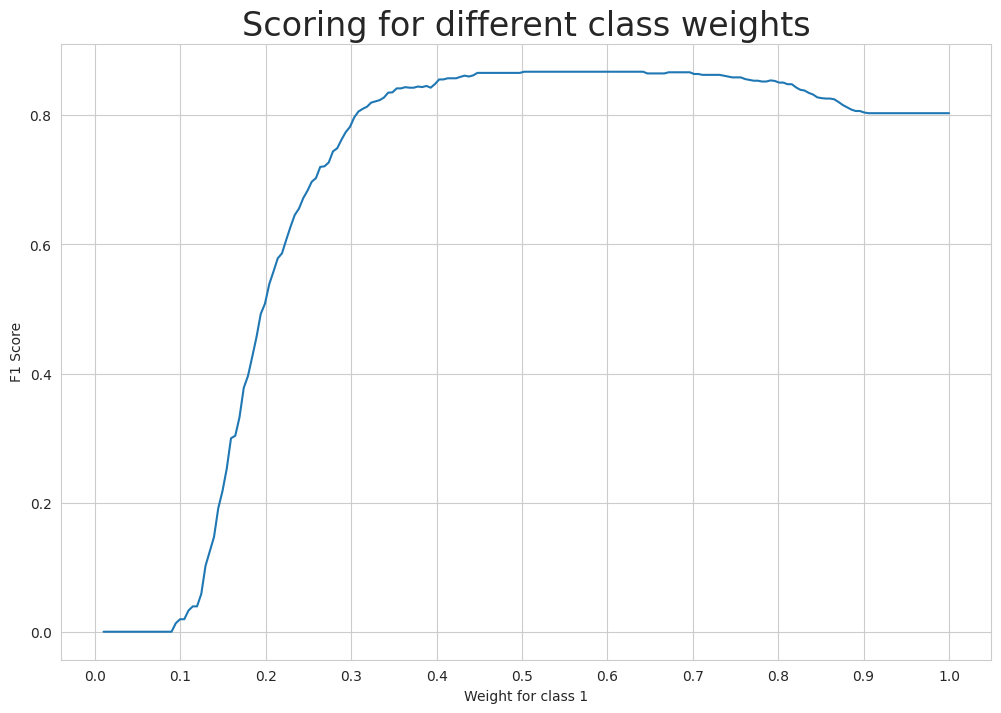

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, StratifiedKFold

# Assume X_train_new and y_train_new are already defined

# Initialize Logistic Regression model
lr = LogisticRegression(solver='newton-cg')

# Generate the range for class weights
weights = np.linspace(0.0, 0.99, 200)

# Create the parameter grid for GridSearchCV
param_grid = {'class_weight': [{0: x, 1: 1.0 - x} for x in weights]}

# Initialize StratifiedKFold with 5 splits
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform GridSearchCV with StratifiedKFold
gridsearch = GridSearchCV(estimator=lr,
                          param_grid=param_grid,
                          cv=stratified_kfold,
                          n_jobs=-1,
                          scoring='f1',
                          verbose=2)

# Fit the GridSearchCV
gridsearch.fit(X_train_new, y_train_new)

# Create a DataFrame for the results and plot the F1 scores against the class weights
sns.set_style('whitegrid')
plt.figure(figsize=(12, 8))

# Extracting the mean test scores from gridsearch results and converting them into a DataFrame
weigh_data = pd.DataFrame({
    'score': gridsearch.cv_results_['mean_test_score'],
    'weight': (1 - weights)  # Mapping the weight for class 1
})

# Plot the results
sns.lineplot(data=weigh_data, x='weight', y='score')
plt.xlabel('Weight for class 1')
plt.ylabel('F1 Score')
plt.xticks([round(i / 10, 1) for i in range(0, 11, 1)])
plt.title('Scoring for different class weights', fontsize=24)
plt.show()


Fitting 5 folds for each of 200 candidates, totalling 1000 fits


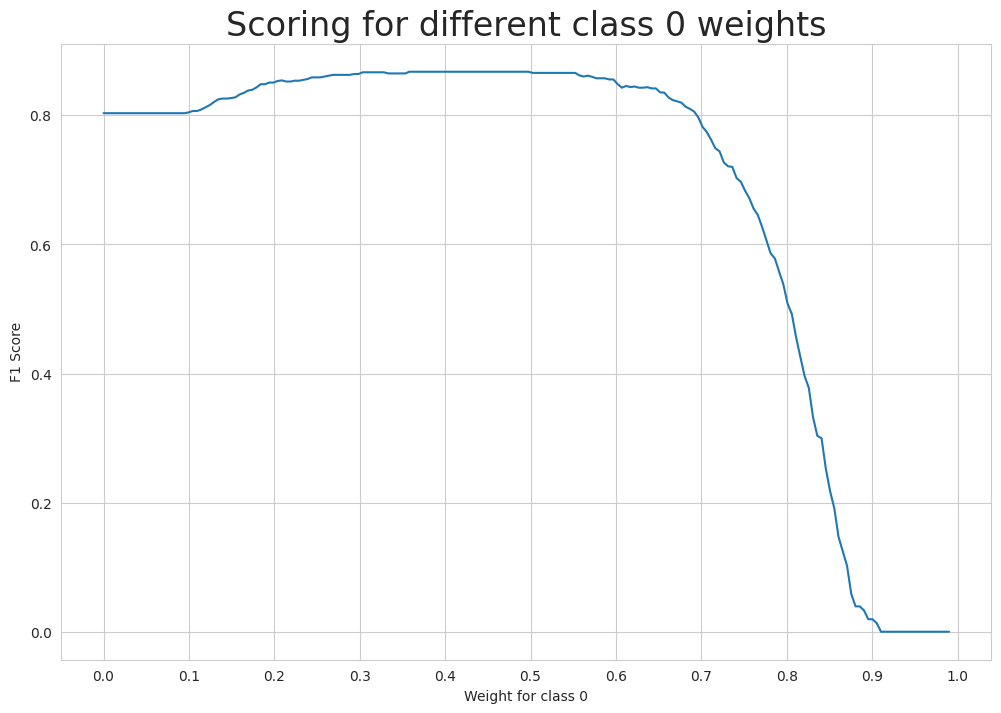

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, StratifiedKFold

# Assume X_train_new and y_train_new are already defined

# Initialize Logistic Regression model
lr = LogisticRegression(solver='newton-cg')

# Generate the range for class weights
weights = np.linspace(0.0, 0.99, 200)

# Create the parameter grid for GridSearchCV
param_grid = {'class_weight': [{0: x, 1: 1.0 - x} for x in weights]}

# Initialize StratifiedKFold with 5 splits
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform GridSearchCV with StratifiedKFold
gridsearch = GridSearchCV(estimator=lr,
                          param_grid=param_grid,
                          cv=stratified_kfold,
                          n_jobs=-1,
                          scoring='f1',
                          verbose=2)

# Fit the GridSearchCV
gridsearch.fit(X_train_new, y_train_new)

# Create a DataFrame for the results and plot the F1 scores against the class weights for class 0
sns.set_style('whitegrid')
plt.figure(figsize=(12, 8))

# Extracting the mean test scores from gridsearch results and converting them into a DataFrame
weigh_data = pd.DataFrame({
    'score': gridsearch.cv_results_['mean_test_score'],
    'weight': weights  # Now using the weight for class 0
})

# Plot the results
sns.lineplot(data=weigh_data, x='weight', y='score')
plt.xlabel('Weight for class 0')  # Label adjusted for class 0
plt.ylabel('F1 Score')
plt.xticks([round(i / 10, 1) for i in range(0, 11, 1)])
plt.title('Scoring for different class 0 weights', fontsize=24)
plt.show()


In [ ]:
#importing and training the model
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='newton-cg', class_weight={0: 0.56, 1: 0.6})
lr.fit(X_train_new, y_train_new)

# Predicting on the test data
pred_test = lr.predict(X_test_new)

#Calculating and printing the f1 score
f1_test = f1_score(y_test_new, pred_test)
print('The f1 score for the testing data:', f1_test)

#Ploting the confusion matrix
confusion_matrix(y_test_new, pred_test)

The f1 score for the testing data: 0.8949152542372881


array([[ 22,  29],
       [  2, 132]])

In [ ]:
# import library
from xgboost import XGBClassifier
mean_accuracy = []
i=1
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X_train_new,y_train_new):
    print('\n{} of kfold {}'.format(i,kf.n_splits))
    xtr,xvl = X.loc[train_index],X.loc[test_index]
    ytr,yvl = y[train_index],y[test_index]

    model = XGBClassifier(random_state=1, n_estimators=50, max_depth=4)
    model.fit(xtr, ytr)
    pred_test = model.predict(xvl)
    score = accuracy_score(yvl,pred_test)
    mean_accuracy.append(score)
    print('accuracy_score',score)
    i+=1

print("\nMean validation accuracy: ", sum(mean_accuracy)/len(mean_accuracy))
pred_test = model.predict(test)
pred3=model.predict_proba(test)[:,1]

# warnings.filterwarnings(action='ignore', category=DeprecationWarning)

In [ ]:
# Define your models
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(class_weight={0: 0.4, 1: 0.5}),
    #"SVM": SVC(class_weight={0: 1, 1: 100}, random_state=random_state, probability=True),
    #"Gradient Boosting": GradientBoostingClassifier(random_state=random_state),
    #"KNN": KNeighborsClassifier()
}

def evaluate_models(X_train, y_train, X_test, y_test, models):
    report = []
    best_model = None
    best_score = 0  # Initialize to track the best score

    for model_name, model in models.items():
        # Fit the model
        model.fit(X_train_new, y_train_new)

        # Save the model to disk as a pickle file
        with open(f'{model_name.replace(" ", "_")}.pkl', 'wb') as file:
            pickle.dump(model, file)

        # Make predictions
        y_test_pred = model.predict(X_test_new)

        # Calculate accuracy score
        acc = accuracy_score(y_test_new, y_test_pred)

        # Generate classification report as a dictionary
        report_dict = classification_report(y_test_new, y_test_pred, output_dict=True)
print(report_dict)


{'0': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 51.0}, '1': {'precision': 0.7243243243243244, 'recall': 1.0, 'f1-score': 0.8401253918495298, 'support': 134.0}, 'accuracy': 0.7243243243243244, 'macro avg': {'precision': 0.3621621621621622, 'recall': 0.5, 'f1-score': 0.4200626959247649, 'support': 185.0}, 'weighted avg': {'precision': 0.524645726807889, 'recall': 0.7243243243243244, 'f1-score': 0.6085232567991189, 'support': 185.0}}


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
#model_lr =  LogisticRegression(max_iter=200)
model_dt=  DecisionTreeClassifier(random_state=40)

model_dt.fit(X_train_new, y_train_new)  # Fit the model
y_pred = model_dt.predict(X_test_new)  # Make predictions

        # Calculate accuracy score
acc = accuracy_score(y_test_new, y_pred)

        # Generate classification report as a dictionary
report_dict = classification_report(y_test_new, y_pred, output_dict=True)
print(report_dict)
# Compute confusion matrix
conf_matrix_dt = confusion_matrix(y_test_new, y_pred)
print("Confusion Matrix for Random Forest:")
print(conf_matrix_dt)
conf_matrix_dt
acc = accuracy_score(y_test_new, y_pred)
print(acc)

{'0': {'precision': 0.5079365079365079, 'recall': 0.6274509803921569, 'f1-score': 0.5614035087719298, 'support': 51.0}, '1': {'precision': 0.8442622950819673, 'recall': 0.7686567164179104, 'f1-score': 0.8046875, 'support': 134.0}, 'accuracy': 0.7297297297297297, 'macro avg': {'precision': 0.6760994015092376, 'recall': 0.6980538484050336, 'f1-score': 0.6830455043859649, 'support': 185.0}, 'weighted avg': {'precision': 0.7515454564634892, 'recall': 0.7297297297297297, 'f1-score': 0.7376200213371266, 'support': 185.0}}
Confusion Matrix for Random Forest:
[[ 32  19]
 [ 31 103]]
0.7297297297297297


#### **seing fp as imp for is , it became 19 and tp ie 0 for 0 is 31 so recall for 0 is high as fp is low. better for us acc = 72. its basic dt**

### **adding classs weight**

In [ ]:
from sklearn.linear_model import LogisticRegression
model_lf_class = LogisticRegression(class_weight={1: 0, 1: 100})


model_lf_class.fit(X_train_new, y_train_new)  # Fit the model
y_pred = model_lf_class.predict(X_test_new)  # Make predictions

        # Calculate accuracy score
acc = accuracy_score(y_test_new, y_pred)

        # Generate classification report as a dictionary
report_dict = classification_report(y_test_new, y_pred, output_dict=True)
print(report_dict)
# Compute confusion matrix
conf_matrix_lf_class = confusion_matrix(y_test_new, y_pred)
print("Confusion Matrix for Random Forest:")


{'0': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 51.0}, '1': {'precision': 0.7243243243243244, 'recall': 1.0, 'f1-score': 0.8401253918495298, 'support': 134.0}, 'accuracy': 0.7243243243243244, 'macro avg': {'precision': 0.3621621621621622, 'recall': 0.5, 'f1-score': 0.4200626959247649, 'support': 185.0}, 'weighted avg': {'precision': 0.524645726807889, 'recall': 0.7243243243243244, 'f1-score': 0.6085232567991189, 'support': 185.0}}
Confusion Matrix for Random Forest:


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no pre

In [ ]:
#importing and training the model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix

##### **Adding weight to logitic regression**

FP = 16 decreased a lot

In [ ]:
#importing and training the model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix
lr = LogisticRegression()
lr.fit(X_train_new, y_train_new)

# Predicting on the test data
pred_test = lr.predict(X_test_new)

#Calculating and printing the f1 score
f1_test = f1_score(y_test_new, pred_test)
print('The f1 score for the testing data:', f1_test)

#Ploting the confusion matrix
conf_matrix_lr = confusion_matrix(y_test_new, pred_test)
print(conf_matrix_lr)
acc = accuracy_score(y_test_new, y_pred)

        # Generate classification report as a dictionary
report_dict = classification_report(y_test_new, y_pred, output_dict=True)
print(report_dict)



The f1 score for the testing data: 0.8949152542372881
[[ 22  29]
 [  2 132]]
{'0': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 51.0}, '1': {'precision': 0.7243243243243244, 'recall': 1.0, 'f1-score': 0.8401253918495298, 'support': 134.0}, 'accuracy': 0.7243243243243244, 'macro avg': {'precision': 0.3621621621621622, 'recall': 0.5, 'f1-score': 0.4200626959247649, 'support': 185.0}, 'weighted avg': {'precision': 0.524645726807889, 'recall': 0.7243243243243244, 'f1-score': 0.6085232567991189, 'support': 185.0}}


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no pre

In [ ]:
acc = accuracy_score(y_test_new, y_pred)

        # Generate classification report as a dictionary
report_dict = classification_report(y_test_new, y_pred, output_dict=True)
print(report_dict)

{'0': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 51.0}, '1': {'precision': 0.7243243243243244, 'recall': 1.0, 'f1-score': 0.8401253918495298, 'support': 134.0}, 'accuracy': 0.7243243243243244, 'macro avg': {'precision': 0.3621621621621622, 'recall': 0.5, 'f1-score': 0.4200626959247649, 'support': 185.0}, 'weighted avg': {'precision': 0.524645726807889, 'recall': 0.7243243243243244, 'f1-score': 0.6085232567991189, 'support': 185.0}}


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
X_train_new

,CoapplicantIncome,Loan_Amount_Term,Credit_History,ApplicantIncome_Log_RobustScaled,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
351,4167.0,360.0,1.0,1.206654,1,0,0,0,0,0,0,0,0
593,3300.0,180.0,1.0,0.003432,1,1,0,0,0,0,0,0,0
320,2167.0,360.0,1.0,-0.694513,1,1,0,0,0,0,0,1,0
186,0.0,300.0,0.0,-0.837135,1,1,1,0,0,0,1,0,0
557,0.0,360.0,1.0,1.423219,1,1,0,0,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
277,1300.0,360.0,1.0,-0.317000,1,1,0,0,0,0,0,0,1
9,10968.0,360.0,1.0,1.770490,1,1,1,0,0,0,0,1,0
359,3167.0,360.0,1.0,0.432414,1,1,0,0,1,0,0,1,0
192,0.0,360.0,1.0,0.660158,1,1,0,0,0,1,0,0,1


In [ ]:
# Define your models
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(class_weight={0: 1, 1: 100}),
    #"SVM": SVC(class_weight={0: 1, 1: 100}, random_state=random_state, probability=True),
    #"Gradient Boosting": GradientBoostingClassifier(random_state=random_state),
    #"KNN": KNeighborsClassifier()
}

def evaluate_models(X_train, y_train, X_test, y_test, models):
    report = []
    best_model = None
    best_score = 0  # Initialize to track the best score

    for model_name, model in models.items():
        # Fit the model
        model.fit(X_train_new, y_train_new)

        # Save the model to disk as a pickle file
        with open(f'{model_name.replace(" ", "_")}.pkl', 'wb') as file:
            pickle.dump(model, file)

        # Make predictions
        y_test_pred = model.predict(X_test_new)

        # Calculate accuracy score
        acc = accuracy_score(y_test_new, y_test_pred)

        # Generate classification report as a dictionary
        report_dict = classification_report(y_test_new, y_test_pred, output_dict=True)
print(report_dict)


{'0': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 51.0}, '1': {'precision': 0.7243243243243244, 'recall': 1.0, 'f1-score': 0.8401253918495298, 'support': 134.0}, 'accuracy': 0.7243243243243244, 'macro avg': {'precision': 0.3621621621621622, 'recall': 0.5, 'f1-score': 0.4200626959247649, 'support': 185.0}, 'weighted avg': {'precision': 0.524645726807889, 'recall': 0.7243243243243244, 'f1-score': 0.6085232567991189, 'support': 185.0}}


#### **Basic Model**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
import pickle



# Define the classification models
models = {
    "Logistic Regression": LogisticRegression(max_iter=200),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42)
}

def evaluate_models(X_train, y_train, X_test, y_test, models):
    model_report = []

    for model_name, model in models.items():
        model.fit(X_train, y_train)  # Fit the model
        y_pred = model.predict(X_test)  # Make predictions

        # Calculate accuracy score
        acc = accuracy_score(y_test, y_pred)

        # Generate classification report as a dictionary
        report_dict = classification_report(y_test, y_pred, output_dict=True)

        # Store results in the report
        model_report.append({
            'Model': model_name,
            'Accuracy': acc,
            'Precision': report_dict['weighted avg']['precision'],
            'Recall': report_dict['weighted avg']['recall'],
            'F1-Score': report_dict['weighted avg']['f1-score'],
            'Support': report_dict['weighted avg']['support'],
            'False Positives': sum((y_test == 0) & (y_pred == 1)),
            'False Negatives': sum((y_test == 1) & (y_pred == 0))
        })

        # Save the model to disk as a pickle file
        with open(f'{model_name.replace(" ", "_")}.pkl', 'wb') as file:
            pickle.dump(model, file)

    # Convert report to DataFrame
    report_df = pd.DataFrame(model_report)

    return report_df

# Evaluate the models
model_report_df = evaluate_models(X_train, y_train, X_test, y_test, models)

# Print the DataFrame
print("Model Report:")
print(model_report_df)

# Save the report to a CSV file
model_report_df.to_csv('classification_report_basic_models.csv', index=False)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model Report:
                 Model  Accuracy  Precision    Recall  F1-Score  Support  \
0  Logistic Regression  0.805556   0.848090  0.805556  0.772125    144.0   
1        Random Forest  0.791667   0.791667  0.791667  0.770499    144.0   
2        Decision Tree  0.729167   0.721306  0.729167  0.724312    144.0   

   False Positives  False Negatives  
0               28                0  
1               25                5  
2               22               17  


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
import pickle



# Define the classification models
models = {
    "Logistic Regression": LogisticRegression(max_iter=200),
    "Random Forest": RandomForestClassifier(random_state=40),
    "Decision Tree": DecisionTreeClassifier(random_state=40)
}

def evaluate_models(X_train, y_train, X_test, y_test, models):
    model_report = []

    for model_name, model in models.items():
        model.fit(X_train, y_train)  # Fit the model
        y_pred = model.predict(X_test)  # Make predictions

        # Calculate accuracy score
        acc = accuracy_score(y_test, y_pred)

        # Generate classification report as a dictionary
        report_dict = classification_report(y_test, y_pred, output_dict=True)

        # Store results in the report
        model_report.append({
            'Model': model_name,
            'Accuracy': acc,
            'Precision': report_dict['weighted avg']['precision'],
            'Recall': report_dict['weighted avg']['recall'],
            'F1-Score': report_dict['weighted avg']['f1-score'],
            'Support': report_dict['weighted avg']['support'],
            'False Positives': sum((y_test == 0) & (y_pred == 1)),
            'False Negatives': sum((y_test == 1) & (y_pred == 0))
        })

        # Save the model to disk as a pickle file
        with open(f'{model_name.replace(" ", "_")}.pkl', 'wb') as file:
            pickle.dump(model, file)

    # Convert report to DataFrame
    report_df = pd.DataFrame(model_report)

    return report_df

# Evaluate the models
model_report_df = evaluate_models(X_train_new, y_train_new, X_test_new, y_test_new, models)

# Print the DataFrame
print("Model Report:")
print(model_report_df)

# Save the report to a CSV file
model_report_df.to_csv('classification_report_basic_models.csv', index=False)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model Report:
                 Model  Accuracy  Precision    Recall  F1-Score  Support  \
0  Logistic Regression  0.832432   0.846559  0.832432  0.809939    185.0   
1        Random Forest  0.783784   0.771001  0.783784  0.771952    185.0   
2        Decision Tree  0.729730   0.751545  0.729730  0.737620    185.0   

   False Positives  False Negatives  
0               29                2  
1               27               13  
2               19               31  


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
import pickle



# Define the classification models
models = {
    "Logistic Regression": LogisticRegression(max_iter=200),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42)
}

def evaluate_models(X_train, y_train, X_test, y_test, models):
    model_report = []

    for model_name, model in models.items():
        model.fit(X_train, y_train)  # Fit the model
        y_pred = model.predict(X_test)  # Make predictions

        # Calculate accuracy score
        acc = accuracy_score(y_test, y_pred)

        # Generate classification report as a dictionary
        report_dict = classification_report(y_test, y_pred, output_dict=True)

        # Store results in the report
        model_report.append({
            'Model': model_name,
            'Accuracy': acc,
            'Precision': report_dict['weighted avg']['precision'],
            'Recall': report_dict['weighted avg']['recall'],
            'F1-Score': report_dict['weighted avg']['f1-score'],
            'Support': report_dict['weighted avg']['support'],
            'False Positives': sum((y_test == 0) & (y_pred == 1)),
            'False Negatives': sum((y_test == 1) & (y_pred == 0))
        })

        # Save the model to disk as a pickle file
        with open(f'{model_name.replace(" ", "_")}.pkl', 'wb') as file:
            pickle.dump(model, file)

    # Convert report to DataFrame
    report_df = pd.DataFrame(model_report)

    return report_df

# Evaluate the models
model_report_df = evaluate_models(X_train_new, y_train_new, X_test_new, y_test_new, models)

# Print the DataFrame
print("Model Report:")
print(model_report_df)

# Save the report to a CSV file
model_report_df.to_csv('classification_report_basic_models.csv', index=False)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model Report:
                 Model  Accuracy  Precision    Recall  F1-Score  Support  \
0  Logistic Regression  0.783784   0.817765  0.783784  0.756482    185.0   
1        Random Forest  0.735135   0.729077  0.735135  0.716097    185.0   
2        Decision Tree  0.681081   0.677845  0.681081  0.679283    185.0   

   False Positives  False Negatives  
0               38                2  
1               37               12  
2               31               28  


In [ ]:
print("basic model report", model_report_df)

basic model report                  Model  Accuracy  Precision    Recall  F1-Score  Support  \
0  Logistic Regression  0.805556   0.848090  0.805556  0.772125    144.0   
1        Random Forest  0.791667   0.791667  0.791667  0.770499    144.0   
2        Decision Tree  0.729167   0.721306  0.729167  0.724312    144.0   

   False Positives  False Negatives  
0               28                0  
1               25                5  
2               22               17  


####**Basic Model Report:**

> Add blockquote




*  We observe that Logistic Regression achieved the highest accuracy among all models. However, due to the imbalanced nature of the dataset, we note a significant number of false positives(28) for class 0 (not approved). This indicates that the model is not performing well in predicting loans that should be denied, which could lead to an increase in defaulters. Specifically, a high number of false positives means that the model is incorrectly classifying applicants who are ineligible for loan approval as approved (1).

*  False Negatives are notably low, as the model tends to predict the majority of instances as 1 (approved). This is a direct consequence of the data imbalance.

*  The high false positive rate negatively impacts the recall for class 0, which reflects the model's ability to correctly identify actual not-approved loans. The low recall indicates that the model is failing to capture a substantial portion of applicants who should not be approved for loans.

*  In a loan approval scenario:

1. High False Positives: This could lead to financial losses for the lending institution if loans are granted to individuals who may default on repayment.
2. High False Negatives: Conversely, this could result in missed business opportunities, where qualified applicants are unjustly denied loans.
*   Balancing the Trade-offs **bold text**
4. Given the implications of these results, we will focus on reducing false positives to improve the model's predictive performance, particularly in correctly identifying applicants who should not be approved for loans.

**Note: In our case, I will be concerntrating more on false positive as its more important in our case.**



#### **Method1: Using Cross Validation**

In [ ]:
import pandas as pd

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
import pickle

# Assuming X and y are your features and target variable respectively
# X = features
# y = target
random_state = 25

# Define the classification models
models = {
    "Logistic Regression": LogisticRegression(max_iter=200),
    "Random Forest": RandomForestClassifier(random_state=random_state),
    "Decision Tree": DecisionTreeClassifier(random_state=random_state),
    "Gradient Boosting": GradientBoostingClassifier(random_state=random_state)
}

# Define hyperparameters for each model
params = {
    "Logistic Regression": {
        'C': [0.01, 0.1, 1, 10, 100],
        'penalty': ['l2']
    },
    "Random Forest": {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20, 30]
    },
    "Decision Tree": {
        'max_depth': [None, 5, 10, 20],
        'min_samples_split': [2, 5, 10]
    },
    "Gradient Boosting": {
        'n_estimators': [50, 100],
        'learning_rate': [0.01, 0.1],
        'max_depth': [3, 5, 7]
    }
}

def evaluate_models(X_train, y_train, X_test, y_test, models, params):
    model_report = []

    for model_name, model in models.items():
        model_params = params[model_name]

        # Perform GridSearchCV
        grid_search = GridSearchCV(model, model_params, cv=5, scoring='accuracy', n_jobs=-1)
        grid_search.fit(X_train, y_train)

        best_model = grid_search.best_estimator_
        y_pred = best_model.predict(X_test)

        # Calculate accuracy score
        acc = accuracy_score(y_test, y_pred)

        # Generate classification report as a dictionary
        report_dict = classification_report(y_test, y_pred, output_dict=True)

        # Store results in the report
        model_report.append({
            'Model': model_name,
            'Best Params': grid_search.best_params_,
            'Accuracy': acc,
            'Precision': report_dict['weighted avg']['precision'],
            'Recall': report_dict['weighted avg']['recall'],
            'F1-Score': report_dict['weighted avg']['f1-score'],
            'Support': report_dict['weighted avg']['support'],
            'False Positives': sum((y_test == 0) & (y_pred == 1)),
            'False Negatives': sum((y_test == 1) & (y_pred == 0))
        })

        # Save the best model to disk as a pickle file
        with open(f'{model_name.replace(" ", "_")}.pkl', 'wb') as file:
            pickle.dump(best_model, file)

    # Convert report to DataFrame
    report_df = pd.DataFrame(model_report)

    return report_df

# Evaluate the models
CV_hypertuned_model_report_df = evaluate_models(X_train, y_train, X_test, y_test, models, params)

# Print the DataFrame
print("Model Report:")
print(CV_hypertuned_model_report_df)

# Save the report to a CSV file
CV_hypertuned_model_report_df.to_csv('classification_report_CV_HYPERTUNED14_var.csv', index=False)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model Report:
                 Model                                        Best Params  \
0  Logistic Regression                          {'C': 1, 'penalty': 'l2'}   
1        Random Forest             {'max_depth': 10, 'n_estimators': 100}   
2        Decision Tree           {'max_depth': 5, 'min_samples_split': 2}   
3    Gradient Boosting  {'learning_rate': 0.1, 'max_depth': 3, 'n_esti...   

   Accuracy  Precision    Recall  F1-Score  Support  False Positives  \
0  0.805556   0.848090  0.805556  0.772125    144.0               28   
1  0.791667   0.823568  0.791667  0.755848    144.0               29   
2  0.777778   0.812576  0.777778  0.734799    144.0               31   
3  0.770833   0.792377  0.770833  0.729023    144.0               31   

   False Negatives  
0                0  
1                1  
2                1  
3                2  


###**trying after log robust outlier**

In [ ]:
import pandas as pd

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
import pickle

# Assuming X and y are your features and target variable respectively
# X = features
# y = target
random_state = 25

# Define the classification models
models = {
    "Logistic Regression": LogisticRegression(max_iter=200),
    "Random Forest": RandomForestClassifier(random_state=random_state),
    "Decision Tree": DecisionTreeClassifier(random_state=random_state),
    "Gradient Boosting": GradientBoostingClassifier(random_state=random_state)
}

# Define hyperparameters for each model
params = {
    "Logistic Regression": {
        'C': [0.01, 0.1, 1, 10, 100],
        'penalty': ['l2']
    },
    "Random Forest": {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20, 30]
    },
    "Decision Tree": {
        'max_depth': [None, 5, 10, 20],
        'min_samples_split': [2, 5, 10]
    },
    "Gradient Boosting": {
        'n_estimators': [50, 100],
        'learning_rate': [0.01, 0.1],
        'max_depth': [3, 5, 7]
    }
}

def evaluate_models(X_train, y_train, X_test, y_test, models, params):
    model_report = []

    for model_name, model in models.items():
        model_params = params[model_name]

        # Perform GridSearchCV
        grid_search = GridSearchCV(model, model_params, cv=5, scoring='accuracy', n_jobs=-1)
        grid_search.fit(X_train, y_train)

        best_model = grid_search.best_estimator_
        y_pred = best_model.predict(X_test)

        # Calculate accuracy score
        acc = accuracy_score(y_test, y_pred)

        # Generate classification report as a dictionary
        report_dict = classification_report(y_test, y_pred, output_dict=True)

        # Store results in the report
        model_report.append({
            'Model': model_name,
            'Best Params': grid_search.best_params_,
            'Accuracy': acc,
            'Precision': report_dict['weighted avg']['precision'],
            'Recall': report_dict['weighted avg']['recall'],
            'F1-Score': report_dict['weighted avg']['f1-score'],
            'Support': report_dict['weighted avg']['support'],
            'False Positives': sum((y_test == 0) & (y_pred == 1)),
            'False Negatives': sum((y_test == 1) & (y_pred == 0))
        })

        # Save the best model to disk as a pickle file
        with open(f'{model_name.replace(" ", "_")}.pkl', 'wb') as file:
            pickle.dump(best_model, file)

    # Convert report to DataFrame
    report_df = pd.DataFrame(model_report)

    return report_df

# Evaluate the models
CV_hypertuned_model_report_df = evaluate_models(X_train_new, y_train_new, X_test_new, y_test_new, models, params)

# Print the DataFrame
print("Model Report:")
print(CV_hypertuned_model_report_df)

# Save the report to a CSV file
CV_hypertuned_model_report_df.to_csv('classification_report_CV_HYPERTUNED14_var.csv', index=False)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model Report:
                 Model                                        Best Params  \
0  Logistic Regression                          {'C': 1, 'penalty': 'l2'}   
1        Random Forest             {'max_depth': 10, 'n_estimators': 200}   
2        Decision Tree           {'max_depth': 5, 'min_samples_split': 2}   
3    Gradient Boosting  {'learning_rate': 0.01, 'max_depth': 3, 'n_est...   

   Accuracy  Precision    Recall  F1-Score  Support  False Positives  \
0  0.783784   0.817765  0.783784  0.756482    185.0               38   
1  0.778378   0.799218  0.778378  0.754075    185.0               37   
2  0.745946   0.770525  0.745946  0.709262    185.0               43   
3  0.783784   0.817765  0.783784  0.756482    185.0               38   

   False Negatives  
0                2  
1                4  
2                4  
3                2  


#### **CV_hypertuned_model_report:**



*   It seems model with 14 var trained with cv failed to reduce the effect of imbalance data resulting in same number of false positive.




#### **Method2: Using ROC  curve to adjust thresold and balance FP AND FN and incresaing recall**

#### **Models with 14 variables**

**ROC**

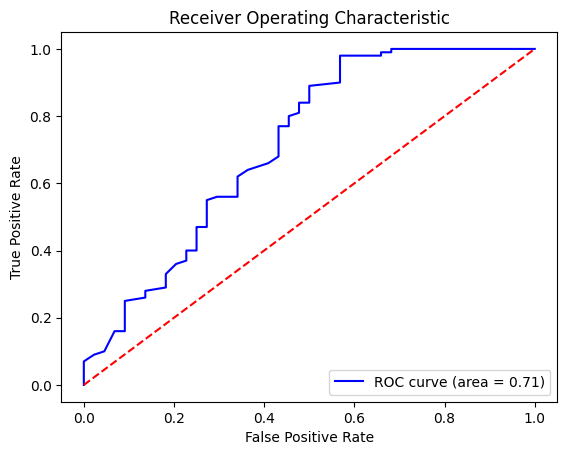

Optimal threshold based on Youden Index: 0.42
Accuracy with optimal threshold: 0.8125
Classification report with optimal threshold:
              precision    recall  f1-score   support

           0       0.90      0.43      0.58        44
           1       0.80      0.98      0.88       100

    accuracy                           0.81       144
   macro avg       0.85      0.71      0.73       144
weighted avg       0.83      0.81      0.79       144



In [ ]:
# Train the Random Forest model(14 VAR)

from sklearn.metrics import roc_curve, auc, accuracy_score, classification_report
model = RandomForestClassifier()
model.fit(X_train, y_train)




# Train the Random Forest model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Get predicted probabilities for the positive class
y_prob = model.predict_proba(X_test)[:, 1]

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calculate AUC
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

# Determine the optimal threshold using Youden's J statistic
youden_index = tpr - fpr
optimal_idx = np.argmax(youden_index)
optimal_threshold = thresholds[optimal_idx]

print(f'Optimal threshold based on Youden Index: {optimal_threshold}')

# Make predictions based on the optimal threshold
y_pred_optimal = (y_prob >= optimal_threshold).astype(int)

# Evaluate the model with the optimal threshold
acc = accuracy_score(y_test, y_pred_optimal)
report = classification_report(y_test, y_pred_optimal)

print(f'Accuracy with optimal threshold: {acc}')
print('Classification report with optimal threshold:')
print(report)


####**Decreasing Thresold = 0.7**

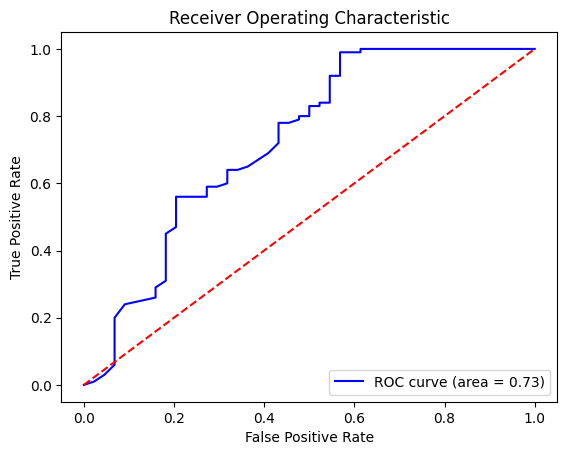

Optimal threshold based on Youden Index: 0.395
--- Results with Default Threshold (0.3) ---
Accuracy: 0.7083333333333334
Classification Report:
              precision    recall  f1-score   support

           0       0.52      0.55      0.53        44
           1       0.80      0.78      0.79       100

    accuracy                           0.71       144
   macro avg       0.66      0.66      0.66       144
weighted avg       0.71      0.71      0.71       144

--- Results with Optimal Threshold ---
Accuracy: 0.8194444444444444
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.43      0.59        44
           1       0.80      0.99      0.88       100

    accuracy                           0.82       144
   macro avg       0.87      0.71      0.74       144
weighted avg       0.84      0.82      0.80       144



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Assume 'dat' is your DataFrame containing all the features and target variable
# For example:
# dat = pd.read_csv('your_data.csv')
# Adjust according to your actual data



# Train the Random Forest model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Get predicted probabilities for the positive class
y_prob = model.predict_proba(X_test)[:, 1]

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calculate AUC
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

# Determine the optimal threshold using Youden's J statistic
youden_index = tpr - fpr
optimal_idx = np.argmax(youden_index)
optimal_threshold = thresholds[optimal_idx]

print(f'Optimal threshold based on Youden Index: {optimal_threshold}')

# Make predictions based on the default threshold (0.5)
y_pred_default = (y_prob >= 0.7).astype(int)

# Make predictions based on the optimal threshold
y_pred_optimal = (y_prob >= optimal_threshold).astype(int)

# Evaluate the model with the default threshold
acc_default = accuracy_score(y_test, y_pred_default)
report_default = classification_report(y_test, y_pred_default)

# Evaluate the model with the optimal threshold
acc_optimal = accuracy_score(y_test, y_pred_optimal)
report_optimal = classification_report(y_test, y_pred_optimal)

# Print the results
print('--- Results with Default Threshold (0.3) ---')
print(f'Accuracy: {acc_default}')
print('Classification Report:')
print(report_default)

print('--- Results with Optimal Threshold ---')
print(f'Accuracy: {acc_optimal}')
print('Classification Report:')
print(report_optimal)


#### **Conclusion:**
1. Roc thresold change not working in increasing recall and balancing fp and fn or reducing false positive

#### **Method3: Hypertuning Methods**



####**Hypertuning Methods:**
Hyperparameter tuning is crucial for optimizing the performance of classification models. Here are some important hyperparameters for various popular classifiers:



* **Logistic Regression**
1. C: Inverse of regularization strength; smaller values specify stronger regularization.
2. penalty: Type of regularization ('l1', 'l2', or 'elasticnet').
3. solver: Algorithm to use for optimization ('liblinear', 'saga', etc.).


*  ** Decision Tree Classifier**
1. max_depth: Maximum depth of the tree; controls overfitting.
min_samples_split: Minimum number of samples required to split an internal node.
2. min_samples_leaf: Minimum number of samples required to be at a leaf node.
3. max_features: Number of features to consider when looking for the best split.
*   R**andom Forest Classifier**
1. n_estimators: Number of trees in the forest; more trees can improve performance but also increase computation time.
2. max_depth: Maximum depth of each tree.
3. min_samples_split: Minimum number of samples required to split an internal node.
4. min_samples_leaf: Minimum number of samples required to be at a leaf node.
5. max_features: Number of features to consider when looking for the best split.

*   **Support Vector Machine (SVM)**
1. C: Regularization parameter; smaller values encourage a larger margin (more regularization).
2. kernel: Type of kernel function to be used ('linear', 'rbf', etc.).
3. gamma: Kernel coefficient for 'rbf', 'poly', and 'sigmoid' kernels; controls the influence of a single training example.
*   List item


* **K-Nearest Neighbors (KNN)**
1. n_neighbors: Number of neighbors to use; affects model complexity.
2. weights: Function used in prediction ('uniform' or 'distance').

**Tuning Methods**
Grid Search: Exhaustively search through specified hyperparameter values.






In [ ]:
import pandas as pd

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
import pickle

# Assuming X and y are your features and target variable respectively
# X = features
# y = target
random_state = 25

# Define the classification models
models = {
    "Logistic Regression": LogisticRegression(max_iter=200),
    "Random Forest": RandomForestClassifier(random_state=random_state),
    "Decision Tree": DecisionTreeClassifier(random_state=random_state),
    "Gradient Boosting": GradientBoostingClassifier(random_state=random_state)
}

# Define hyperparameters for each model
params = {
    "Logistic Regression": {
        'C': [0.01, 0.1, 1, 10, 100],
        'penalty': ['l2']
    },
    "Random Forest": {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20, 30]
    },
    "Decision Tree": {
        'max_depth': [None, 5, 10, 20],
        'min_samples_split': [2, 5, 10]
    },
    "Gradient Boosting": {
        'n_estimators': [50, 100],
        'learning_rate': [0.01, 0.1],
        'max_depth': [3, 5, 7]
    }
}

def evaluate_models(X_train, y_train, X_test, y_test, models, params):
    model_report = []

    for model_name, model in models.items():
        model_params = params[model_name]

        # Perform GridSearchCV
        grid_search = GridSearchCV(model, model_params, cv=5, scoring='accuracy', n_jobs=-1)
        grid_search.fit(X_train, y_train)

        best_model = grid_search.best_estimator_
        y_pred = best_model.predict(X_test)

        # Calculate accuracy score
        acc = accuracy_score(y_test, y_pred)

        # Generate classification report as a dictionary
        report_dict = classification_report(y_test, y_pred, output_dict=True)

        # Store results in the report
        model_report.append({
            'Model': model_name,
            'Best Params': grid_search.best_params_,
            'Accuracy': acc,
            'Precision': report_dict['weighted avg']['precision'],
            'Recall': report_dict['weighted avg']['recall'],
            'F1-Score': report_dict['weighted avg']['f1-score'],
            'Support': report_dict['weighted avg']['support'],
            'False Positives': sum((y_test == 0) & (y_pred == 1)),
            'False Negatives': sum((y_test == 1) & (y_pred == 0))
        })

        # Save the best model to disk as a pickle file
        with open(f'{model_name.replace(" ", "_")}.pkl', 'wb') as file:
            pickle.dump(best_model, file)

    # Convert report to DataFrame
    report_df = pd.DataFrame(model_report)

    return report_df

# Evaluate the models
hypertuned_model_report_df = evaluate_models(X_train, y_train, X_test, y_test, models, params)

# Print the DataFrame
print("Model Report:")
print(hypertuned_model_report_df)

# Save the report to a CSV file
hypertuned_model_report_df.to_csv('classification_report_HYPERTUNED14_var.csv', index=False)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model Report:
                 Model                                        Best Params  \
0  Logistic Regression                          {'C': 1, 'penalty': 'l2'}   
1        Random Forest             {'max_depth': 10, 'n_estimators': 100}   
2        Decision Tree           {'max_depth': 5, 'min_samples_split': 2}   
3    Gradient Boosting  {'learning_rate': 0.1, 'max_depth': 3, 'n_esti...   

   Accuracy  Precision    Recall  F1-Score  Support  False Positives  \
0  0.805556   0.848090  0.805556  0.772125    144.0               28   
1  0.791667   0.823568  0.791667  0.755848    144.0               29   
2  0.777778   0.812576  0.777778  0.734799    144.0               31   
3  0.770833   0.792377  0.770833  0.729023    144.0               31   

   False Negatives  
0                0  
1                1  
2                1  
3                2  


#### **Conclusion on hypertuned model:**

1. We see that effect of imbalanced data effect is not getting reduced so far by using diff methods.

#### **Methods4:Adding class weights in Rf(14 var):**

In [ ]:

# Define your models
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(class_weight={0: 1, 1: 100}),
    #"SVM": SVC(class_weight={0: 1, 1: 100}, random_state=random_state, probability=True),
    #"Gradient Boosting": GradientBoostingClassifier(random_state=random_state),
    #"KNN": KNeighborsClassifier()
}

def evaluate_models(X_train, y_train, X_test, y_test, models):
    report = []
    best_model = None
    best_score = 0  # Initialize to track the best score

    for model_name, model in models.items():
        # Fit the model
        model.fit(X_train, y_train)

        # Save the model to disk as a pickle file
        with open(f'{model_name.replace(" ", "_")}.pkl', 'wb') as file:
            pickle.dump(model, file)

        # Make predictions
        y_test_pred = model.predict(X_test)

        # Calculate accuracy score
        acc = accuracy_score(y_test, y_test_pred)

        # Generate classification report as a dictionary
        report_dict = classification_report(y_test, y_test_pred, output_dict=True)

        # Store results in the report
        report.append({
            'Model': model_name,
            'Accuracy': acc,
            'Precision': report_dict['weighted avg']['precision'],
            'Recall': report_dict['weighted avg']['recall'],
            'F1-Score': report_dict['weighted avg']['f1-score'],
            'Support': report_dict['weighted avg']['support'],
            'False Positives': sum((y_test == 0) & (y_test_pred == 1)),
            'False Negatives': sum((y_test == 1) & (y_test_pred == 0))
        })

        # Check if this model is the best
        if acc > best_score:
            best_score = acc
            best_model = model

    # Convert report to DataFrame
    report_df = pd.DataFrame(report)

    return report_df, best_model

# Evaluate the models
model_report_df, best_model = evaluate_models(X_train, y_train, X_test, y_test, models)

# Print the results
print("Model Report:")
print(model_report_df)

print("\nBest Model:")
print(best_model)

Model Report:
                 Model  Accuracy  Precision    Recall  F1-Score  Support  \
0  Logistic Regression  0.833333   0.844086  0.833333  0.812865    144.0   
1        Random Forest  0.763889   0.757202  0.763889  0.759903    144.0   

   False Positives  False Negatives  
0               22                2  
1               19               15  

Best Model:
LogisticRegression()


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#### NEW MODEL WITH ROBUST LOG

In [ ]:

# Define your models
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(class_weight={0: 1, 1: 100}),
    #"SVM": SVC(class_weight={0: 1, 1: 100}, random_state=random_state, probability=True),
    #"Gradient Boosting": GradientBoostingClassifier(random_state=random_state),
    #"KNN": KNeighborsClassifier()
}

def evaluate_models(X_train, y_train, X_test, y_test, models):
    report = []
    best_model = None
    best_score = 0  # Initialize to track the best score

    for model_name, model in models.items():
        # Fit the model
        model.fit(X_train, y_train)

        # Save the model to disk as a pickle file
        with open(f'{model_name.replace(" ", "_")}.pkl', 'wb') as file:
            pickle.dump(model, file)

        # Make predictions
        y_test_pred = model.predict(X_test)

        # Calculate accuracy score
        acc = accuracy_score(y_test, y_test_pred)

        # Generate classification report as a dictionary
        report_dict = classification_report(y_test, y_test_pred, output_dict=True)

        # Store results in the report
        report.append({
            'Model': model_name,
            'Accuracy': acc,
            'Precision': report_dict['weighted avg']['precision'],
            'Recall': report_dict['weighted avg']['recall'],
            'F1-Score': report_dict['weighted avg']['f1-score'],
            'Support': report_dict['weighted avg']['support'],
            'False Positives': sum((y_test == 0) & (y_test_pred == 1)),
            'False Negatives': sum((y_test == 1) & (y_test_pred == 0))
        })

        # Check if this model is the best
        if acc > best_score:
            best_score = acc
            best_model = model

    # Convert report to DataFrame
    report_df = pd.DataFrame(report)

    return report_df, best_model

# Evaluate the models
model_report_df, best_model = evaluate_models(X_train_new, y_train_new, X_test_new, y_test_new, models)

# Print the results
print("Model Report:")
print(model_report_df)

print("\nBest Model:")
print(best_model)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model Report:
                 Model  Accuracy  Precision    Recall  F1-Score  Support  \
0  Logistic Regression  0.783784   0.817765  0.783784  0.756482    185.0   
1        Random Forest  0.751351   0.744931  0.751351  0.740044    185.0   

   False Positives  False Negatives  
0               38                2  
1               32               14  

Best Model:
LogisticRegression()


#### **Conclusion on adding class weights in rf**



*   Class weights helped in reducing false paositive from 28 to 19 and due to which fn is 15 with accuracy of 76 in rf.

*   We see logistic regression gave good accuracy of 83 but fp is 22.



####**Method5: Feature Selection using RF feature importance**

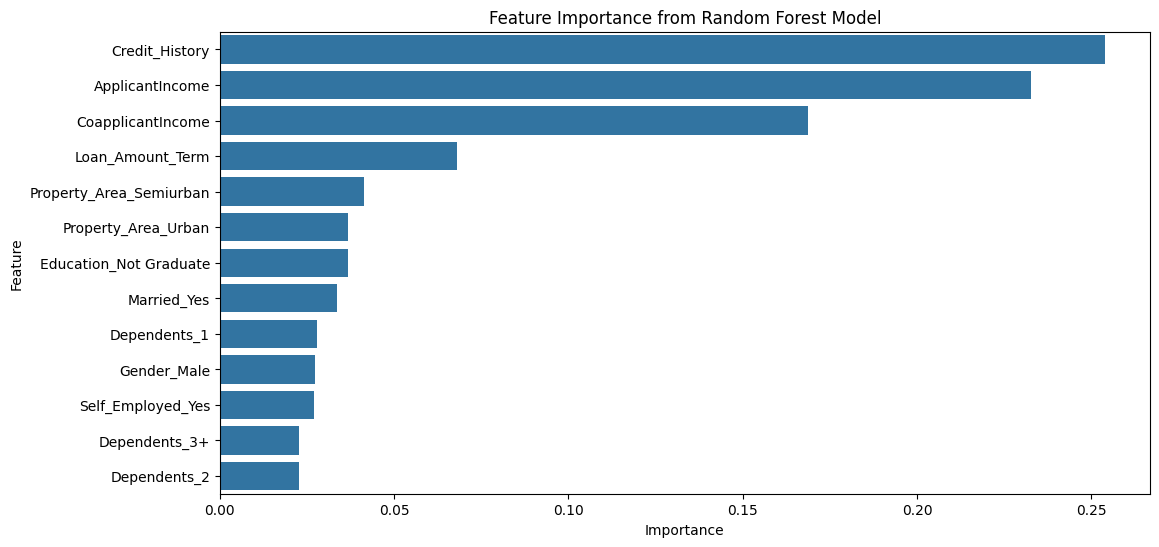

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier

# Assume you have your data loaded into trainX and trainY
# Fit the Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Get feature importances
importances = rf_model.feature_importances_

# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importances
})

# Sort the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance from Random Forest Model')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

#### **Conclusion on Feature Selection**







*  Top 4 features will be condidered for model training instead of 14 variables taken earlier.


*  Will create new features and target from new datframe containg just these 4 variables.


*   Will conduct train test splitt


*   Model training


#### **Creating new features and df with 4 variables.**

In [ ]:
# List of top 4 important features
top_features = [
    'Credit_History',
    'ApplicantIncome',
    'CoapplicantIncome',
    'Loan_Amount_Term'
]

# Creating a new DataFrame using transformed "dat" data frame with only the top 4 features
feature_new = dat[top_features]

# Display the new DataFrame
feature_new

### target df

target = dat[["Loan_Status_Y"]]
target_change = target.values.flatten()
target_change

feature_new.shape, target_change.shape

##### Train test splitt

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(feature_new, target_change, train_size=0.7)

In [ ]:
# List of top 4 important features
top_features = [
    'Credit_History',
    'ApplicantIncome',
    'CoapplicantIncome',
    'Loan_Amount_Term'
]

# Creating a new DataFrame using transformed "dat" data frame with only the top 4 features
feature_new = dat[top_features]

# Display the new DataFrame
feature_new

### target df

target = dat[["Loan_Status_Y"]]
target_change = target.values.flatten()
target_change

feature_new.shape, target_change.shape

##### Train test splitt

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(feature_new, target_change, train_size=0.7)

In [ ]:
X_train, X_test, y_train, y_test

(     Credit_History  ApplicantIncome  CoapplicantIncome  Loan_Amount_Term
 612             1.0             4682                0.0             360.0
 122             0.0             2137             8980.0             360.0
 352             1.0             2666             2083.0             360.0
 559             1.0             4180             2306.0             360.0
 74              1.0             4682             1774.0             360.0
 ..              ...              ...                ...               ...
 521             1.0             2500                0.0             360.0
 483             1.0             4682                0.0             360.0
 394             1.0             3100             1400.0             360.0
 356             1.0             4682             3167.0             360.0
 369             1.0             4682             5266.0             360.0
 
 [336 rows x 4 columns],
      Credit_History  ApplicantIncome  CoapplicantIncome  Loan_Amount_Ter

#### **Model with class weight **

In [ ]:

# Define your models
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(class_weight={0: 1, 1: 100}),
    #"SVM": SVC(class_weight={0: 1, 1: 100}, random_state=random_state, probability=True),
    #"Gradient Boosting": GradientBoostingClassifier(random_state=random_state),
    #"KNN": KNeighborsClassifier()
}

def evaluate_models(X_train, y_train, X_test, y_test, models):
    report = []
    best_model = None
    best_score = 0  # Initialize to track the best score

    for model_name, model in models.items():
        # Fit the model
        model.fit(X_train, y_train)

        # Save the model to disk as a pickle file
        with open(f'{model_name.replace(" ", "_")}.pkl', 'wb') as file:
            pickle.dump(model, file)

        # Make predictions
        y_test_pred = model.predict(X_test)

        # Calculate accuracy score
        acc = accuracy_score(y_test, y_test_pred)

        # Generate classification report as a dictionary
        report_dict = classification_report(y_test, y_test_pred, output_dict=True)

        # Store results in the report
        report.append({
            'Model': model_name,
            'Accuracy': acc,
            'Precision': report_dict['weighted avg']['precision'],
            'Recall': report_dict['weighted avg']['recall'],
            'F1-Score': report_dict['weighted avg']['f1-score'],
            'Support': report_dict['weighted avg']['support'],
            'False Positives': sum((y_test == 0) & (y_test_pred == 1)),
            'False Negatives': sum((y_test == 1) & (y_test_pred == 0))
        })

        # Check if this model is the best
        if acc > best_score:
            best_score = acc
            best_model = model

    # Convert report to DataFrame
    report_df = pd.DataFrame(report)

    return report_df, best_model

# Evaluate the models
model_report_df, best_model = evaluate_models(X_train, y_train, X_test, y_test, models)

# Print the results
print("Model Report:")
print(model_report_df)

print("\nBest Model:")
print(best_model)

Model Report:
                 Model  Accuracy  Precision    Recall  F1-Score  Support  \
0  Logistic Regression  0.833333   0.855731  0.833333  0.814706    144.0   
1        Random Forest  0.812500   0.809611  0.812500  0.810666    144.0   

   False Positives  False Negatives  
0               23                1  
1               15               12  

Best Model:
LogisticRegression()


In [ ]:

# Define your models
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(class_weight={0: 1, 1: 100}),
    #"SVM": SVC(class_weight={0: 1, 1: 100}, random_state=random_state, probability=True),
    #"Gradient Boosting": GradientBoostingClassifier(random_state=random_state),
    #"KNN": KNeighborsClassifier()
}

def evaluate_models(X_train, y_train, X_test, y_test, models):
    report = []
    best_model = None
    best_score = 0  # Initialize to track the best score

    for model_name, model in models.items():
        # Fit the model
        model.fit(X_train, y_train)

        # Save the model to disk as a pickle file
        with open(f'{model_name.replace(" ", "_")}.pkl', 'wb') as file:
            pickle.dump(model, file)

        # Make predictions
        y_test_pred = model.predict(X_test)

        # Calculate accuracy score
        acc = accuracy_score(y_test, y_test_pred)

        # Generate classification report as a dictionary
        report_dict = classification_report(y_test, y_test_pred, output_dict=True)

        # Store results in the report
        report.append({
            'Model': model_name,
            'Accuracy': acc,
            'Precision': report_dict['weighted avg']['precision'],
            'Recall': report_dict['weighted avg']['recall'],
            'F1-Score': report_dict['weighted avg']['f1-score'],
            'Support': report_dict['weighted avg']['support'],
            'False Positives': sum((y_test == 0) & (y_test_pred == 1)),
            'False Negatives': sum((y_test == 1) & (y_test_pred == 0))
        })

        # Check if this model is the best
        if acc > best_score:
            best_score = acc
            best_model = model

    # Convert report to DataFrame
    report_df = pd.DataFrame(report)

    return report_df, best_model

# Evaluate the models
model_report_df, best_model = evaluate_models(X_train_new, y_train_new, X_test_new, y_test_new, models)

# Print the results
print("Model Report:")
print(model_report_df)

print("\nBest Model:")
print(best_model)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model Report:
                 Model  Accuracy  Precision    Recall  F1-Score  Support  \
0  Logistic Regression  0.783784   0.817765  0.783784  0.756482    185.0   
1        Random Forest  0.729730   0.721710  0.729730  0.722422    185.0   

   False Positives  False Negatives  
0               38                2  
1               31               19  

Best Model:
LogisticRegression()


#### **Conclusion on new model with 4 var and class weights**

* As we see, random forest with class weight gretaly reduced false positive
(28 to 15), incresing recall to 83% from 43.

###########################**END**#####################################

### **trying with logged and robust scaled data**

In [ ]:
# Assuming CoapplicantIncome was log-transformed previously
data_check = X_train_new.copy()
data_check['CoapplicantIncome_Log'] = np.log(data_check['CoapplicantIncome'])
#X_test['CoapplicantIncome_Log'] = np.log(X_test['CoapplicantIncome'])
data_check['CoapplicantIncome_Log'].describe()

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4655: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


,CoapplicantIncome_Log
count,429.000000
mean,-inf
std,NaN
min,-inf
25%,NaN
50%,6.947937
75%,7.753624
max,10.429310


### #**log transformatin doesnot work here and mean ia not at 0 rather its at high value. log generally for positive value, and right skewed when median < mean**

In [ ]:
# original co applicant distribution
X_train_new["CoapplicantIncome"].describe()

,CoapplicantIncome
count,429.000000
mean,1591.013520
std,2665.828587
min,0.000000
25%,0.000000
50%,1041.000000
75%,2330.000000
max,33837.000000


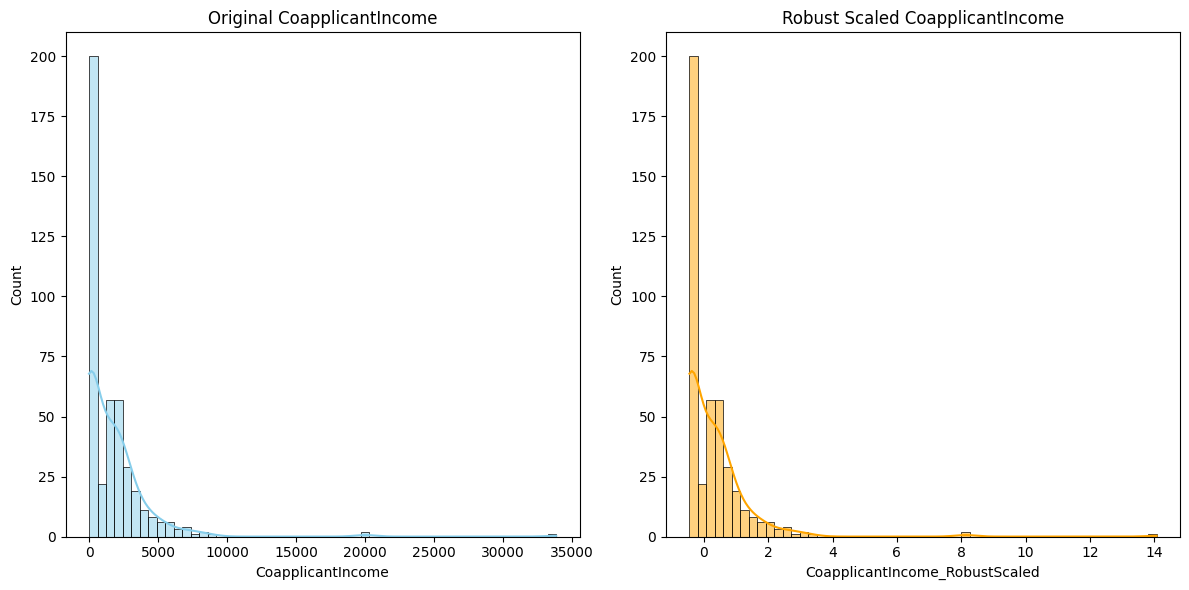

       CoapplicantIncome  CoapplicantIncome_RobustScaled
count         429.000000                      429.000000
mean         1591.013520                        0.236057
std          2665.828587                        1.144132
min             0.000000                       -0.446781
25%             0.000000                       -0.446781
50%          1041.000000                        0.000000
75%          2330.000000                        0.553219
max         33837.000000                       14.075536


In [ ]:
from sklearn.preprocessing import RobustScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize the RobustScaler
robust_scaler = RobustScaler()

# Fit and transform the CoapplicantIncome column
X_train_new['CoapplicantIncome_RobustScaled'] = robust_scaler.fit_transform(X_train_new[['CoapplicantIncome']])

# Visualize the original and robust scaled data side by side
plt.figure(figsize=(12, 6))

# Original data
plt.subplot(121)
sns.histplot(X_train_new['CoapplicantIncome'], kde=True, color='skyblue')
plt.title('Original CoapplicantIncome')

# Robust scaled data
plt.subplot(122)
sns.histplot(X_train_new['CoapplicantIncome_RobustScaled'], kde=True, color='orange')
plt.title('Robust Scaled CoapplicantIncome')

plt.tight_layout()
plt.show()

# Display the statistics to compare
print(X_train_new[['CoapplicantIncome', 'CoapplicantIncome_RobustScaled']].describe())


In [ ]:
# Filter the negative values from the transformed data
negative_values = X_train_new[X_train_new['CoapplicantIncome_RobustScaled'] < 0]['CoapplicantIncome_RobustScaled']

# Get descriptive statistics for the negative values
negative_values


,CoapplicantIncome_RobustScaled
529,-0.446781
54,-0.446781
46,-0.446781
93,-0.446781
613,-0.446781
...,...
121,-0.446781
20,-0.446781
270,-0.446781
435,-0.446781


#### **For co applicant, most of the co applicant has income = 0 as bar highest there. after robust scaling it shifted to negative and now most lies in that range or same value. but we will leave at is as classification prob can work on it.**

In [ ]:
# Dropping the original 'CoapplicantIncome' column
X_train_new = X_train_new.drop(columns=['CoapplicantIncome'])

# If you also have the column in the test set, drop it there as well:
#X_test_new = X_test_new.drop(columns=['CoapplicantIncome'])


In [ ]:
X_train_new.columns

Index(['Loan_Amount_Term', 'Credit_History',
       'ApplicantIncome_Log_RobustScaled', 'Gender_Male', 'Married_Yes',
       'Dependents_1', 'Dependents_2', 'Dependents_3',
       'Education_Not Graduate', 'Self_Employed_Yes',
       'Property_Area_Semiurban', 'Property_Area_Urban',
       'CoapplicantIncome_RobustScaled'],
      dtype='object')

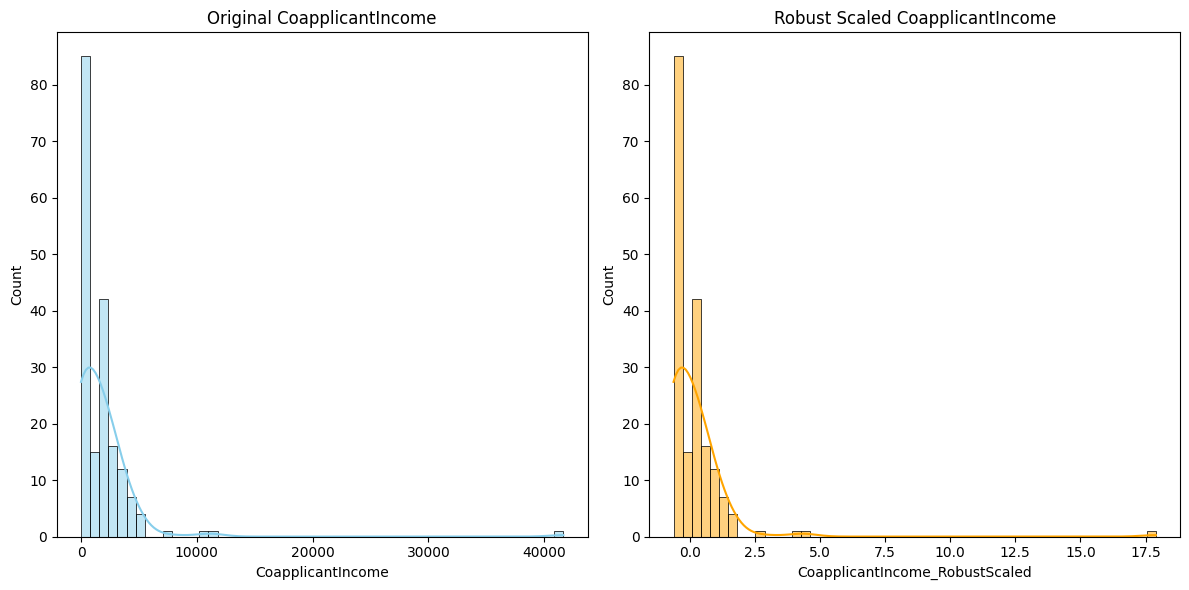

       CoapplicantIncome  CoapplicantIncome_RobustScaled
count         185.000000                      185.000000
mean         1691.352000                        0.130379
std          3462.635683                        1.538949
min             0.000000                       -0.621333
25%             0.000000                       -0.621333
50%          1398.000000                        0.000000
75%          2250.000000                        0.378667
max         41667.000000                       17.897333


In [ ]:
from sklearn.preprocessing import RobustScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize the RobustScaler
robust_scaler = RobustScaler()

# Fit and transform the CoapplicantIncome column
X_test_new['CoapplicantIncome_RobustScaled'] = robust_scaler.fit_transform(X_test_new[['CoapplicantIncome']])

# Visualize the original and robust scaled data side by side
plt.figure(figsize=(12, 6))

# Original data
plt.subplot(121)
sns.histplot(X_test_new['CoapplicantIncome'], kde=True, color='skyblue')
plt.title('Original CoapplicantIncome')

# Robust scaled data
plt.subplot(122)
sns.histplot(X_test_new['CoapplicantIncome_RobustScaled'], kde=True, color='orange')
plt.title('Robust Scaled CoapplicantIncome')

plt.tight_layout()
plt.show()

# Display the statistics to compare
print(X_test_new[['CoapplicantIncome', 'CoapplicantIncome_RobustScaled']].describe())


#### **lets take 4 imp var **

In [ ]:
# List of top 4 important features
top_features = [
    'Credit_History',
    'ApplicantIncome_Log_RobustScaled',
    'Loan_Amount_Term',
    "CoapplicantIncome_RobustScaled"
]



# Subset X_train and X_test to keep only the important features
X_train_imp = X_train_new[top_features]
X_test_imp = X_test_new[top_features]


In [ ]:
X_train_imp

,Credit_History,ApplicantIncome_Log_RobustScaled,Loan_Amount_Term,CoapplicantIncome_RobustScaled
553,0.0,-0.613410,360.0,0.554506
601,1.0,-0.389820,360.0,0.751502
261,1.0,-0.850668,360.0,0.501288
496,1.0,-0.535060,360.0,0.282833
529,1.0,0.765145,360.0,-0.446781
...,...,...,...,...
71,1.0,-0.978223,360.0,0.357940
106,1.0,1.471246,360.0,0.036481
270,1.0,-0.237959,360.0,-0.446781
435,1.0,1.297892,240.0,-0.446781


In [ ]:
y_train

,Loan_Status
553,N
601,Y
261,Y
496,Y
529,Y
...,...
71,Y
106,Y
270,Y
435,Y


In [ ]:
X_test_imp

,Credit_History,ApplicantIncome_Log_RobustScaled,Loan_Amount_Term,CoapplicantIncome_RobustScaled
350,1.0,1.161101,360.0,-0.621333
377,1.0,0.150222,360.0,-0.621333
163,1.0,0.104470,360.0,0.021778
609,1.0,-0.387012,360.0,-0.621333
132,1.0,-0.474886,360.0,-0.621333
...,...,...,...,...
380,1.0,-0.198333,360.0,0.489778
446,1.0,0.253761,360.0,-0.621333
144,1.0,1.511042,180.0,-0.621333
290,1.0,-0.307570,360.0,0.452444


In [ ]:
y_test

,Loan_Status
350,Y
377,Y
163,Y
609,Y
132,Y
...,...
380,Y
446,Y
144,Y
290,Y


In [ ]:
# Define your models
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(class_weight={0: 1, 1: 100}),
    #"SVM": SVC(class_weight={0: 1, 1: 100}, random_state=random_state, probability=True),
    #"Gradient Boosting": GradientBoostingClassifier(random_state=random_state),
    #"KNN": KNeighborsClassifier()
}

def evaluate_models(X_train, y_train, X_test, y_test, models):
    report = []
    best_model = None
    best_score = 0  # Initialize to track the best score

    for model_name, model in models.items():
        # Fit the model
        model.fit(X_train, y_train)

        # Save the model to disk as a pickle file
        with open(f'{model_name.replace(" ", "_")}.pkl', 'wb') as file:
            pickle.dump(model, file)

        # Make predictions
        y_test_pred = model.predict(X_test)

        # Calculate accuracy score
        acc = accuracy_score(y_test, y_test_pred)

        # Generate classification report as a dictionary
        report_dict = classification_report(y_test, y_test_pred, output_dict=True)

        # Store results in the report
        report.append({
            'Model': model_name,
            'Accuracy': acc,
            'Precision': report_dict['weighted avg']['precision'],
            'Recall': report_dict['weighted avg']['recall'],
            'F1-Score': report_dict['weighted avg']['f1-score'],
            'Support': report_dict['weighted avg']['support'],
            'False Positives': sum((y_test == 0) & (y_test_pred == 1)),
            'False Negatives': sum((y_test == 1) & (y_test_pred == 0))
        })

        # Check if this model is the best
        if acc > best_score:
            best_score = acc
            best_model = model

    # Convert report to DataFrame
    report_df = pd.DataFrame(report)

    return report_df, best_model

# Evaluate the models
model_report_df, best_model = evaluate_models(X_train_imp, y_train_new, X_test_imp, y_test_new, models)

# Print the results
print("Model Report:")
print(model_report_df)

print("\nBest Model:")
print(best_model)

Model Report:
                 Model  Accuracy  Precision    Recall  F1-Score  Support  \
0  Logistic Regression  0.783784   0.817765  0.783784  0.756482    185.0   
1        Random Forest  0.751351   0.749969  0.751351  0.732422    185.0   

   False Positives  False Negatives  
0               38                2  
1               36               10  

Best Model:
LogisticRegression()


In [ ]:
X_train_resampled.columns

Index(['Loan_Amount_Term', 'Credit_History',
       'ApplicantIncome_Log_RobustScaled', 'Gender_Male', 'Married_Yes',
       'Dependents_1', 'Dependents_2', 'Dependents_3',
       'Education_Not Graduate', 'Self_Employed_Yes',
       'Property_Area_Semiurban', 'Property_Area_Urban',
       'CoapplicantIncome_RobustScaled'],
      dtype='object')

In [ ]:
y_train_resampled

array([0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1,

In [ ]:
#X_test_new.columns
X_test_new = X_test_new.drop(columns=['CoapplicantIncome'])

In [ ]:
X_test_new.columns

Index(['Loan_Amount_Term', 'Credit_History',
       'ApplicantIncome_Log_RobustScaled', 'Gender_Male', 'Married_Yes',
       'Dependents_1', 'Dependents_2', 'Dependents_3',
       'Education_Not Graduate', 'Self_Employed_Yes',
       'Property_Area_Semiurban', 'Property_Area_Urban',
       'CoapplicantIncome_RobustScaled'],
      dtype='object')

In [ ]:
LRclassifier = LogisticRegression(solver='saga', max_iter=500, random_state=0)
LRclassifier.fit(X_train_resampled, y_train_resampled)

y_pred = LRclassifier.predict(X_test_new)

print(classification_report(y_test_new, y_pred))
print(confusion_matrix(y_test_new, y_pred))

from sklearn.metrics import accuracy_score
LRAcc = accuracy_score(y_pred,y_test_new)
print('LR accuracy: {:.2f}%'.format(LRAcc*100))

              precision    recall  f1-score   support

           0       0.60      0.55      0.58        65
           1       0.77      0.80      0.78       120

    accuracy                           0.71       185
   macro avg       0.68      0.68      0.68       185
weighted avg       0.71      0.71      0.71       185

[[36 29]
 [24 96]]
LR accuracy: 71.35%


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

SVCclassifier = SVC(kernel='rbf', max_iter=500)
SVCclassifier.fit(X_train_resampled, y_train_resampled)

y_pred = SVCclassifier.predict(X_test_new)

print(classification_report(y_test_new, y_pred))
print(confusion_matrix(y_test_new, y_pred))

from sklearn.metrics import accuracy_score
SVCAcc = accuracy_score(y_pred,y_test_new)
print('SVC accuracy: {:.2f}%'.format(SVCAcc*100))

              precision    recall  f1-score   support

           0       0.29      0.03      0.06        65
           1       0.65      0.96      0.77       120

    accuracy                           0.63       185
   macro avg       0.47      0.49      0.41       185
weighted avg       0.52      0.63      0.52       185

[[  2  63]
 [  5 115]]
SVC accuracy: 63.24%


In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Assuming X_train_resampled and y_train_resampled are already available from SMOTE

# Initialize MinMaxScaler


X_train_resampled = MinMaxScaler().fit_transform(X_train_resampled)

In [ ]:
# Define your models
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(class_weight={0: 1, 1: 100}),
    "SVM": SVC(class_weight={0: 1, 1: 100}, probability=True),
    "Gradient Boosting": GradientBoostingClassifier(),
    "KNN": KNeighborsClassifier()
}

def evaluate_models(X_train, y_train, X_test, y_test, models):
    report = []
    best_model = None
    best_score = 0  # Initialize to track the best score

    for model_name, model in models.items():
        # Fit the model
        model.fit(X_train, y_train)

        # Save the model to disk as a pickle file
        with open(f'{model_name.replace(" ", "_")}.pkl', 'wb') as file:
            pickle.dump(model, file)

        # Make predictions
        y_test_pred = model.predict(X_test)

        # Calculate accuracy score
        acc = accuracy_score(y_test, y_test_pred)

        # Generate classification report as a dictionary
        report_dict = classification_report(y_test, y_test_pred, output_dict=True)

        # Store results in the report
        report.append({
            'Model': model_name,
            'Accuracy': acc,
            'Precision': report_dict['weighted avg']['precision'],
            'Recall': report_dict['weighted avg']['recall'],
            'F1-Score': report_dict['weighted avg']['f1-score'],
            'Support': report_dict['weighted avg']['support'],
            'False Positives': sum((y_test == 0) & (y_test_pred == 1)),
            'False Negatives': sum((y_test == 1) & (y_test_pred == 0))
        })

        # Check if this model is the best
        if acc > best_score:
            best_score = acc
            best_model = model

    # Convert report to DataFrame
    report_df = pd.DataFrame(report)

    return report_df, best_model

# Evaluate the models
model_report_df, best_model = evaluate_models(X_train_resampled, y_train_resampled, X_test_new, y_test_new, models)

# Print the results
print("Model Report:")
print(model_report_df)

print("\nBest Model:")
print(best_model)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_

Model Report:
                 Model  Accuracy  Precision    Recall  F1-Score  Support  \
0  Logistic Regression  0.648649   0.420745  0.648649  0.510412    185.0   
1        Random Forest  0.464865   0.654775  0.464865  0.423917    185.0   
2                  SVM  0.648649   0.420745  0.648649  0.510412    185.0   
3    Gradient Boosting  0.459459   0.568166  0.459459  0.450341    185.0   
4                  KNN  0.351351   0.123448  0.351351  0.182703    185.0   

   False Positives  False Negatives  
0               65                0  
1                7               92  
2               65                0  
3               18               82  
4                0              120  

Best Model:
LogisticRegression()


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but GradientBoostingClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/pytho

##### all things didnot work. so using smote ON ONLY TRAING DATA : X TRAIN , Y TRAIN

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier  # Or use any model of your choic
smote = SMOTE(sampling_strategy='auto', random_state=42)

# Step 2: Resample the training data
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_new, y_train_new)

In [ ]:
X_train_resampled, y_train_resampled

(     Loan_Amount_Term  Credit_History  ApplicantIncome_Log_RobustScaled  \
 0               360.0        0.000000                         -0.613410   
 1               360.0        1.000000                         -0.389820   
 2               360.0        1.000000                         -0.850668   
 3               360.0        1.000000                         -0.535060   
 4               360.0        1.000000                          0.765145   
 ..                ...             ...                               ...   
 599             360.0        0.000000                         -0.120552   
 600             180.0        0.428314                         -0.552839   
 601             360.0        1.000000                         -1.135116   
 602             360.0        0.941806                         -0.908191   
 603             180.0        1.000000                         -0.537284   
 
      Gender_Male  Married_Yes  Dependents_1  Dependents_2  Dependents_3  \
 0        

<ipython-input-130-ee126b2d9d4f>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_train_resampled, palette="coolwarm")


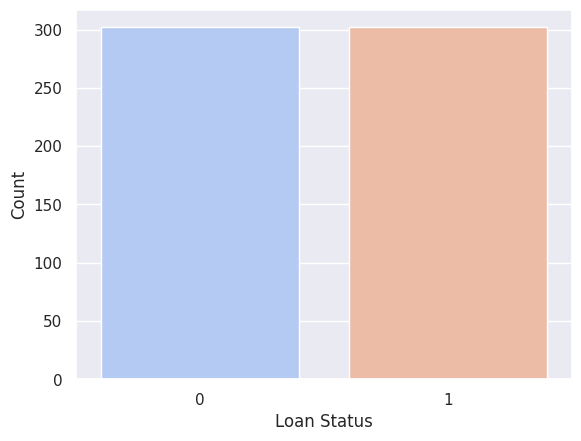

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the theme for better visualization
sns.set_theme(style="darkgrid")

# Plotting the count plot for y_train_resampled
sns.countplot(x=y_train_resampled, palette="coolwarm")

# Customize labels
plt.ylabel('Count')
plt.xlabel('Loan Status')

# Show the plot
plt.show()


In [ ]:
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression


# Define the classification models
models = {
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Logistic Regression": LogisticRegression()
}

# Define hyperparameters for each model
params = {
    "Logistic Regression": {
        'C': [0.001, 0.01, 0.1, 1, 10],  # Inverse of regularization strength
        'penalty': ['l2'],  # Type of regularization
        #'solver': ['liblinear', 'saga']  # Algorithms to use
    },
    "Decision Tree": {
        'max_depth': [None, 5, 10, 20],  # Maximum depth of the tree
        'min_samples_split': [2, 5, 10],  # Minimum samples required to split
        'min_samples_leaf': [1, 2, 4]  # Minimum samples required in a leaf node
    },
    "Random Forest": {
        'n_estimators': [10, 50, 100]  # Number of trees in the forest
    }
}

# Function to evaluate all models
def evaluate_models(X_train, y_train, X_test, y_test, models):
    model_report = []

    for model_name, model in models.items():
        model.fit(X_train, y_train)  # Fit the model
        y_pred = model.predict(X_test)  # Make predictions

        # Calculate accuracy score
        acc = accuracy_score(y_test, y_pred)

        # Generate classification report as a dictionary
        report = classification_report(y_test, y_pred, output_dict=True)

        # Extract relevant metrics and store them
        model_report.append({
            'Model': model_name,
            'Accuracy': acc,
            'Precision': report['weighted avg']['precision'],
            'Recall': report['weighted avg']['recall'],
            'F1-Score': report['weighted avg']['f1-score'],
            'Support': report['weighted avg']['support']
        })

    return pd.DataFrame(model_report)

# Evaluate the models
model_report_df = evaluate_models(X_train, y_train, X_test, y_test, models)

# Print the DataFrame
print(model_report_df)

# Optionally save the DataFrame to a CSV file
model_report_df.to_csv('classification_report.csv', index=False)

                 Model  Accuracy  Precision    Recall  F1-Score  Support
0        Random Forest  0.798611   0.803380  0.798611  0.776618    144.0
1        Decision Tree  0.708333   0.704715  0.708333  0.706386    144.0
2  Logistic Regression  0.805556   0.848090  0.805556  0.772125    144.0


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
model_report_df

,Model,Accuracy,Precision,Recall,F1-Score,Support
0,Random Forest,0.791667,0.791667,0.791667,0.770499,144.0
1,Decision Tree,0.701389,0.695878,0.701389,0.698326,144.0
2,Logistic Regression,0.805556,0.848090,0.805556,0.772125,144.0


In [ ]:
## AT RANDOM STATE = 42
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression


# Define the classification models
models = {
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Logistic Regression": LogisticRegression()
}

# Define hyperparameters for each model
params = {
    "Logistic Regression": {
        'C':  10.0 **np.arange(-2,3),  # Inverse of regularization strength
        'penalty': ['l2'],  # Type of regularization
        #'solver': ['liblinear', 'saga']  # Algorithms to use
    },
    "Decision Tree": {
        'max_depth': [None, 5, 10, 20],  # Maximum depth of the tree
        #'min_samples_split': [2, 5, 10],  # Minimum samples required to split
        #'min_samples_leaf': [1, 2, 4]  # Minimum samples required in a leaf node
    },
    "Random Forest": {
        'n_estimators': [100]  # Number of trees in the forest
    }
}

# Function to evaluate all models
def evaluate_models(X_train, y_train, X_test, y_test, models):
    model_report = []

    for model_name, model in models.items():
        model.fit(X_train, y_train)  # Fit the model
        y_pred = model.predict(X_test)  # Make predictions

        # Calculate accuracy score
        acc = accuracy_score(y_test, y_pred)

        # Generate classification report as a dictionary
        report = classification_report(y_test, y_pred, output_dict=True)

        # Extract relevant metrics and store them
        model_report.append({
            'Model': model_name,
            'Accuracy': acc,
            'Precision': report['weighted avg']['precision'],
            'Recall': report['weighted avg']['recall'],
            'F1-Score': report['weighted avg']['f1-score'],
            'Support': report['weighted avg']['support'],
            'False Positives': sum((y_test == 0) & (y_pred == 1)),
            'False Negatives': sum((y_test == 1) & (y_pred == 0))

        })



    return pd.DataFrame(model_report)

# Evaluate the models
model_report_df = evaluate_models(X_train, y_train, X_test, y_test, models)

# Print the DataFrame
print(model_report_df)

# Optionally save the DataFrame to a CSV file
model_report_df.to_csv('classification_report.csv', index=False)

                 Model  Accuracy  Precision    Recall  F1-Score  Support  \
0        Random Forest  0.791667   0.791667  0.791667  0.770499    144.0   
1        Decision Tree  0.715278   0.710073  0.715278  0.712357    144.0   
2  Logistic Regression  0.805556   0.848090  0.805556  0.772125    144.0   

   False Positives  False Negatives  
0               25                5  
1               22               19  
2               28                0  


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#### **Conclusion**
**By changing thresold = 0.5 by default in classiifctaion False positive value may decrease.**

**Why FP??**

False Positives (FP):
False Positives in this context occur when the model predicts a loan will be approved (1) when it actually should not be approved (0). This is critical because:
Impact: Approving loans that should not be granted can lead to financial losses and increased risk for the lending institution.


Methods that could work?

Recommendations for Prioritizing Recall for 0 (not approved):
Adjust Decision Threshold: To reduce false positives, consider adjusting the threshold for classifying an applicant as approved. Lowering the threshold can help minimize false positives but may also affect recall.

Cost-Sensitive Learning: Use techniques that penalize false positives more heavily during model training. This can help the model learn to avoid approving loans incorrectly.

Model Selection: Given the focus on reducing false positives, the Decision Tree appears to be the most favorable model based on your results, as it has the lowest number of false positives.

Feature Engineering: Investigate additional features that could help improve model accuracy and reduce false positives.

Ensemble Methods: Consider using ensemble methods that combine predictions from multiple models to improve overall performance and reduce error rates.


#### **Thresold change:**
**Using ROC Curve **

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Assuming your DataFrame is called 'dat' and the target variable is 'Loan_Status_Y'
# Replace 'dat' with your actual DataFrame and adjust feature selection accordingly

# Define your features and target
features = [
    'Credit_History',
    'ApplicantIncome',
    'CoapplicantIncome',
    'Loan_Amount_Term'
]

X = dat[features]  # Features
y = dat['Loan_Status_Y']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)

# Train the Random Forest model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Get predicted probabilities for the positive class
y_prob = model.predict_proba(X_test)[:, 1]

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calculate AUC
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

# Determine the optimal threshold using Youden's J statistic
youden_index = tpr - fpr
optimal_idx = np.argmax(youden_index)
optimal_threshold = thresholds[optimal_idx]

print(f'Optimal threshold based on Youden Index: {optimal_threshold}')

# Make predictions based on the optimal threshold
y_pred_optimal = (y_prob >= optimal_threshold).astype(int)

# Evaluate the model with the optimal threshold
acc = accuracy_score(y_test,


SyntaxError: incomplete input (<ipython-input-33-1bb47c3c4273>, line 59)

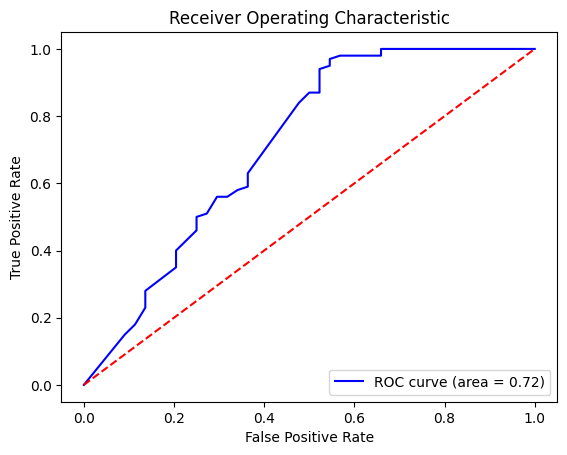

Optimal threshold based on Youden Index: 0.6
Accuracy with optimal threshold: 0.8125
Classification report with optimal threshold:
              precision    recall  f1-score   support

           0       0.87      0.45      0.60        44
           1       0.80      0.97      0.88       100

    accuracy                           0.81       144
   macro avg       0.84      0.71      0.74       144
weighted avg       0.82      0.81      0.79       144



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Load your data
# Assuming you have your features (dat) and target variable (Loan_Status_Y)
# Example:
# dat = pd.read_csv('your_data.csv')
# features = dat[top_features]  # Replace with your selected features
# target = dat['Loan_Status_Y']  # Replace with your target variable


features = [
    'Credit_History',
    'ApplicantIncome',
    'CoapplicantIncome',
    'Loan_Amount_Term'
]

X = dat[features]  # Features
y = dat['Loan_Status_Y']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)

# Train the Random Forest model
model = RandomForestClassifier()
model.fit(X_train, y_train)




# Train the Random Forest model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Get predicted probabilities for the positive class
y_prob = model.predict_proba(X_test)[:, 1]

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calculate AUC
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

# Determine the optimal threshold using Youden's J statistic
youden_index = tpr - fpr
optimal_idx = np.argmax(youden_index)
optimal_threshold = thresholds[optimal_idx]

print(f'Optimal threshold based on Youden Index: {optimal_threshold}')

# Make predictions based on the optimal threshold
y_pred_optimal = (y_prob >= optimal_threshold).astype(int)

# Evaluate the model with the optimal threshold
acc = accuracy_score(y_test, y_pred_optimal)
report = classification_report(y_test, y_pred_optimal)

print(f'Accuracy with optimal threshold: {acc}')
print('Classification report with optimal threshold:')
print(report)


#### **Model predict with thresold = 0.6**

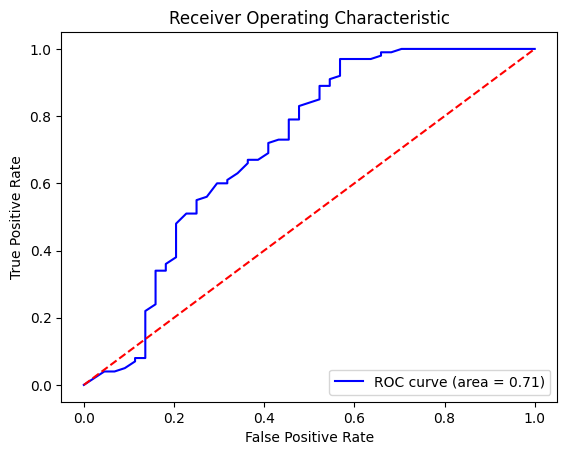

Optimal threshold based on Youden Index: 0.5171190476190477
--- Results with Default Threshold (0.5) ---
Accuracy: 0.8055555555555556
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.43      0.58        44
           1       0.80      0.97      0.87       100

    accuracy                           0.81       144
   macro avg       0.83      0.70      0.72       144
weighted avg       0.82      0.81      0.78       144

--- Results with Optimal Threshold ---
Accuracy: 0.8055555555555556
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.43      0.58        44
           1       0.80      0.97      0.87       100

    accuracy                           0.81       144
   macro avg       0.83      0.70      0.72       144
weighted avg       0.82      0.81      0.78       144



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Assume 'dat' is your DataFrame containing all the features and target variable
# For example:
# dat = pd.read_csv('your_data.csv')
# Adjust according to your actual data



# Train the Random Forest model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Get predicted probabilities for the positive class
y_prob = model.predict_proba(X_test)[:, 1]

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calculate AUC
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

# Determine the optimal threshold using Youden's J statistic
youden_index = tpr - fpr
optimal_idx = np.argmax(youden_index)
optimal_threshold = thresholds[optimal_idx]

print(f'Optimal threshold based on Youden Index: {optimal_threshold}')

# Make predictions based on the default threshold (0.5)
y_pred_default = (y_prob >= 0.5).astype(int)

# Make predictions based on the optimal threshold
y_pred_optimal = (y_prob >= optimal_threshold).astype(int)

# Evaluate the model with the default threshold
acc_default = accuracy_score(y_test, y_pred_default)
report_default = classification_report(y_test, y_pred_default)

# Evaluate the model with the optimal threshold
acc_optimal = accuracy_score(y_test, y_pred_optimal)
report_optimal = classification_report(y_test, y_pred_optimal)

# Print the results
print('--- Results with Default Threshold (0.5) ---')
print(f'Accuracy: {acc_default}')
print('Classification Report:')
print(report_default)

print('--- Results with Optimal Threshold ---')
print(f'Accuracy: {acc_optimal}')
print('Classification Report:')
print(report_optimal)


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Assuming you have your features (X) and target (y) defined
# For example:
# X = dat[top_features]  # your feature DataFrame
# y = dat["Loan_Status_Y"]  # your target variable



# Fit the Random Forest model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Get predicted probabilities
y_prob = model.predict_proba(X_test)[:, 1]  # Probability for the positive class (1)

# Set the threshold to 0.4
threshold = 0.4

# Classify using the threshold
y_pred_threshold = (y_prob >= threshold).astype(int)

# Calculate accuracy with the specified threshold
accuracy_threshold = accuracy_score(y_test, y_pred_threshold)

# Print classification report with the specified threshold
#report = classification_report(y_test, y_pred_threshold)
# print(f"Accuracy with threshold of {threshold}: {accuracy_threshold:.4f}")
# print("Classification report with threshold of 0.4:")
# print(report)
  # Generate classification report as a dictionary
report = classification_report(y_test, y_pred, output_dict=True)

        # Extract relevant metrics and store them
model_report.append({
            'Model': model_name,
            'Accuracy': acc,
            'Precision': report['weighted avg']['precision'],
            'Recall': report['weighted avg']['recall'],
            'F1-Score': report['weighted avg']['f1-score'],
            'Support': report['weighted avg']['support'],
            'False Positives': sum((y_test == 0) & (y_pred == 1)),
            'False Negatives': sum((y_test == 1) & (y_pred == 0))

        })
# # Plot ROC Curve for visualization
# fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# plt.figure()
# plt.plot(fpr, tpr, color='blue', lw=2, label='ROC Curve')
# plt.plot([0, 1], [0, 1], color='red', linestyle='--')
# plt.scatter(fpr[np.argmin(np.abs(thresholds - threshold))],
#             tpr[np.argmin(np.abs(thresholds - threshold))],
#             color='green', label='Threshold = 0.4', zorder=5)
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Receiver Operating Characteristic (ROC) Curve')
# plt.legend(loc='lower right')
# plt.show()


NameError: name 'y_pred' is not defined

In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Assuming X and y are defined
# X = your_features_dataframe
# y = your_target_series

# Train-test split


# Fit the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Get predicted probabilities for the positive class (1)
y_prob = model.predict_proba(X_test)[:, 1]

# Use a threshold of 0.4 to classify
threshold = 0.9
y_pred = (y_prob >= threshold).astype(int)

# Calculate metrics
acc = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, output_dict=True)

# False positives and false negatives
false_positives = sum((y_test == 0) & (y_pred == 1))
false_negatives = sum((y_test == 1) & (y_pred == 0))

# Print results
print(f"Accuracy with threshold {threshold}: {acc:.4f}")
print("Classification report with threshold 0.4:")
print(classification_report(y_test, y_pred))
print(f"False Positives: {false_positives}")
print(f"False Negatives: {false_negatives}")


Accuracy with threshold 0.9: 0.6042
Classification report with threshold 0.4:
              precision    recall  f1-score   support

           0       0.41      0.68      0.51        44
           1       0.80      0.57      0.67       100

    accuracy                           0.60       144
   macro avg       0.61      0.63      0.59       144
weighted avg       0.68      0.60      0.62       144

False Positives: 14
False Negatives: 43


pip install imbalanced-learn


In [ ]:
#pip install imbalanced-learn
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE

# Sample data generation (replace with your actual data)
# X = your_features
# y = your_target

# For demonstration, let's assume X and y are defined
# Train-test split


# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Fit the Random Forest model on the resampled data
model = RandomForestClassifier(random_state=42)
model.fit(X_resampled, y_resampled)

# Predict probabilities on the test set
y_scores = model.predict_proba(X_test)[:, 1]
threshold = 0.5
y_pred = (y_scores >= threshold).astype(int)

# Classification report and confusion matrix
report = classification_report(y_test, y_pred, target_names=["Not Approved", "Approved"], output_dict=True)
conf_matrix = confusion_matrix(y_test, y_pred)

# Extract metrics
precision_0 = report['Not Approved']['precision']
recall_0 = report['Not Approved']['recall']
f1_0 = report['Not Approved']['f1-score']
false_positives = conf_matrix[0, 1]
false_negatives = conf_matrix[1, 0]

# Print results
print(f"Classification Report for Threshold {threshold}:")
print(report)
print(f"False Positives: {false_positives}")
print(f"False Negatives: {false_negatives}")
#


Classification Report for Threshold 0.5:
{'Not Approved': {'precision': 0.8636363636363636, 'recall': 0.4318181818181818, 'f1-score': 0.5757575757575758, 'support': 44.0}, 'Approved': {'precision': 0.7950819672131147, 'recall': 0.97, 'f1-score': 0.8738738738738738, 'support': 100.0}, 'accuracy': 0.8055555555555556, 'macro avg': {'precision': 0.8293591654247392, 'recall': 0.7009090909090909, 'f1-score': 0.7248157248157248, 'support': 144.0}, 'weighted avg': {'precision': 0.8160291438979964, 'recall': 0.8055555555555556, 'f1-score': 0.7827827827827828, 'support': 144.0}}
False Positives: 25
False Negatives: 3


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

# Assuming X and y are your features and target
# X = your_features
# y = your_target

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)

# Use RandomUnderSampler and RandomOverSampler
under_sampler = RandomUnderSampler(random_state=42)
over_sampler = RandomOverSampler(random_state=42)

# First, under-sample the majority class
X_under, y_under = under_sampler.fit_resample(X_train, y_train)

# Then, over-sample the minority class on the under-sampled data
X_resampled, y_resampled = over_sampler.fit_resample(X_under, y_under)

# Train the Random Forest model on the resampled data
model = RandomForestClassifier(random_state=42)
model.fit(X_resampled, y_resampled)

# Directly predict on the test set without using probabilities
y_pred = model.predict(X_test)

# Classification report and confusion matrix
report = classification_report(y_test, y_pred, target_names=["Not Approved", "Approved"], output_dict=True)
conf_matrix = confusion_matrix(y_test, y_pred)

# Extract metrics
precision_0 = report['Not Approved']['precision']
recall_0 = report['Not Approved']['recall']
f1_0 = report['Not Approved']['f1-score']
false_positives = conf_matrix[0, 1]
false_negatives = conf_matrix[1, 0]

# Print results
print("Classification Report:")
print(report)
print(f"False Positives: {false_positives}")
print(f"False Negatives: {false_negatives}")


Classification Report:
{'Not Approved': {'precision': 0.71875, 'recall': 0.5227272727272727, 'f1-score': 0.6052631578947368, 'support': 44.0}, 'Approved': {'precision': 0.8125, 'recall': 0.91, 'f1-score': 0.8584905660377359, 'support': 100.0}, 'accuracy': 0.7916666666666666, 'macro avg': {'precision': 0.765625, 'recall': 0.7163636363636363, 'f1-score': 0.7318768619662364, 'support': 144.0}, 'weighted avg': {'precision': 0.7838541666666666, 'recall': 0.7916666666666666, 'f1-score': 0.7811155246607084, 'support': 144.0}}
False Positives: 21
False Negatives: 9


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import RandomOverSampler  # Using RandomOverSampler for oversampling

# Assume X and y are your features and target
# X = your_features
# y = your_target

# Split the data
#X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)

# Apply RandomOverSampler
over_sampler = RandomOverSampler(random_state=42)
X_resampled, y_resampled = over_sampler.fit_resample(X_train, y_train)

# Train the Random Forest model on the resampled data
model = RandomForestClassifier(random_state=42)
model.fit(X_resampled, y_resampled)

# Directly predict on the test set without using probabilities
y_pred = model.predict(X_test)

# Classification report and confusion matrix
report = classification_report(y_test, y_pred, target_names=["Not Approved", "Approved"], output_dict=True)
conf_matrix = confusion_matrix(y_test, y_pred)

# Extract metrics
precision_0 = report['Not Approved']['precision']
recall_0 = report['Not Approved']['recall']
f1_0 = report['Not Approved']['f1-score']
false_positives = conf_matrix[0, 1]
false_negatives = conf_matrix[1, 0]

# Print results
print("Classification Report:")
print(report)
print(f"False Positives: {false_positives}")
print(f"False Negatives: {false_negatives}")


Classification Report:
{'Not Approved': {'precision': 0.8636363636363636, 'recall': 0.4318181818181818, 'f1-score': 0.5757575757575758, 'support': 44.0}, 'Approved': {'precision': 0.7950819672131147, 'recall': 0.97, 'f1-score': 0.8738738738738738, 'support': 100.0}, 'accuracy': 0.8055555555555556, 'macro avg': {'precision': 0.8293591654247392, 'recall': 0.7009090909090909, 'f1-score': 0.7248157248157248, 'support': 144.0}, 'weighted avg': {'precision': 0.8160291438979964, 'recall': 0.8055555555555556, 'f1-score': 0.7827827827827828, 'support': 144.0}}
False Positives: 25
False Negatives: 3


#### **Evaluation Conclusion**

conclusion
0, 0 = 20(TN) , 1,1(TP)= 98, FP = 22(0 predicted as 1), FN = 4(1 predicted AS 0)

Class 0:

Precision (0.83):

Out of all instances predicted as class 0, 83% were actually class 0. This is a good precision score, indicating that when the model predicts class 0, it is mostly correct. Recall (0.48):

This means that out of all actual class 0 instances, only 48% were correctly identified by the model. This is relatively low, indicating that many instances of class 0 are being misclassified as class 1 (as indicated by the 22 false positives). F1-Score (0.61):

The F1-score combines precision and recall into a single metric, and in this case, it's moderately low, reflecting the trade-off between precision and recall.

2. Class 1: Precision (0.82):

For class 1, 82% of instances predicted as class 1 were correct. This is also a good score, indicating that the model is reliable when it predicts class 1. Recall (0.96):

The model correctly identifies 96% of the actual class 1 instances. This is an excellent recall score, indicating that the model is very effective at identifying class 1 instances, with only 4 false negatives. F1-Score (0.88):

This score is high, reflecting a good balance between precision and recall for class 1.

F1 SCORE OF 1 > F1 SCORE OF 0 , IT might be imbalance

#### **Conclusion:**

**Models(rf, dt, lr) with 14 variables:**

1.


In [ ]:
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV
import pandas as pd


# Define the classification models
models = {
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Logistic Regression": LogisticRegression()
}

# Define hyperparameters for each model
params = {
    "Logistic Regression": {
        'C': [0.001, 0.01, 0.1, 1, 10],  # Inverse of regularization strength
        'penalty': ['l1', 'l2', 'elasticnet'],  # Type of regularization
        'solver': ['liblinear', 'saga']  # Algorithms to use
    },
    "Decision Tree": {
        'max_depth': [None, 5, 10, 20],  # Maximum depth of the tree
        'min_samples_split': [2, 5, 10],  # Minimum samples required to split
        'min_samples_leaf': [1, 2, 4]  # Minimum samples required in a leaf node
    },
    "Random Forest": {
        'n_estimators': [10, 50, 100]  # Number of trees in the forest
    }
}


def evaluate_models(X_train, y_train, X_test, y_test, models, params):
    report = []
    best_model = None
    best_score = 0  # Initialize to track the best score

    for model_name, model in models.items():
        para = params.get(model_name, {})

        # Perform GridSearchCV to find the best parameters
        gs = GridSearchCV(model, para, cv=3, n_jobs=-1, scoring='accuracy')  # You can change scoring as needed
        gs.fit(X_train, y_train)

        # Set the best parameters found
        model.set_params(**gs.best_params_)
        model.fit(X_train, y_train)  # Train model with best parameters

        # Make predictions
        y_test_pred = model.predict(X_test)

        # Calculate accuracy score
        acc = accuracy_score(y_test, y_test_pred)

        # Generate classification report as a dictionary
        report_dict = classification_report(y_test, y_test_pred, output_dict=True)

        # Store results in the report
        report.append({
            'Model': model_name,
            'Best Parameters': gs.best_params_,
            'Accuracy': acc,
            'Precision': report_dict['weighted avg']['precision'],
            'Recall': report_dict['weighted avg']['recall'],
            'F1-Score': report_dict['weighted avg']['f1-score'],
            'Support': report_dict['weighted avg']['support'],
            'False Positives': sum((y_test == 0) & (y_test_pred == 1)),
            'False Negatives': sum((y_test == 1) & (y_test_pred == 0))
        })

        # Check if this model is the best
        if acc > best_score:
            best_score = acc
            best_model = model

    # Convert report to DataFrame
    report_df = pd.DataFrame(report)

    return report_df, best_model, gs.best_params_

# Call the function to evaluate models
model_report_df, best_model, best_params = evaluate_models(X_train, y_train, X_test, y_test, models, params)

# Print the DataFrame
print(model_report_df)

# Save the DataFrame to a CSV file with the specified name
model_report_df.to_csv('classification_report_14var.csv', index=False)


                 Model                                    Best Parameters  \
0        Random Forest                              {'n_estimators': 100}   
1        Decision Tree  {'max_depth': 5, 'min_samples_leaf': 1, 'min_s...   
2  Logistic Regression  {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}   

   Accuracy  Precision    Recall  F1-Score  Support  False Positives  \
0  0.798611   0.803380  0.798611  0.776618    144.0               25   
1  0.763889   0.800926  0.763889  0.712712    144.0               33   
2  0.805556   0.848090  0.805556  0.772125    144.0               28   

   False Negatives  
0                4  
1                1  
2                0  


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
30 fits failed out of a total of 90.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1194, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/us

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV






def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(2, 2))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Not Approved (0)', 'Approved (1)'],
                yticklabels=['Not Approved (0)', 'Approved (1)'])
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

def evaluate_models_14(X_train, y_train, X_test, y_test, models, params):
    report = []
    best_model = None
    best_score = 0  # Initialize to track the best score

    for model_name, model in models.items():
        para = params.get(model_name, {})

        # Perform GridSearchCV to find the best parameters
        gs = GridSearchCV(model, para, cv=3, n_jobs=-1, scoring='accuracy')
        gs = GridSearchCV(model, cv=3, n_jobs=-1, scoring='accuracy')
        gs.fit(X_train, y_train)

        # Set the best parameters found
        #model.set_params(**gs.best_params_)
        model.fit(X_train, y_train)

        # Make predictions
        y_test_pred = model.predict(X_test)

        # Calculate accuracy score
        acc = accuracy_score(y_test, y_test_pred)

        # Generate classification report as a dictionary
        report_dict = classification_report(y_test, y_test_pred, output_dict=True)

        # Calculate confusion matrix
        cm = confusion_matrix(y_test, y_test_pred)
        false_positives = cm[0, 1]  # FP
        false_negatives = cm[1, 0]  # FN

        # Store results in the report
        report.append({
            'Model': model_name,
            'Best Parameters': gs.best_params_,
            'Accuracy': acc,
            'Precision': report_dict.get('weighted avg', {}).get('precision', 0),
            'Recall': report_dict.get('weighted avg', {}).get('recall', 0),
            'F1-Score': report_dict.get('weighted avg', {}).get('f1-score', 0),
            'Support': report_dict.get('weighted avg', {}).get('support', 0),
            'False Positives': false_positives,
            'False Negatives': false_negatives
        })

        # Plot confusion matrix for the model
        plot_confusion_matrix(y_test, y_test_pred, model_name)

        # Check if this model is the best
        if acc > best_score:
            best_score = acc
            best_model = model

    # Convert report to DataFrame
    report_df = pd.DataFrame(report)

    return report_df, best_model, gs.best_params_

# Example usage of the function
# Define your models and parameters here
class_weight = dict({0 : 1, 1 : 100})
# models = {
#     "Logistic Regression": LogisticRegression(),
#     "Random Forest": RandomForestClassifier(class_weight=class_weight),
    # Add other models as needed
# }

# Define the classification models
models = {
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Logistic Regression": LogisticRegression()
}

# Define hyperparameters for each model
params = {
    "Logistic Regression": {
        'C': [0.001, 0.01, 0.1, 1, 10],  # Inverse of regularization strength
        'penalty': ['l1', 'l2', 'elasticnet'],  # Type of regularization
        'solver': ['liblinear', 'saga']  # Algorithms to use
    },
    "Decision Tree": {
        'max_depth': [None, 5, 10, 20],  # Maximum depth of the tree
        'min_samples_split': [2, 5, 10],  # Minimum samples required to split
        'min_samples_leaf': [1, 2, 4]  # Minimum samples required in a leaf node
    },
    "Random Forest": {
        'n_estimators': [10, 50, 100]  # Number of trees in the forest
    }
}



# Assume X_train, X_test, y_train, y_test are already defined
model_report_df, best_model = evaluate_models(X_train, y_train, X_test, y_test, params, models)

# Print the report DataFrame
print(model_report_df)

# Save the DataFrame to a CSV file
model_report_df.to_csv('classification_report_14var.csv', index=False)


TypeError: evaluate_models() takes 5 positional arguments but 6 were given

####** final code to evaluate**

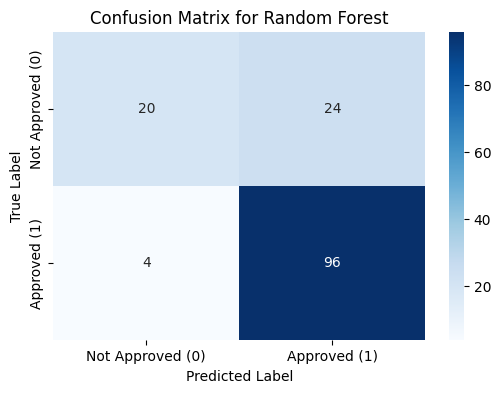

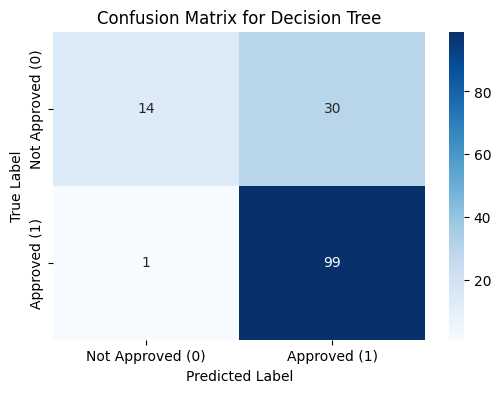

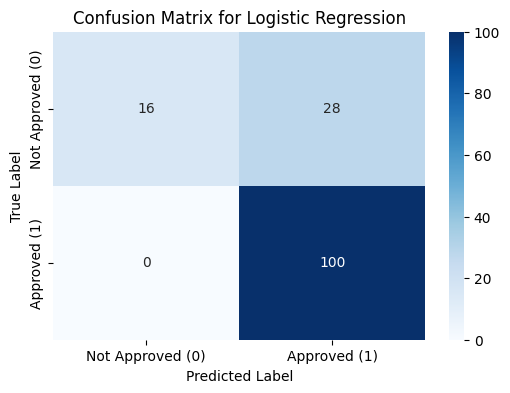

                 Model                                    Best Parameters  \
0        Random Forest                               {'n_estimators': 50}   
1        Decision Tree  {'max_depth': 5, 'min_samples_leaf': 1, 'min_s...   
2  Logistic Regression  {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}   

   Accuracy  Precision    Recall  F1-Score  Support  False Positives  \
0  0.805556   0.810185  0.805556  0.785799    144.0               24   
1  0.784722   0.818131  0.784722  0.745446    144.0               30   
2  0.805556   0.848090  0.805556  0.772125    144.0               28   

   False Negatives  
0                4  
1                1  
2                0  


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Not Approved (0)', 'Approved (1)'],
                yticklabels=['Not Approved (0)', 'Approved (1)'])
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

def evaluate_models(X_train, y_train, X_test, y_test, models, params):
    report = []
    best_model = None
    best_score = 0  # Initialize to track the best score

    for model_name, model in models.items():
        para = params.get(model_name, {})

        # Perform GridSearchCV to find the best parameters
        gs = GridSearchCV(model, para, cv=3, n_jobs=-1, scoring='accuracy')
        gs.fit(X_train, y_train)

        # Set the best parameters found
        model.set_params(**gs.best_params_)
        model.fit(X_train, y_train)

        # Make predictions
        y_test_pred = model.predict(X_test)

        # Calculate accuracy score
        acc = accuracy_score(y_test, y_test_pred)

        # Generate classification report as a dictionary
        report_dict = classification_report(y_test, y_test_pred, output_dict=True)

        # Calculate confusion matrix
        cm = confusion_matrix(y_test, y_test_pred)
        false_positives = cm[0, 1]  # FP
        false_negatives = cm[1, 0]  # FN

        # Store results in the report
        report.append({
            'Model': model_name,
            'Best Parameters': gs.best_params_,
            'Accuracy': acc,
            'Precision': report_dict.get('weighted avg', {}).get('precision', 0),
            'Recall': report_dict.get('weighted avg', {}).get('recall', 0),
            'F1-Score': report_dict.get('weighted avg', {}).get('f1-score', 0),
            'Support': report_dict.get('weighted avg', {}).get('support', 0),
            'False Positives': false_positives,
            'False Negatives': false_negatives
        })

        # Plot confusion matrix for the model
        plot_confusion_matrix(y_test, y_test_pred, model_name)

        # Check if this model is the best
        if acc > best_score:
            best_score = acc
            best_model = model

    # Convert report to DataFrame
    report_df = pd.DataFrame(report)

    return report_df, best_model

# Example usage of the function
class_weight = {0: 1, 1: 100}  # Adjusted class weight for imbalance

# Define the classification models
models = {
    "Random Forest": RandomForestClassifier(class_weight=class_weight),
    "Decision Tree": DecisionTreeClassifier(),
    "Logistic Regression": LogisticRegression(max_iter=1000)  # Increased max_iter for convergence
}

# Define hyperparameters for each model
params = {
    "Logistic Regression": {
        'C': [0.001, 0.01, 0.1, 1, 10],  # Inverse of regularization strength
        'penalty': ['l1', 'l2'],  # Type of regularization
        'solver': ['liblinear', 'saga']  # Algorithms to use
    },
    "Decision Tree": {
        'max_depth': [None, 5, 10, 20],  # Maximum depth of the tree
        'min_samples_split': [2, 5, 10],  # Minimum samples required to split
        'min_samples_leaf': [1, 2, 4]  # Minimum samples required in a leaf node
    },
    "Random Forest": {
        'n_estimators': [10, 50, 100]  # Number of trees in the forest
    }
}

# Assume X_train, X_test, y_train, y_test are already defined
model_report_df, best_model = evaluate_models(X_train, y_train, X_test, y_test, models, params)

# Print the report DataFrame
print(model_report_df)

# Save the DataFrame to a CSV file
model_report_df.to_csv('classification_report_14var.csv', index=False)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


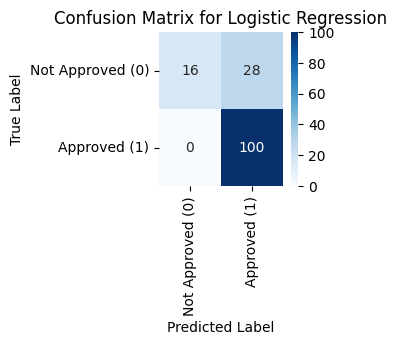

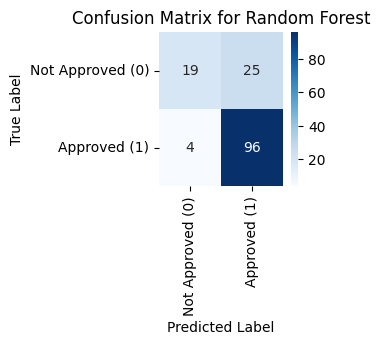

                 Model  Accuracy  Precision    Recall  F1-Score  Support  \
0  Logistic Regression  0.805556    0.84809  0.805556  0.772125    144.0   
1        Random Forest  0.798611    0.80338  0.798611  0.776618    144.0   

   False Positives  False Negatives  
0               28                0  
1               25                4  


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV






def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(2, 2))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Not Approved (0)', 'Approved (1)'],
                yticklabels=['Not Approved (0)', 'Approved (1)'])
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

#def evaluate_models(X_train, y_train, X_test, y_test, models, params):
def evaluate_models(X_train, y_train, X_test, y_test, models):
    report = []
    best_model = None
    best_score = 0  # Initialize to track the best score

    for model_name, model in models.items():
        #para = params.get(model_name, {})

        # Perform GridSearchCV to find the best parameters
        #gs = GridSearchCV(model, para, cv=3, n_jobs=-1, scoring='accuracy')
        # gs = GridSearchCV(model, cv=3, n_jobs=-1, scoring='accuracy')
        # gs.fit(X_train, y_train)

        # Set the best parameters found
        #model.set_params(**gs.best_params_)
        model.fit(X_train, y_train)

        # Make predictions
        y_test_pred = model.predict(X_test)

        # Calculate accuracy score
        acc = accuracy_score(y_test, y_test_pred)

        # Generate classification report as a dictionary
        report_dict = classification_report(y_test, y_test_pred, output_dict=True)

        # Calculate confusion matrix
        cm = confusion_matrix(y_test, y_test_pred)
        false_positives = cm[0, 1]  # FP
        false_negatives = cm[1, 0]  # FN

        # Store results in the report
        report.append({
            'Model': model_name,
            #'Best Parameters': gs.best_params_,
            'Accuracy': acc,
            'Precision': report_dict.get('weighted avg', {}).get('precision', 0),
            'Recall': report_dict.get('weighted avg', {}).get('recall', 0),
            'F1-Score': report_dict.get('weighted avg', {}).get('f1-score', 0),
            'Support': report_dict.get('weighted avg', {}).get('support', 0),
            'False Positives': false_positives,
            'False Negatives': false_negatives
        })

        # Plot confusion matrix for the model
        plot_confusion_matrix(y_test, y_test_pred, model_name)

        # Check if this model is the best
        if acc > best_score:
            best_score = acc
            best_model = model

    # Convert report to DataFrame
    report_df = pd.DataFrame(report)

    return report_df, best_model #gs.best_params_

# Example usage of the function
# Define your models and parameters here
class_weight = dict({0 : 1, 1 : 100})
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(class_weight=class_weight),
    # Add other models as needed
}

# params = {
#     "Logistic Regression": {
#         'C': [0.001, 0.01, 0.1, 1, 10],
#         'penalty': ['l1', 'l2'],
#         'solver': ['liblinear']
#     },
#     "Random Forest": {
#         'n_estimators': [10, 50, 100],
#     },
#     # Add parameter grids for other models as needed
# }

# Assume X_train, X_test, y_train, y_test are already defined
model_report_df, best_model = evaluate_models(X_train, y_train, X_test, y_test, models)

# Print the report DataFrame
print(model_report_df)

# Save the DataFrame to a CSV file
model_report_df.to_csv('classification_report_14var.csv', index=False)


In [ ]:
# Define the classification models
models = {
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Logistic Regression": LogisticRegression()
}

params = {
    "Logistic Regression": {
        'C': [0.001, 0.01, 0.1, 1, 10],  # Inverse of regularization strength
        'penalty': ['l1', 'l2', 'elasticnet'],  # Type of regularization
        'solver': ['liblinear', 'saga']  # Algorithms to use
    },
    "Decision Tree": {
        'max_depth': [None, 5, 10, 20],  # Maximum depth of the tree
        'min_samples_split': [2, 5, 10],  # Minimum samples required to split
        'min_samples_leaf': [1, 2, 4]  # Minimum samples required in a leaf node
    },
    "Random Forest": {
        'n_estimators': [10, 50, 100]  # Number of trees in the forest
    }
}
for model_name, model in models.items():
        para = params.get(model_name, {})
print(para)

{'C': [0.001, 0.01, 0.1, 1, 10], 'penalty': ['l1', 'l2', 'elasticnet'], 'solver': ['liblinear', 'saga']}


In [ ]:
# AT RANDOM STATE = 42

from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV
import pandas as pd

def evaluate_models(X_train, y_train, X_test, y_test, models, params):
    report = []
    best_model = None
    best_score = 0  # Initialize to track the best score

    for model_name, model in models.items():
        para = params.get(model_name, {})

        # Perform GridSearchCV to find the best parameters
        gs = GridSearchCV(model, para, cv=3, n_jobs=-1, scoring='accuracy')  # You can change scoring as needed
        gs.fit(X_train, y_train)

        # Set the best parameters found
        model.set_params(**gs.best_params_)
        model.fit(X_train, y_train)  # Train model with best parameters

        # Make predictions
        y_test_pred = model.predict(X_test)

        # Calculate accuracy score
        acc = accuracy_score(y_test, y_test_pred)

        # Generate classification report as a dictionary
        report_dict = classification_report(y_test, y_test_pred, output_dict=True)

        # Store results in the report
        report.append({
            'Model': model_name,
            'Best Parameters': gs.best_params_,
            'Accuracy': acc,
            'Precision': report_dict['weighted avg']['precision'],
            'Recall': report_dict['weighted avg']['recall'],
            'F1-Score': report_dict['weighted avg']['f1-score'],
            'Support': report_dict['weighted avg']['support'],
            'False Positives': sum((y_test == 0) & (y_test_pred == 1)),
            'False Negatives': sum((y_test == 1) & (y_test_pred == 0))
        })

        # Check if this model is the best
        if acc > best_score:
            best_score = acc
            best_model = model

    # Convert report to DataFrame
    report_df = pd.DataFrame(report)

    return report_df, best_model, gs.best_params_



##### **this is final one for model**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report




# Define your models and parameters
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier()
}

params = {
    "Logistic Regression": {
        'C': [0.001, 0.01, 0.1, 1, 10],
        'penalty': ['l1', 'l2'],
        'solver': ['liblinear']
    },
    "Random Forest": {
        'n_estimators': [10, 50, 100],
        'max_depth': [None, 10, 20]

    }
}

def evaluate_models(X_train, y_train, X_test, y_test, models, params):
    report = []
    best_model = None
    best_score = 0  # Initialize to track the best score

    for model_name, model in models.items():
        para = params.get(model_name, {})

        # Perform GridSearchCV to find the best parameters
        gs = GridSearchCV(model, para, cv=3, n_jobs=-1, scoring='accuracy')  # You can change scoring as needed
        gs.fit(X_train, y_train)

        # Set the best parameters found
        model.set_params(**gs.best_params_)
        model.fit(X_train, y_train)  # Train model with best parameters

        # Make predictions
        y_test_pred = model.predict(X_test)

        # Calculate accuracy score
        acc = accuracy_score(y_test, y_test_pred)

        # Generate classification report as a dictionary
        report_dict = classification_report(y_test, y_test_pred, output_dict=True)

        # Store results in the report
        report.append({
            'Model': model_name,
            'Best Parameters': gs.best_params_,
            'Accuracy': acc,
            'Precision': report_dict['weighted avg']['precision'],
            'Recall': report_dict['weighted avg']['recall'],
            'F1-Score': report_dict['weighted avg']['f1-score'],
            'Support': report_dict['weighted avg']['support'],
            'False Positives': sum((y_test == 0) & (y_test_pred == 1)),
            'False Negatives': sum((y_test == 1) & (y_test_pred == 0))
        })

        # Check if this model is the best
        if acc > best_score:
            best_score = acc
            best_model = model

    # Convert report to DataFrame
    report_df = pd.DataFrame(report)

    return report_df, best_model, gs.best_params_

# Evaluate the models
model_report_df, best_model, best_params = evaluate_models(X_train, y_train, X_test, y_test, models, params)

# Print the results
print("Model Report:")
print(model_report_df)

print("\nBest Model:")
print(best_model)

print("\nBest Parameters:")
print(best_params)


Model Report:
                 Model                                    Best Parameters  \
0  Logistic Regression  {'C': 0.1, 'penalty': 'l1', 'solver': 'libline...   
1        Random Forest             {'max_depth': 10, 'n_estimators': 100}   

   Accuracy  Precision    Recall  F1-Score  Support  False Positives  \
0  0.826389   0.845457  0.826389  0.797214    144.0               24   
1  0.833333   0.831346  0.833333  0.816959    144.0               20   

   False Negatives  
0                1  
1                4  

Best Model:
RandomForestClassifier(max_depth=10)

Best Parameters:
{'max_depth': 10, 'n_estimators': 100}


#### **code for saving the model**

#############**this one running check if fp improved**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
import pickle  # Importing pickle for saving models
            # Target variable

# Train-test split (70% train, 30% test)
random_state = 42  # Set a random state for reproducibility


# Define your models and parameters
models = {
    "Logistic Regression": LogisticRegression(random_state=random_state),
    "Random Forest": RandomForestClassifier(class_weight={0: 1, 1: 100}, random_state=random_state),
    "SVM": SVC(class_weight={0: 1, 1: 100}, random_state=random_state),
    "Gradient Boosting": GradientBoostingClassifier(random_state=random_state),
    "KNN": KNeighborsClassifier()
}


params = {
    "Logistic Regression": {
        'C': 10.0 **np.arange(-2,3),
        'penalty': ['l2'],
        #'solver': ['liblinear']
    },
    "Random Forest": {
        'n_estimators': [100],
        '#max_depth': [None, 10, 20],
       # 'class_weight': [{0: 1, 1: 100}]
    },
    # "SVM": {
    #     'C': [0.1, 1, 10],
    #     'kernel': ['linear', 'rbf'],
    #     'class_weight': [{0: 1, 1: 100}]
    # },
    # "Gradient Boosting": {
    #     'n_estimators': [50, 100],
    #     'learning_rate': [0.01, 0.1, 0.5],
    #     'max_depth': [3, 5, 7]
    # },
    # "KNN": {
    #     'n_neighbors': [3, 5, 7, 9],
    #     'weights': ['uniform', 'distance']
    # }
}

def evaluate_models(X_train, y_train, X_test, y_test, models, params):
    report = []
    best_model = None
    best_score = 0  # Initialize to track the best score

    for model_name, model in models.items():
        para = params.get(model_name, {})

        # Perform GridSearchCV to find the best parameters
        gs = GridSearchCV(model, para, cv=5, n_jobs=-1, scoring='accuracy')  # You can change scoring as needed
        gs.fit(X_train, y_train)

        # Set the best parameters found
        model.set_params(**gs.best_params_)
        model.fit(X_train, y_train)  # Train model with best parameters

        # Save the model to disk as a pickle file
        with open(f'{model_name.replace(" ", "_")}.pkl', 'wb') as file:
            pickle.dump(model, file)

        # Make predictions
        y_test_pred = model.predict(X_test)

        # Calculate accuracy score
        acc = accuracy_score(y_test, y_test_pred)

        # Generate classification report as a dictionary
        report_dict = classification_report(y_test, y_test_pred, output_dict=True)

        # Store results in the report
        report.append({
            'Model': model_name,
            'Best Parameters': gs.best_params_,
            'Accuracy': acc,
            'Precision': report_dict['weighted avg']['precision'],
            'Recall': report_dict['weighted avg']['recall'],
            'F1-Score': report_dict['weighted avg']['f1-score'],
            'Support': report_dict['weighted avg']['support'],
            'False Positives': sum((y_test == 0) & (y_test_pred == 1)),
            'False Negatives': sum((y_test == 1) & (y_test_pred == 0))
        })

        # Check if this model is the best
        if acc > best_score:
            best_score = acc
            best_model = model

    # Convert report to DataFrame
    report_df = pd.DataFrame(report)

    return report_df, best_model, gs.best_params_

# Evaluate the models
model_report_df, best_model, best_params = evaluate_models(X_train, y_train, X_test, y_test, models, params)

# Print the results
print("Model Report:")
print(model_report_df)

print("\nBest Model:")
print(best_model)

print("\nBest Parameters:")
print(best_params)


ValueError: Invalid parameter '#max_depth' for estimator RandomForestClassifier(class_weight={0: 1, 1: 100}, random_state=42). Valid parameters are: ['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'monotonic_cst', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'].

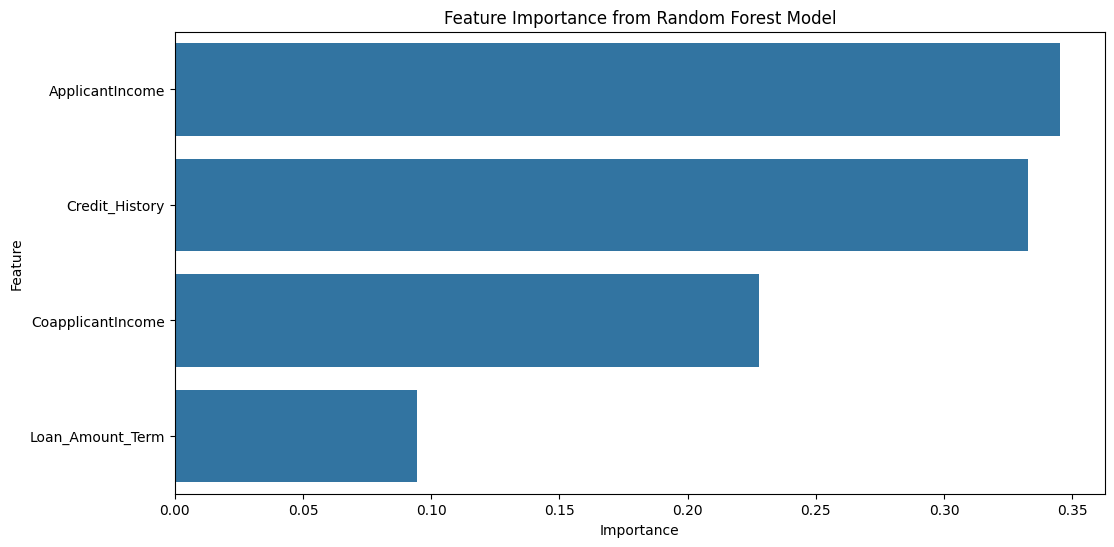

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier

# Assume you have your data loaded into trainX and trainY
# Fit the Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Get feature importances
importances = rf_model.feature_importances_

# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importances
})

# Sort the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance from Random Forest Model')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


# # # List of top 4 important features
# # top_features = [
# #     'Credit_History',
# #     'ApplicantIncome',
# #     'CoapplicantIncome',
# #     'Loan_Amount_Term'
# # ]

# # Creating a new DataFrame using transformed "dat" data frame with only the top 4 features
# feature_new = dat[top_features]

# # Display the new DataFrame
# feature_new


###**# This one i ran and got perfect results reducing fp**

In [ ]:
# List of top 4 important features
top_features = [
    'Credit_History',
    'ApplicantIncome',
    'CoapplicantIncome',
    'Loan_Amount_Term'
]

# Creating a new DataFrame using transformed "dat" data frame with only the top 4 features
feature_new = dat[top_features]

# Display the new DataFrame
feature_new

### target df

target = dat[["Loan_Status_Y"]]
target_change = target.values.flatten()
target_change

feature_new.shape, target_change.shape



from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(feature_new, target_change, train_size=0.7, )

In [ ]:
X_train_new.columns

Index(['Loan_Amount_Term', 'Credit_History',
       'ApplicantIncome_Log_RobustScaled', 'Gender_Male', 'Married_Yes',
       'Dependents_1', 'Dependents_2', 'Dependents_3',
       'Education_Not Graduate', 'Self_Employed_Yes',
       'Property_Area_Semiurban', 'Property_Area_Urban'],
      dtype='object')

In [ ]:
X_train.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area',
       'ApplicantIncome_Log_RobustScaled'],
      dtype='object')

In [ ]:
# Assuming CoapplicantIncome was log-transformed previously
X_train['CoapplicantIncome_Log'] = np.log(X_train['CoapplicantIncome'])  # log(1 + CoapplicantIncome)
X_test['CoapplicantIncome_Log'] = np.log(X_test['CoapplicantIncome'])  # log(1 + CoapplicantIncome)


KeyError: 'CoapplicantIncome'

In [ ]:
##################RUNNING WITH ROBUST AND LOGGED

# List of top 4 important features
top_features = [
    'Credit_History',
    'ApplicantIncome_Log_RobustScaled',
    ,'Loan_Amount_Term'
]



# Subset X_train and X_test to keep only the important features
X_train_imp = X_train_new[top_features]
X_test_imp = X_test_new[top_features]


KeyError: "['ApplicantIncome', 'CoapplicantIncome'] not in index"

In [ ]:
class_weight = dict({0 : 1, 1 : 100})
classifier = RandomForestClassifier(class_weight= class_weight)
classifier.fit(X_train, y_train)


y_pred = classifier.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[25 16]
 [12 91]]
0.8055555555555556
              precision    recall  f1-score   support

           0       0.68      0.61      0.64        41
           1       0.85      0.88      0.87       103

    accuracy                           0.81       144
   macro avg       0.76      0.75      0.75       144
weighted avg       0.80      0.81      0.80       144



In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import pickle

# Assuming X and y are your features and target variable respectively
# X = features
# y = target

# Train-test split (70% train, 30% test)
# random_state = 42
# X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=random_state)

# Define the classification models
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier()
}

def evaluate_models(X_train, y_train, X_test, y_test, models):
    model_report = []

    for model_name, model in models.items():
        model.fit(X_train, y_train)  # Fit the model
        y_pred = model.predict(X_test)  # Make predictions

        # Calculate accuracy score
        acc = accuracy_score(y_test, y_pred)

        # Generate classification report as a dictionary
        report_dict = classification_report(y_test, y_pred, output_dict=True)

        # Store results in the report
        model_report.append({
            'Model': model_name,
            'Accuracy': acc,
            'Precision': report_dict['weighted avg']['precision'],
            'Recall': report_dict['weighted avg']['recall'],
            'F1-Score': report_dict['weighted avg']['f1-score'],
            'Support': report_dict['weighted avg']['support'],
            'False Positives': sum((y_test == 0) & (y_pred == 1)),
            'False Negatives': sum((y_test == 1) & (y_pred == 0))
        })

        # Save the model to disk as a pickle file
        with open(f'{model_name.replace(" ", "_")}.pkl', 'wb') as file:
            pickle.dump(model, file)

    # Convert report to DataFrame
    report_df = pd.DataFrame(model_report)

    return report_df

# Evaluate the models
model_report_df = evaluate_models(X_train, y_train, X_test, y_test, models)

# Print the DataFrame
print("Model Report:")
print(model_report_df)

# Save the report to a CSV file
model_report_df.to_csv('classification_report4var.csv', index=False)


Model Report:
                 Model  Accuracy  Precision    Recall  F1-Score  Support  \
0  Logistic Regression  0.805556   0.811988  0.805556  0.779288    144.0   
1        Random Forest  0.784722   0.775962  0.784722  0.778213    144.0   

   False Positives  False Negatives  
0               25                3  
1               19               12  


#### **model saved as randomforest.pkl has 4 var and with use of class weight its false positive decreased and recall became fantastic 43 to 78**

In [ ]:
# List of top 4 important features
top_features = [
    'Credit_History',
    'ApplicantIncome',
    'CoapplicantIncome',
    'Loan_Amount_Term'
]

# Creating a new DataFrame using transformed "dat" data frame with only the top 4 features
feature_new = dat[top_features]

# Display the new DataFrame
feature_new

### target df

target = dat[["Loan_Status_Y"]]
target_change = target.values.flatten()
target_change

feature_new.shape, target_change.shape



from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(feature_new, target_change, train_size=0.7)

In [ ]:

# Define your models
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(class_weight={0: 1, 1: 100}),
    #"SVM": SVC(class_weight={0: 1, 1: 100}, random_state=random_state, probability=True),
    #"Gradient Boosting": GradientBoostingClassifier(random_state=random_state),
    #"KNN": KNeighborsClassifier()
}

def evaluate_models(X_train, y_train, X_test, y_test, models):
    report = []
    best_model = None
    best_score = 0  # Initialize to track the best score

    for model_name, model in models.items():
        # Fit the model
        model.fit(X_train, y_train)

        # Save the model to disk as a pickle file
        with open(f'{model_name.replace(" ", "_")}.pkl', 'wb') as file:
            pickle.dump(model, file)

        # Make predictions
        y_test_pred = model.predict(X_test)

        # Calculate accuracy score
        acc = accuracy_score(y_test, y_test_pred)

        # Generate classification report as a dictionary
        report_dict = classification_report(y_test, y_test_pred, output_dict=True)

        # Store results in the report
        report.append({
            'Model': model_name,
            'Accuracy': acc,
            'Precision': report_dict['weighted avg']['precision'],
            'Recall': report_dict['weighted avg']['recall'],
            'F1-Score': report_dict['weighted avg']['f1-score'],
            'Support': report_dict['weighted avg']['support'],
            'False Positives': sum((y_test == 0) & (y_test_pred == 1)),
            'False Negatives': sum((y_test == 1) & (y_test_pred == 0))
        })

        # Check if this model is the best
        if acc > best_score:
            best_score = acc
            best_model = model

    # Convert report to DataFrame
    report_df = pd.DataFrame(report)

    return report_df, best_model

# Evaluate the models
model_report_df, best_model = evaluate_models(X_train, y_train, X_test, y_test, models)

# Print the results
print("Model Report:")
print(model_report_df)

print("\nBest Model:")
print(best_model)

Model Report:
                 Model  Accuracy  Precision    Recall  F1-Score  Support  \
0  Logistic Regression  0.826389   0.825245  0.826389  0.808698    144.0   
1        Random Forest  0.798611   0.791722  0.798611  0.794056    144.0   

   False Positives  False Negatives  
0               21                4  
1               17               12  

Best Model:
LogisticRegression()


### **case3:**


In [ ]:
# List of top 4 important features
top_features = [
    'Credit_History',
    'ApplicantIncome',
    'CoapplicantIncome',
    'Loan_Amount_Term'
]

# Creating a new DataFrame using transformed "dat" data frame with only the top 4 features
feature_new = dat[top_features]

# Display the new DataFrame
feature_new

### target df

target = dat[["Loan_Status_Y"]]
target_change = target.values.flatten()
target_change

feature_new.shape, target_change.shape



from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(feature_new, target_change, train_size=0.7)

In [ ]:

# Define your models
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(class_weight={0: 1, 1: 100}),
    #"SVM": SVC(class_weight={0: 1, 1: 100}, random_state=random_state, probability=True),
    #"Gradient Boosting": GradientBoostingClassifier(random_state=random_state),
    #"KNN": KNeighborsClassifier()
}

def evaluate_models(X_train, y_train, X_test, y_test, models):
    report = []
    best_model = None
    best_score = 0  # Initialize to track the best score

    for model_name, model in models.items():
        # Fit the model
        model.fit(X_train, y_train)

        # Save the model to disk as a pickle file
        with open(f'{model_name.replace(" ", "_")}.pkl', 'wb') as file:
            pickle.dump(model, file)

        # Make predictions
        y_test_pred = model.predict(X_test)

        # Calculate accuracy score
        acc = accuracy_score(y_test, y_test_pred)

        # Generate classification report as a dictionary
        report_dict = classification_report(y_test, y_test_pred, output_dict=True)

        # Store results in the report
        report.append({
            'Model': model_name,
            'Accuracy': acc,
            'Precision': report_dict['weighted avg']['precision'],
            'Recall': report_dict['weighted avg']['recall'],
            'F1-Score': report_dict['weighted avg']['f1-score'],
            'Support': report_dict['weighted avg']['support'],
            'False Positives': sum((y_test == 0) & (y_test_pred == 1)),
            'False Negatives': sum((y_test == 1) & (y_test_pred == 0))
        })

        # Check if this model is the best
        if acc > best_score:
            best_score = acc
            best_model = model

    # Convert report to DataFrame
    report_df = pd.DataFrame(report)

    return report_df, best_model

# Evaluate the models
model_report_df, best_model = evaluate_models(X_train, y_train, X_test, y_test, models)

# Print the results
print("Model Report:")
print(model_report_df)

print("\nBest Model:")
print(best_model)

Model Report:
                 Model  Accuracy  Precision    Recall  F1-Score  Support  \
0  Logistic Regression  0.833333   0.847899  0.833333  0.817169    144.0   
1        Random Forest  0.812500   0.808293  0.812500  0.809294    144.0   

   False Positives  False Negatives  
0               22                2  
1               16               11  

Best Model:
LogisticRegression()


In [ ]:
class_weight = dict({0 : 1, 1 : 100})
classifier = RandomForestClassifier(class_weight= class_weight)
classifier.fit(X_train, y_train)


y_pred = classifier.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
import pickle





# Train-test split (70% train, 30% test)


# Define your models
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(class_weight={0: 1, 1: 100}),
    #"SVM": SVC(class_weight={0: 1, 1: 100}, random_state=random_state, probability=True),
    #"Gradient Boosting": GradientBoostingClassifier(random_state=random_state),
    #"KNN": KNeighborsClassifier()
}

def evaluate_models(X_train, y_train, X_test, y_test, models):
    report = []
    best_model = None
    best_score = 0  # Initialize to track the best score

    for model_name, model in models.items():
        # Fit the model
        model.fit(X_train, y_train)

        # Save the model to disk as a pickle file
        with open(f'{model_name.replace(" ", "_")}.pkl', 'wb') as file:
            pickle.dump(model, file)

        # Make predictions
        y_test_pred = model.predict(X_test)

        # Calculate accuracy score
        acc = accuracy_score(y_test, y_test_pred)

        # Generate classification report as a dictionary
        report_dict = classification_report(y_test, y_test_pred, output_dict=True)

        # Store results in the report
        report.append({
            'Model': model_name,
            'Accuracy': acc,
            'Precision': report_dict['weighted avg']['precision'],
            'Recall': report_dict['weighted avg']['recall'],
            'F1-Score': report_dict['weighted avg']['f1-score'],
            'Support': report_dict['weighted avg']['support'],
            'False Positives': sum((y_test == 0) & (y_test_pred == 1)),
            'False Negatives': sum((y_test == 1) & (y_test_pred == 0))
        })

        # Check if this model is the best
        if acc > best_score:
            best_score = acc
            best_model = model

    # Convert report to DataFrame
    report_df = pd.DataFrame(report)

    return report_df, best_model

# Evaluate the models
model_report_df, best_model = evaluate_models(X_train, y_train, X_test, y_test, models)

# Print the results
print("Model Report:")
print(model_report_df)

print("\nBest Model:")
print(best_model)


Model Report:
                 Model  Accuracy  Precision    Recall  F1-Score  Support  \
0  Logistic Regression  0.805556   0.811988  0.805556  0.779288    144.0   
1        Random Forest  0.805556   0.800700  0.805556  0.802422    144.0   

   False Positives  False Negatives  
0               25                3  
1               16               12  

Best Model:
LogisticRegression()


1        Random Forest  0.805556   0.800700  0.805556  0.802422    144.0   

   False Positives  False Negatives  
0               25                3  
**1               16               12**

##########**Hurray it worked its 4 var**

####**Feature importance and model training using 4 imp varibles only**

#### **saving 4variable models:**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
import pickle  # Importing pickle for saving models

                  # Target variable



# Define your models and parameters
models = {
    "Logistic Regression": LogisticRegression(random_state=random_state),
    "Random Forest": RandomForestClassifier(class_weight={0: 1, 1: 100}, random_state=random_state),
    "SVM": SVC(class_weight={0: 1, 1: 100}, random_state=random_state),
    "Gradient Boosting": GradientBoostingClassifier(random_state=random_state),
    "KNN": KNeighborsClassifier()
}

params = {
    "Logistic Regression": {
        'C': [0.001, 0.01, 0.1, 1, 10],
        'penalty': ['l1', 'l2'],
        'solver': ['liblinear']
    },
    "Random Forest": {
        'n_estimators': [10, 50, 100],
        'max_depth': [None, 10, 20],
        'class_weight': [{0: 1, 1: 100}]
    },
    "SVM": {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf'],
        'class_weight': [{0: 1, 1: 100}]
    },
    "Gradient Boosting": {
        'n_estimators': [50, 100],
        'learning_rate': [0.01, 0.1, 0.5],
        'max_depth': [3, 5, 7]
    },
    "KNN": {
        'n_neighbors': [3, 5, 7, 9],
        'weights': ['uniform', 'distance']
    }
}

def evaluate_models(X_train, y_train, X_test, y_test, models, params):
    report = []
    best_model = None
    best_score = 0  # Initialize to track the best score

    for model_name, model in models.items():
        para = params.get(model_name, {})

        # Perform GridSearchCV to find the best parameters
        gs = GridSearchCV(model, para, cv=3, n_jobs=-1, scoring='accuracy')  # You can change scoring as needed
        gs.fit(X_train, y_train)

        # Set the best parameters found
        model.set_params(**gs.best_params_)
        model.fit(X_train, y_train)  # Train model with best parameters

        # Save the model to disk as a pickle file
        with open(f'{model_name.replace(" ", "_")}.pkl', 'wb') as file:
            pickle.dump(model, file)

        # Make predictions
        y_test_pred = model.predict(X_test)

        # Calculate accuracy score
        acc = accuracy_score(y_test, y_test_pred)

        # Generate classification report as a dictionary
        report_dict = classification_report(y_test, y_test_pred, output_dict=True)

        # Store results in the report
        report.append({
            'Model': model_name,
            'Best Parameters': gs.best_params_,
            'Accuracy': acc,
            'Precision': report_dict['weighted avg']['precision'],
            'Recall': report_dict['weighted avg']['recall'],
            'F1-Score': report_dict['weighted avg']['f1-score'],
            'Support': report_dict['weighted avg']['support'],
            'False Positives': sum((y_test == 0) & (y_test_pred == 1)),
            'False Negatives': sum((y_test == 1) & (y_test_pred == 0))
        })

        # Check if this model is the best
        if acc > best_score:
            best_score = acc
            best_model = model

    # Convert report to DataFrame
    report_df = pd.DataFrame(report)

    return report_df, best_model, gs.best_params_

# Evaluate the models
model_report_df, best_model, best_params = evaluate_models(X_train, y_train, X_test, y_test, models, params)

# Print the results
print("Model Report:")
print(model_report_df)

print("\nBest Model:")
print(best_model)

print("\nBest Parameters:")
print(best_params)


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Model Report:
                 Model                                    Best Parameters  \
0  Logistic Regression  {'C': 0.1, 'penalty': 'l1', 'solver': 'libline...   
1        Random Forest  {'class_weight': {0: 1, 1: 100}, 'max_depth': ...   
2                  SVM  {'C': 10, 'class_weight': {0: 1, 1: 100}, 'ker...   
3    Gradient Boosting  {'learning_rate': 0.01, 'max_depth': 3, 'n_est...   
4                  KNN           {'n_neighbors': 5, 'weights': 'uniform'}   

   Accuracy  Precision    Recall  F1-Score  Support  False Positives  \
0  0.784722   0.797883  0.784722  0.755390    144.0               28   
1  0.784722   0.791030  0.784722  0.758974    144.0               27   
2  0.687500   0.472656  0.687500  0.560185    144.0               45   
3  0.777778   0.791158  0.777778  0.745536    144.0               29   
4  0.645833   0.586190  0.645833  0.597577    144.0               38   

   False Negatives  
0                3  
1                4  
2                0  
3     

In [ ]:
with open('Logistic_Regression.pkl', 'rb') as file:
    loaded_model = pickle.load(file)
loaded_model


LogisticRegression(C=1, penalty='l1', random_state=42, solver='liblinear')

In [ ]:
import os

# Get the current working directory
current_directory = os.getcwd()
print("Current Working Directory:", current_directory)


Current Working Directory: /content


In [ ]:
dat.columns
### lets see the count of loan statau
dat["Loan_Status_Y"].value_counts()

# Calculate the proportion of each value in Loan_Status_Y
loan_status_proportion = dat["Loan_Status_Y"].value_counts(normalize=True) * 100
print(loan_status_proportion)

Index(['ApplicantIncome', 'CoapplicantIncome', 'Loan_Amount_Term',
       'Credit_History', 'Gender_Male', 'Married_Yes', 'Dependents_1',
       'Dependents_2', 'Dependents_3+', 'Education_Not Graduate',
       'Self_Employed_Yes', 'Property_Area_Semiurban', 'Property_Area_Urban',
       'Loan_Status_Y'],
      dtype='object')

In [ ]:
# adding class weight to rf
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report




# Define your models and parameters
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier()
}

params = {
    "Logistic Regression": {
        'C': [0.001, 0.01, 0.1, 1, 10],
        'penalty': ['l1', 'l2'],
        'solver': ['liblinear']
    },
    "Random Forest": {
        'n_estimators': [10, 50, 100],
        'max_depth': [None, 10, 20]

    }
}

def evaluate_models(X_train, y_train, X_test, y_test, models, params):
    report = []
    best_model = None
    best_score = 0  # Initialize to track the best score

    for model_name, model in models.items():
        para = params.get(model_name, {})

        # Perform GridSearchCV to find the best parameters
        gs = GridSearchCV(model, para, cv=3, n_jobs=-1, scoring='accuracy')  # You can change scoring as needed
        gs.fit(X_train, y_train)

        # Set the best parameters found
        model.set_params(**gs.best_params_)
        model.fit(X_train, y_train)  # Train model with best parameters

        # Make predictions
        y_test_pred = model.predict(X_test)

        # Calculate accuracy score
        acc = accuracy_score(y_test, y_test_pred)

        # Generate classification report as a dictionary
        report_dict = classification_report(y_test, y_test_pred, output_dict=True)

        # Store results in the report
        report.append({
            'Model': model_name,
            'Best Parameters': gs.best_params_,
            'Accuracy': acc,
            'Precision': report_dict['weighted avg']['precision'],
            'Recall': report_dict['weighted avg']['recall'],
            'F1-Score': report_dict['weighted avg']['f1-score'],
            'Support': report_dict['weighted avg']['support'],
            'False Positives': sum((y_test == 0) & (y_test_pred == 1)),
            'False Negatives': sum((y_test == 1) & (y_test_pred == 0))
        })

        # Check if this model is the best
        if acc > best_score:
            best_score = acc
            best_model = model

    # Convert report to DataFrame
    report_df = pd.DataFrame(report)

    return report_df, best_model, gs.best_params_

# Evaluate the models
model_report_df, best_model, best_params = evaluate_models(X_train, y_train, X_test, y_test, models, params)

# Print the results
print("Model Report:")
print(model_report_df)

print("\nBest Model:")
print(best_model)

print("\nBest Parameters:")
print(best_params)


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report



# Define your models and parameters
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(class_weight={0: 1, 1: 100})  # Custom class weights
}

params = {
    "Logistic Regression": {
        'C': [0.001, 0.01, 0.1, 1, 10],
        'penalty': ['l1', 'l2'],
        'solver': ['liblinear']
    },
    "Random Forest": {
        'n_estimators': [10, 50, 100],
        'max_depth': [None, 10, 20],
        'class_weight': [{0: 1, 1: 100}]  # You can also explore custom weights in GridSearchCV
    }
}

def evaluate_models(X_train, y_train, X_test, y_test, models, params):
    report = []
    best_model = None
    best_score = 0  # Initialize to track the best score

    for model_name, model in models.items():
        para = params.get(model_name, {})

        # Perform GridSearchCV to find the best parameters
        gs = GridSearchCV(model, para, cv=3, n_jobs=-1, scoring='accuracy')  # You can change scoring as needed
        gs.fit(X_train, y_train)

        # Set the best parameters found
        model.set_params(**gs.best_params_)
        model.fit(X_train, y_train)  # Train model with best parameters

        # Make predictions
        y_test_pred = model.predict(X_test)

        # Calculate accuracy score
        acc = accuracy_score(y_test, y_test_pred)

        # Generate classification report as a dictionary
        report_dict = classification_report(y_test, y_test_pred, output_dict=True)

        # Store results in the report
        report.append({
            'Model': model_name,
            'Best Parameters': gs.best_params_,
            'Accuracy': acc,
            'Precision': report_dict['weighted avg']['precision'],
            'Recall': report_dict['weighted avg']['recall'],
            'F1-Score': report_dict['weighted avg']['f1-score'],
            'Support': report_dict['weighted avg']['support'],
            'False Positives': sum((y_test == 0) & (y_test_pred == 1)),
            'False Negatives': sum((y_test == 1) & (y_test_pred == 0))
        })

        # Check if this model is the best
        if acc > best_score:
            best_score = acc
            best_model = model

    # Convert report to DataFrame
    report_df = pd.DataFrame(report)

    return report_df, best_model, gs.best_params_

# Evaluate the models
model_report_df, best_model, best_params = evaluate_models(X_train, y_train, X_test, y_test, models, params)

# Print the results
print("Model Report:")
print(model_report_df)

print("\nBest Model:")
print(best_model)

print("\nBest Parameters:")
print(best_params)


Model Report:
                 Model                                    Best Parameters  \
0  Logistic Regression  {'C': 0.1, 'penalty': 'l1', 'solver': 'libline...   
1        Random Forest  {'class_weight': {0: 1, 1: 100}, 'max_depth': ...   

   Accuracy  Precision    Recall  F1-Score  Support  False Positives  \
0  0.826389   0.845457  0.826389  0.797214    144.0               24   
1  0.805556   0.795289  0.805556  0.786452    144.0               22   

   False Negatives  
0                1  
1                6  

Best Model:
LogisticRegression(C=0.1, penalty='l1', solver='liblinear')

Best Parameters:
{'class_weight': {0: 1, 1: 100}, 'max_depth': 10, 'n_estimators': 100}


##########################################################################################################################################################

#### **Transformation on basis od data Distribution :**
**Gaussian Transformation: linear and logitsic condiders features are normally distr accuracy-performance improves**

**Techniques for distribution(right skewed, left skewed) change to normal/gaussian distribution will help to improve accuracy-performance**



*   Logarithimic transformation

*   Reciprocal transformation

*   Square root transformation
*   Exponential Transformation


*   Box cox Transformation






In [ ]:
 # defining models to be used
from sklearn.linear_model import LogisticRegression
models = {
                "Logistic Regression": LogisticRegression(),
                "Random Forest": RandomForestClassifier(),
                "Decision Tree": DecisionTreeClassifier()
 }

# MOEDEL 1:

In [ ]:
### logistic regression
log_class = LogisticRegression()
grid = {"C" : 10.0 **np.arange(-2,3), "penalty": ["l2"]}

## cross validation used on train data
cv = KFold(n_splits = 5, random_state = None, shuffle = False) # xtrain/5 = train + vslid and score 5 times

## lets apply cv on train data sep into train and validation and then using test
#train_test_split is the function we imported and will use to split the data.
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(features, target_change, train_size=0.7)


clf = GridSearchCV(log_class, grid, cv = cv, n_jobs = -1, scoring= "f1_macro")
clf.fit(X_train, y_train)



y_pred = clf.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 0 28]
 [ 2 66]]
0.6875
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        28
         1.0       0.70      0.97      0.81        68

    accuracy                           0.69        96
   macro avg       0.35      0.49      0.41        96
weighted avg       0.50      0.69      0.58        96



In [ ]:
#

##### **FE Encoding Techniques: Converting catagorical to numerical****



*  **One hot encoding**: Disadvantage when large number of categories in a column.






In [ ]:
# transforming(hot encoding)
#["Gender", "Married","Dependents", "Education", "Self_Employed","Property_Area", "Loan_Status"]

dat = pd.get_dummies(features,["Gender", "Married","Dependents", "Education", "Self_Employed","Property_Area", "Loan_Status"],drop_first=True)


 #Convert boolean columns to integer
bool_cols = dat.select_dtypes(include=['bool']).columns
dat[bool_cols] = dat[bool_cols].astype(int)
dat

,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
1,4583,1508.0,360.0,1.0,1,1,1,0,0,0,0,0,0,0
2,3000,0.0,360.0,1.0,1,1,0,0,0,0,1,0,1,1
3,2583,2358.0,360.0,1.0,1,1,0,0,0,1,0,0,1,1
4,4682,0.0,360.0,1.0,1,0,0,0,0,0,0,0,1,1
5,4682,4196.0,360.0,1.0,1,1,0,1,0,0,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,2900,0.0,360.0,1.0,0,0,0,0,0,0,0,0,0,1
610,4106,0.0,180.0,1.0,1,1,0,0,1,0,0,0,0,1
611,4682,240.0,360.0,1.0,1,1,1,0,0,0,0,0,1,1
612,4682,0.0,360.0,1.0,1,1,0,1,0,0,0,0,1,1


In [ ]:
dat.head()

,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
1,4583,1508.0,360.0,1.0,1,1,1,0,0,0,0,0,0,0
2,3000,0.0,360.0,1.0,1,1,0,0,0,0,1,0,1,1
3,2583,2358.0,360.0,1.0,1,1,0,0,0,1,0,0,1,1
4,4682,0.0,360.0,1.0,1,0,0,0,0,0,0,0,1,1
5,4682,4196.0,360.0,1.0,1,1,0,1,0,0,1,0,1,1


## **check imbalance**

In [ ]:
# Calculate the proportion of each value in Loan_Status_Y
loan_status_proportion = dat["Loan_Status_Y"].value_counts(normalize=True) * 100
print(loan_status_proportion)


Loan_Status_Y
1    69.166667
0    30.833333
Name: proportion, dtype: float64


#### **Method 1:Cross Validation with hypertuning**

####**Method1: Cross validation method  with hypertuning to overcome imbalnce and overfitting used during train test split.**

## **train test split**:
splitting using cross validation k fold.



In [ ]:
dat.head()

,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
1,4583,1508.0,360.0,1.0,1,1,1,0,0,0,0,0,0,0
2,3000,0.0,360.0,1.0,1,1,0,0,0,0,1,0,1,1
3,2583,2358.0,360.0,1.0,1,1,0,0,0,1,0,0,1,1
4,4682,0.0,360.0,1.0,1,0,0,0,0,0,0,0,1,1
5,4682,4196.0,360.0,1.0,1,1,0,1,0,0,1,0,1,1


In [ ]:
### independent and dependent
features = dat.drop(["Loan_Status_Y"], axis = 1)

target = dat[["Loan_Status_Y"]]

###**Need to change dim of target value**

In [ ]:
target = dat[["Loan_Status_Y"]]
target_change = target.values.flatten()
target_change

array([0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,

#### **Model Training and Evaluation and Optimisation**

#### **Step1:** model fit

In [ ]:
## list of models


In [ ]:
### logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import KFold
import numpy as np
from sklearn.model_selection import GridSearchCV


In [ ]:
### logistic regression
log_class = LogisticRegression()
grid = {"C" : 10.0 **np.arange(-2,3), "penalty": ["l2"]}

## cross validation used on train data
cv = KFold(n_splits = 5, random_state = None, shuffle = False) # xtrain/5 = train + vslid and score 5 times

## lets apply cv on train data sep into train and validation and then using test
#train_test_split is the function we imported and will use to split the data.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target_change, train_size=0.7)


clf = GridSearchCV(log_class, grid, cv = cv, n_jobs = -1, scoring= "f1_macro")
clf.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                         'penalty': ['l2']},
             scoring='f1_macro')

In [ ]:
y_pred = clf.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[20 22]
 [ 4 98]]
0.8194444444444444
              precision    recall  f1-score   support

           0       0.83      0.48      0.61        42
           1       0.82      0.96      0.88       102

    accuracy                           0.82       144
   macro avg       0.82      0.72      0.74       144
weighted avg       0.82      0.82      0.80       144



### **conclusion**
1. 0, 0 = 20(TN) , 1,1(TP)= 98, FP = 22(0 predicted as 1), FN = 4(1 predicted AS 0)

2. **Class 0:**
**Precision (0.83):**

Out of all instances predicted as class 0, 83% were actually class 0. This is a good precision score, indicating that when the model predicts class 0, it is mostly correct.
Recall (0.48):

This means that out of all actual class 0 instances, only 48% were correctly identified by the model. This is relatively low, indicating that many instances of class 0 are being misclassified as class 1 (as indicated by the 22 false positives).
F1-Score (0.61):

The F1-score combines precision and recall into a single metric, and in this case, it's moderately low, reflecting the trade-off between precision and recall.


**2. Class 1:**
Precision (0.82):

For class 1, 82% of instances predicted as class 1 were correct. This is also a good score, indicating that the model is reliable when it predicts class 1.
Recall (0.96):

The model correctly identifies 96% of the actual class 1 instances. This is an excellent recall score, indicating that the model is very effective at identifying class 1 instances, with only 4 false negatives.
F1-Score (0.88):

This score is high, reflecting a good balance between precision and recall for class 1.


3. F1 SCORE OF 1 > F1 SCORE OF 0 , IT might be imbalance

#### Efect of model predictions on loan:
**Misclassification Risk:** : **increasing defaults**

The recall for not-approved loans (class 0) is 48%, meaning less than half of actual not-approved loans are correctly identified. This leads to many loans that should be denied being incorrectly classified as approved (class 1), increasing the risk of defaults.

**Precision Insights for 0:**(total negative out of all predicted 0 not actuall 0)

Although precision for class 0 is 83%, indicating that when a loan is predicted as not approved, it is usually correct, the low recall highlights a failure to capture many at-risk loans.



**Solution:**

**Focus on Improving Recall:**
Enhancing recall for class 0 is essential to reduce the number of defaults. A higher recall means more actual not-approved loans are correctly identified, protecting the financial institution from losses and ensuring responsible lending.
Summary
Prioritizing recall for not-approved loans is vital in your model to minimize the risk of approving risky loans and safeguard the institution's financial health. This focus aligns with responsible lending practices.

#### **Method2: Random forest with cross validation(cv) and hyperparameter tuning**

1.  Using Random forest with cv and hyperparameter to decrease effect of imbalance dataset on model prediction. Ensemble methods like Randon forest are robust to imbalnce and can work still well. By employing Random Forest with cross-validation and hyperparameter tuning, you can effectively address the challenges of class imbalance.

2. This approach enhances the model's ability to accurately predict both approved and not-approved loans, thereby reducing the risk of defaults and improving overall predictive accuracy.

In [ ]:
## random forest test for imbalance.
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))



[[21 26]
 [11 86]]
0.7430555555555556
              precision    recall  f1-score   support

           0       0.66      0.45      0.53        47
           1       0.77      0.89      0.82        97

    accuracy                           0.74       144
   macro avg       0.71      0.67      0.68       144
weighted avg       0.73      0.74      0.73       144



#### **Conclusion on Rf**:
1. didnot worked well with random forest as false negative and false positive increased.


#### **Rf with n estimator = 100**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(n_estimators = 100)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[22 25]
 [ 9 88]]
0.7638888888888888
              precision    recall  f1-score   support

           0       0.71      0.47      0.56        47
           1       0.78      0.91      0.84        97

    accuracy                           0.76       144
   macro avg       0.74      0.69      0.70       144
weighted avg       0.76      0.76      0.75       144



Model accuracy score with 100 decision-trees : 0.7500
Confusion Matrix for Random Forest:
[[21 26]
 [10 87]]


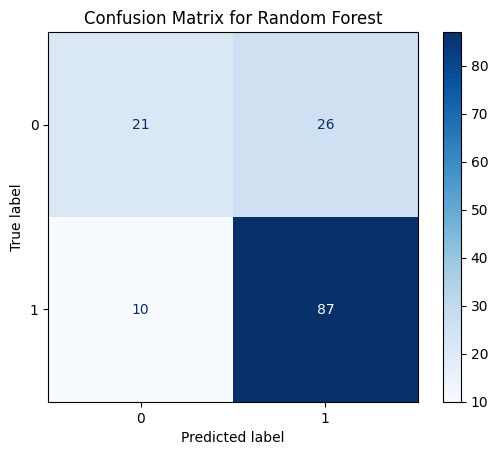

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay


rfc_100 = RandomForestClassifier(n_estimators=100, random_state=0)



# fit the model to the training set

rfc_100.fit(X_train, y_train)



# Predict on the test set results

y_pred_100 = rfc_100.predict(X_test)



# Check accuracy score

print('Model accuracy score with 100 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred_100)))


# Compute confusion matrix
conf_matrix_rf = confusion_matrix(y_test, y_pred_100)
print("Confusion Matrix for Random Forest:")
print(conf_matrix_rf)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_rf, display_labels= rfc_100.classes_)

disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for Random Forest")
plt.show()

#### **Feature Importance**

#### **model may not be working well due to large number of independent variables**

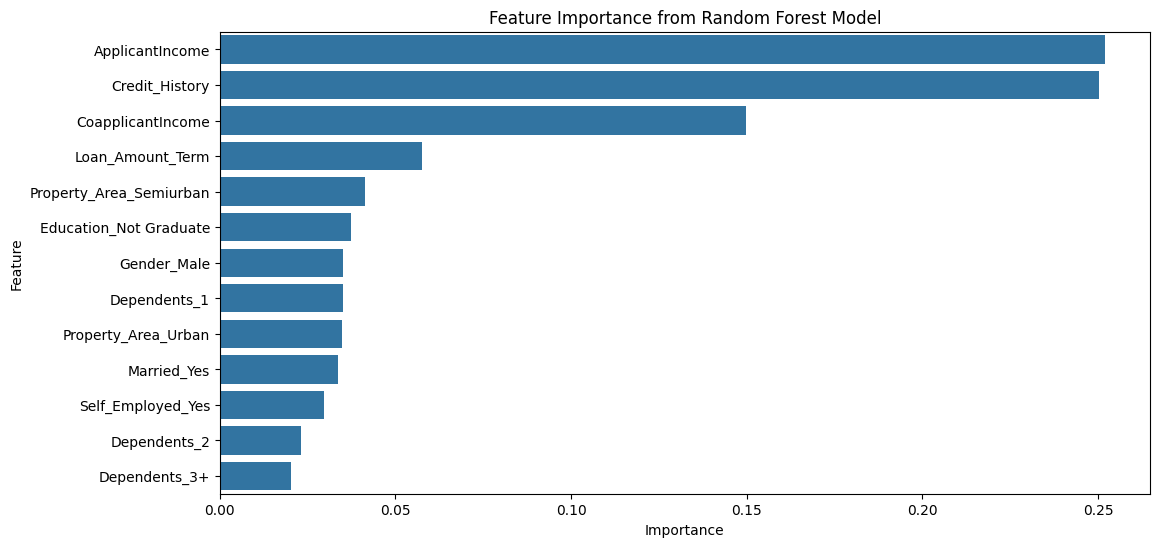

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier

# Assume you have your data loaded into trainX and trainY
# Fit the Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Get feature importances
importances = rf_model.feature_importances_

# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importances
})

# Sort the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance from Random Forest Model')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

#### **Trainig the RF  model with only 4 important features**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier

# Assume you have your data loaded into trainX and trainY
# Fit the Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Get feature importances
importances = rf_model.feature_importances_

# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importances
})

# Sort the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance from Random Forest Model')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

# List of top 4 important features
top_features = [
    'Credit_History',
    'ApplicantIncome',
    'CoapplicantIncome',
    'Loan_Amount_Term'
]

# Creating a new DataFrame using transformed "dat" data frame with only the top 4 features
feature_new = dat[top_features]

# Display the new DataFrame
feature_new

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier

# Assume you have your data loaded into trainX and trainY
# Fit the Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Get feature importances
importances = rf_model.feature_importances_

# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importances
})

# Sort the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance from Random Forest Model')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


# List of top 4 important features
top_features = [
    'Credit_History',
    'ApplicantIncome',
    'CoapplicantIncome',
    'Loan_Amount_Term'
]

# Creating a new DataFrame using transformed "dat" data frame with only the top 4 features
feature_new = dat[top_features]

# Display the new DataFrame
feature_new

### target df

target = dat[["Loan_Status_Y"]]
target_change = target.values.flatten()
target_change

feature_new.shape, target_change.shape



from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(feature_new, target_change, train_size=0.7)

In [ ]:
### target df

target = dat[["Loan_Status_Y"]]
target_change = target.values.flatten()
target_change

feature_new.shape, target_change.shape


((480, 4), (480,))

#### **split data**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(feature_new, target_change, train_size=0.7)

####**Model 2: using 4 variable into Random Forest model with 100 estimators**

Model accuracy score with 100 decision-trees : 0.8056
Confusion Matrix for Random Forest:
[[28 21]
 [ 7 88]]


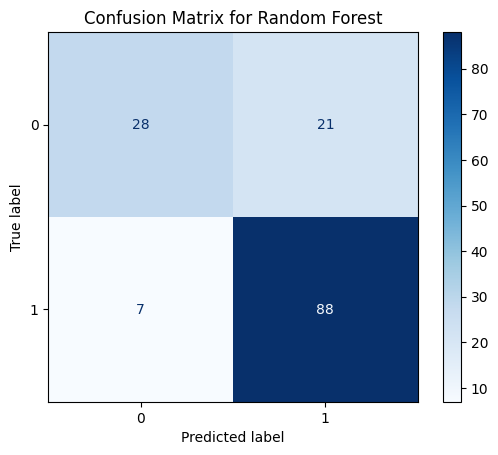

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay


rfc_100 = RandomForestClassifier(n_estimators=100, random_state=0)



# fit the model to the training set

rfc_100.fit(X_train, y_train)



# Predict on the test set results

y_pred_100 = rfc_100.predict(X_test)



# Check accuracy score

print('Model accuracy score with 100 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred_100)))


# Compute confusion matrix
conf_matrix_rf = confusion_matrix(y_test, y_pred_100)
print("Confusion Matrix for Random Forest:")
print(conf_matrix_rf)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_rf, display_labels= rfc_100.classes_)

disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for Random Forest")
plt.show()

### **Model 4: logistic regression with 4 variables and trained with k fold**

In [ ]:
### using train x with cross validation to train model and then tested with testy
#### train x and test x was splitted earlier using train test
# Import necessary libraries
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LogisticRegression
import numpy as np

#
# Initialize KFold cross-validator
kfold_validation = KFold(n_splits=10, shuffle=True, random_state=42)

# Initialize the Logistic Regression model
model = LogisticRegression(max_iter=200)

# Perform cross-validation
cv_results = cross_val_score(model, X_train, y_train, cv=kfold_validation)

# Print cross-validation results
print("Cross-validation results:", cv_results)
print("Mean accuracy:", cv_results.mean())
print("Standard deviation:", cv_results.std())

# Fit the model on the scaled training data
model.fit(X_train, y_train)

# Evaluate on the scaled testing data
test_accuracy = model.score(X_test, y_test)  # Ensure testY is also 1D
print("Test accuracy:", test_accuracy)


## confusion matrix , report
y_pred= model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))



Cross-validation results: [0.82352941 0.85294118 0.85294118 0.79411765 0.76470588 0.76470588
 0.87878788 0.72727273 0.81818182 0.81818182]
Mean accuracy: 0.8095365418894831
Standard deviation: 0.04464706917839262
Test accuracy: 0.8055555555555556
[[22 27]
 [ 1 94]]
0.8055555555555556
              precision    recall  f1-score   support

           0       0.96      0.45      0.61        49
           1       0.78      0.99      0.87        95

    accuracy                           0.81       144
   macro avg       0.87      0.72      0.74       144
weighted avg       0.84      0.81      0.78       144



In [ ]:
#### model logistic regression with 4 variables

from sklearn.linear_model import LogisticRegression
# Initial the model and fit the model.
lr = LogisticRegression()
lr.fit(X_train,y_train)


pred_lr = lr.predict(X_test)
print(pred_lr)



#Performance on training set
print(lr.score(X_train,y_train))
# Performance on test set
# score function will automatically predict for testX and then compare with true value
print(lr.score(X_test,y_test))



# "labels" option defines the order - the order of rows will follow the orders in the "labels".
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
metrics.confusion_matrix(y_pred=pred_lr, y_true=y_test, labels = [0, 1])

[1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 0 0 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1
 1 1 1 1 1 1 0 1 1 1 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 0
 1 0 1 1 1 0 1 1 1 0 1 0 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1]
0.8095238095238095
0.8055555555555556


array([[22, 27],
       [ 1, 94]])

#### **Logistic regression with 13 variables**

In [ ]:
from sklearn.linear_model import LogisticRegression
# Initial the model and fit the model.
lr = LogisticRegression()
lr.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

##

In [ ]:
pred_lr = lr.predict(testX)
print(pred_lr)

[1 1 1 1 1 1 0 0 0 0 1 1 0 1 0 1 1 1 1 1 1 0 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1
 0 1 1 1 1 1 1 1 0]


In [ ]:
#Performance on training set
print(lr.score(trainX,trainY))
# Performance on test set
# score function will automatically predict for testX and then compare with true value
print(lr.score(testX,testY))

0.8083333333333333
0.8333333333333334


In [ ]:
# "labels" option defines the order - the order of rows will follow the orders in the "labels".
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
metrics.confusion_matrix(y_pred=pred_lr, y_true=testY, labels = [1, 0])

array([[81,  2],
       [18, 19]])

#### model3: **decision tree with 4 variable**

#### **Method 3:** **Adding class weight**

#### **Model 3: Random Forest(4 variables)  with added class weight**

##### ## **case1 : since 0 is less inour case so asking to give 0 more importance than 1**

In [ ]:
## case1 : since 0 is less inour case so asking to give 0 more importance than 1
class_weight = dict({0: 100, 1: 1})
classifier = RandomForestClassifier(class_weight= class_weight)
classifier.fit(X_train, y_train)


y_pred = classifier.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[32 17]
 [20 75]]
0.7430555555555556
              precision    recall  f1-score   support

           0       0.62      0.65      0.63        49
           1       0.82      0.79      0.80        95

    accuracy                           0.74       144
   macro avg       0.72      0.72      0.72       144
weighted avg       0.75      0.74      0.74       144



#### **Case2: class weight added for 1 more importance as exp to see which works better.**


In [ ]:
class_weight = dict({0 : 1, 1 : 100})
classifier = RandomForestClassifier(class_weight= class_weight)
classifier.fit(X_train, y_train)


y_pred = classifier.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[31 18]
 [ 6 89]]
0.8333333333333334
              precision    recall  f1-score   support

           0       0.84      0.63      0.72        49
           1       0.83      0.94      0.88        95

    accuracy                           0.83       144
   macro avg       0.83      0.78      0.80       144
weighted avg       0.83      0.83      0.83       144



#### **Conclusion**

1. case 2 when giving importance to class 1 worked better then case 1 when 0 was given importance

2. case2  works better because it aligns with your data distribution and problem goals.

In [ ]:
class_weight = dict({1 : 300, 1 : 100})
classifier = RandomForestClassifier(class_weight= class_weight)
classifier.fit(X_train, y_train)


y_pred = classifier.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[31 18]
 [ 9 86]]
0.8125
              precision    recall  f1-score   support

           0       0.78      0.63      0.70        49
           1       0.83      0.91      0.86        95

    accuracy                           0.81       144
   macro avg       0.80      0.77      0.78       144
weighted avg       0.81      0.81      0.81       144



####**Conclusion on class weight**

1. Adding class weight parameter to random forest, **drastically reduced false positive (from 22 to 18) making recall for 0(not approved) increase from .45 to .63** thus precison and recall both are balanced this time. last time, precison for 0 was arnd 90 but recall for 0 was only 48.

2. well, we also see accuracy increased to 83% along with better matrix results.(Although accuracy in imbalnce data is not so important.



#### **method 3: Resampling techniques**

#### 1. **Oversampling**

In [ ]:
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

os = RandomOverSampler(0,5)
X_train_ns, y_train_ns = os.fit_sample(X_train, y_train)
print("the number of classes before fit {}", format(Counter(y_train)))
print("the number of classes before fit {}", format(Counter(y_train_ns)))



TypeError: RandomOverSampler.__init__() takes 1 positional argument but 3 were given

#### **Pickling the model for deployment**

#### **Model 1: logistic regression with 13 variables**

In [ ]:
import pickle

In [ ]:
## creating the file for model 1 : logistic regression lr
## create in same directry where this jupyter us
## PUT ALL CONTENT INTO IT
# pickle.dump(lr, open('lrmodel1.pkl', "wb"))

import pickle

# Path where you want to save the file
save_path = '/content/drive/MyDrive/Colab Notebooks/lrmodel1.pkl'

# Saving your pickled model
with open(save_path, 'wb') as file:
    pickle.dump(lr, file)


In [ ]:
## loading AND reading content
pickled_model = pickle.load(open("lrmodel1.pkl", "rb"))

In [ ]:
pickled_model #(lr model declared)

LogisticRegression()

In [ ]:
## using the file for predicting
pickled_model.predict(testX)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1])